# Advanced House Prices Regression

Objective: to predict the House Prices based on relevant features.

Supervised Learning: Regression

In [261]:
!pip install --upgrade scikit-learn

In [262]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mutual_info_score 
from sklearn.impute import SimpleImputer
import scipy.stats as stats
from sklearn.model_selection import cross_val_score

import optuna
import optuna.visualization as vis

import warnings
warnings.filterwarnings('ignore')

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [263]:
# graphic settings

sns.set_theme(rc={'figure.figsize':(20.7, 18.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [264]:
# Import Dataset

df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

### Dataset Information Overview

In [265]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some columns have missing values. We will deal with this later in data preprocessing. 

In [267]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [268]:
df.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

Some features such as Street and Utilities dominated the class, we will check the variance in feature selection step. 

### Train Test Data Split

In [269]:
# drop Id column because it is not used

df.drop('Id', axis = 1, inplace=True)

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

## Exploratory Data Analysis

In [270]:
# separate variables into 3 categories based on data types
# numerical features with unique values lower than 20 will be categorized as discrete variables. 

categorical = [col for col in df_train.columns if df[col].dtype not in ['float64','int64']]
discrete = [col for col in df_train.columns if df[col].nunique() < 20 and col not in categorical]
numerical = [col for col in df_train.columns if col not in categorical + discrete + ['SalePrice']]

target = 'SalePrice' # for EDA purpose

We will perform Exploratory Data Analysis for each features data types: categorical, discrete, and numerical. 

### Categorical Variables

In [271]:
df_train_categorical = df_train[categorical]

In [272]:
df_train[categorical].describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1168   1168    74     1168        1168      1168      1168   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq        924   1164    44      729        1059      1167       822   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1168         1168       1168       1168     1168       1168   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1108          181       1004       1157      978        577   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1168     1168        1168        1168        485      1168   
unique         6        7          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq         906     1149         420         410        366       727   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1168       1168     1140     1140         1140         1140   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1018        520      521     1045          769          345   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1140    1168      1168       1168       1167        1168   
unique            6       6         5          2          4           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1009    1140       583       1085       1071         589   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1168         621       1104         1104       1104       1104   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1084         305        693          480       1050       1061   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1168      6    233          46     1168          1168  
unique          3      3      4           4        9             6  
top             Y     Fa  MnPrv        Shed       WD        Normal  
freq         1070      2    128          41     1012           964

#### Data Distribution for Categorical Variables

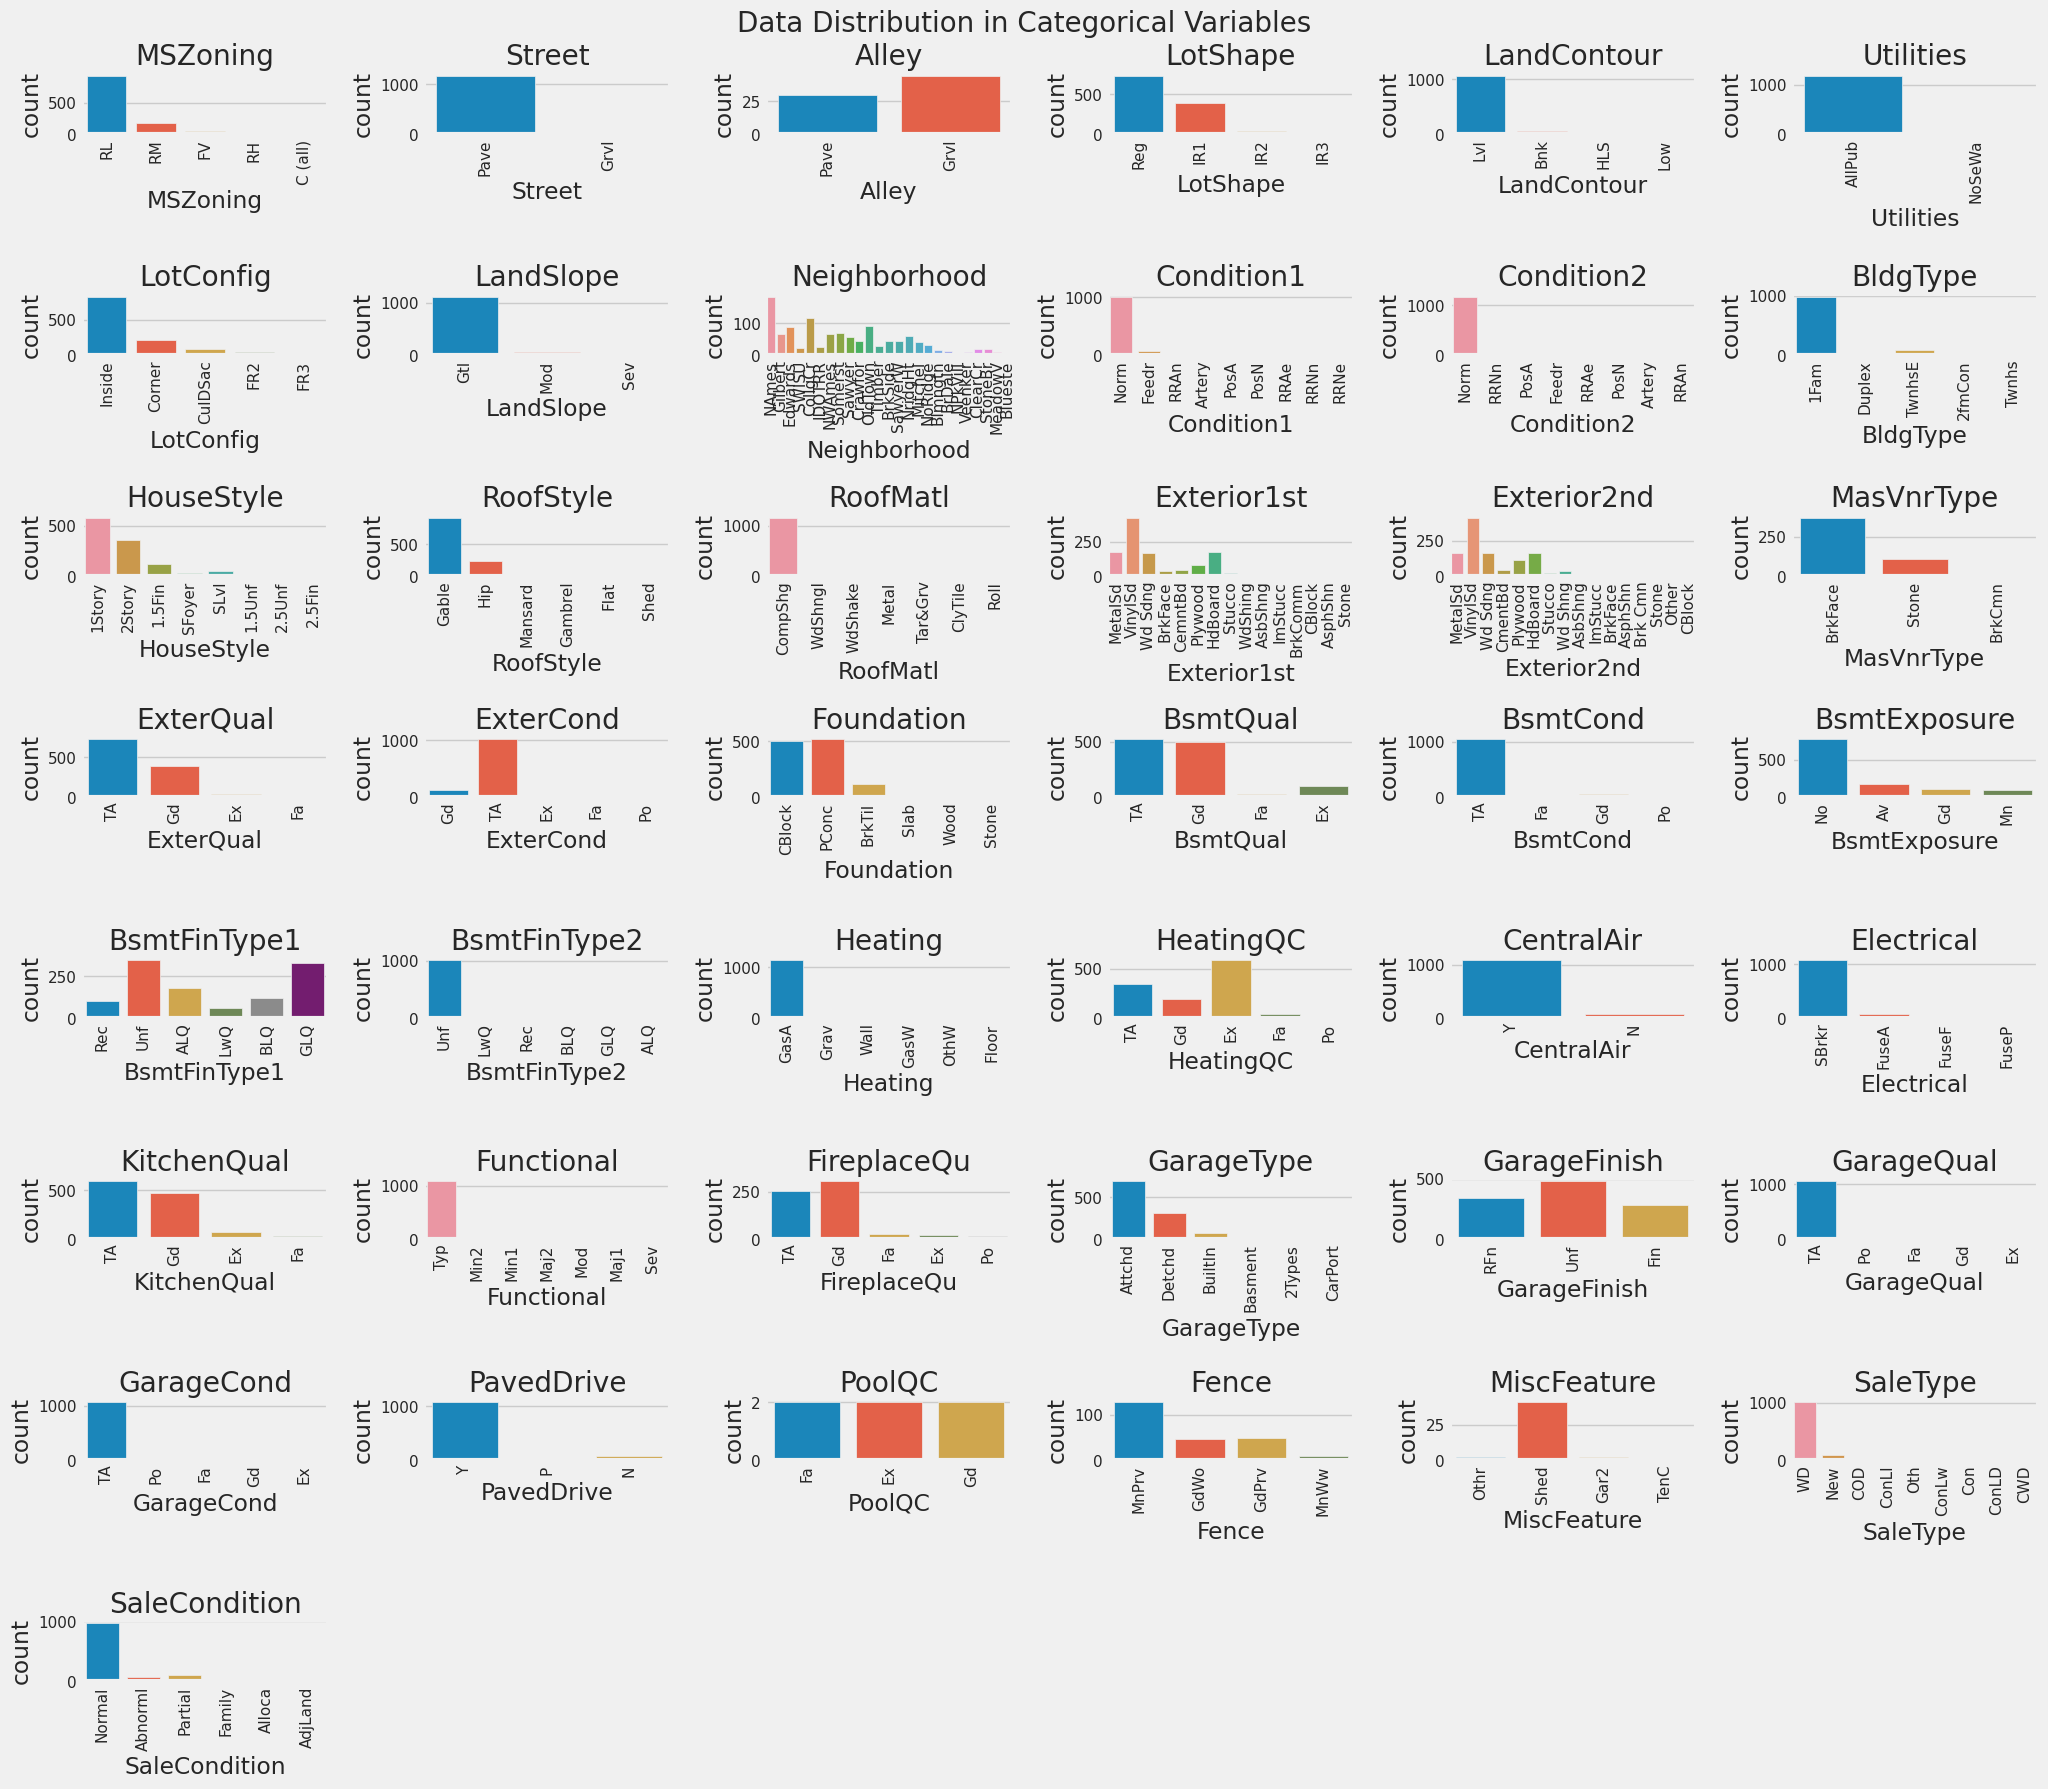

In [273]:
# distribution check in categorical variables

for i in range(0, len(df_train_categorical.columns)):
    plt.subplot(8, 6, i+1)
    sns.countplot(x=df_train_categorical[categorical[i]])
    plt.title(categorical[i])
    x=plt.xticks(rotation=90)
    plt.suptitle('Data Distribution in Categorical Variables', fontsize = 20)
    plt.tight_layout()

Some of features have a dominant unique value, such as Street, CentralAir, and Electrical. Neighborhood have the highest number of unique values. 

#### Relation between Categorical Variables and Target

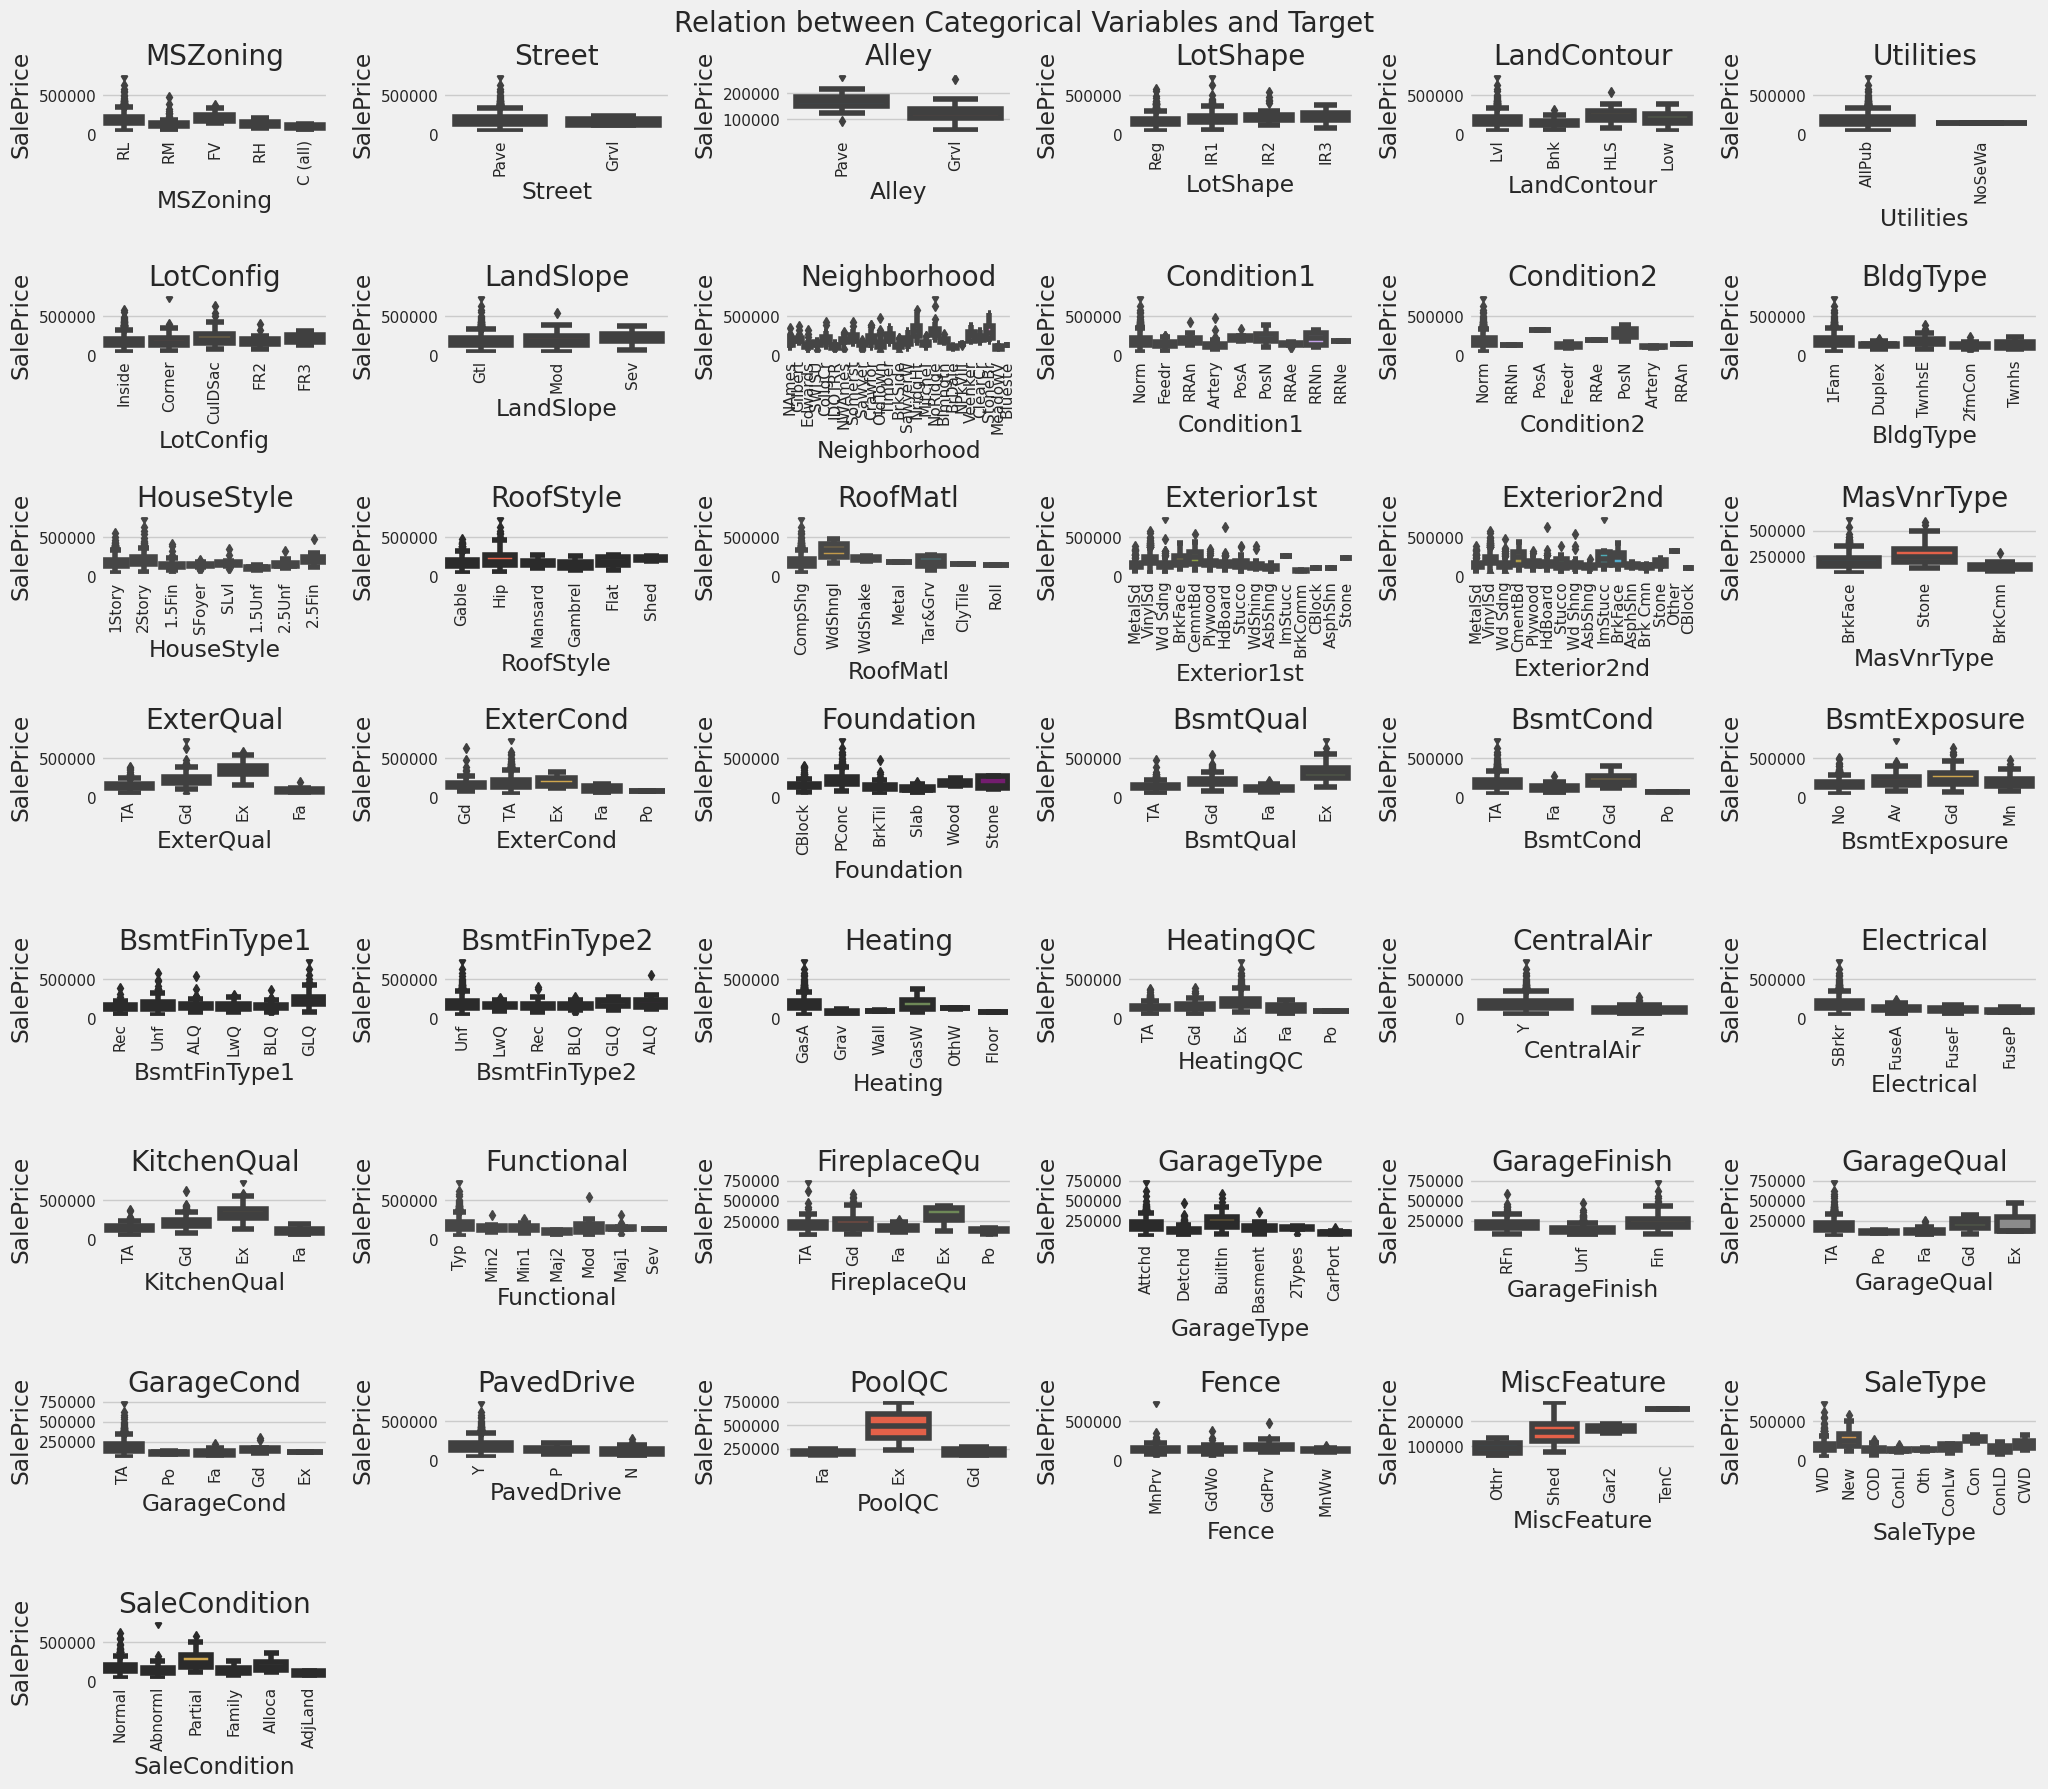

In [274]:
for i in range(0, len(df_train_categorical.columns)):
    plt.subplot(8, 6, i+1)
    sns.boxplot(x=df_train_categorical[categorical[i]], y = target, data = df_train)
    plt.title(categorical[i])
    x=plt.xticks(rotation=90)
    plt.suptitle('Relation between Categorical Variables and Target', fontsize = 20)
    plt.tight_layout()

There are some features such as ExterQual, BsmtQual, and MiscFeature have significant difference of Sale Price between its category. 

### Discrete Variables

In [275]:
df_train_discrete = df_train[discrete]

#### Data Distribution for Discrete Features

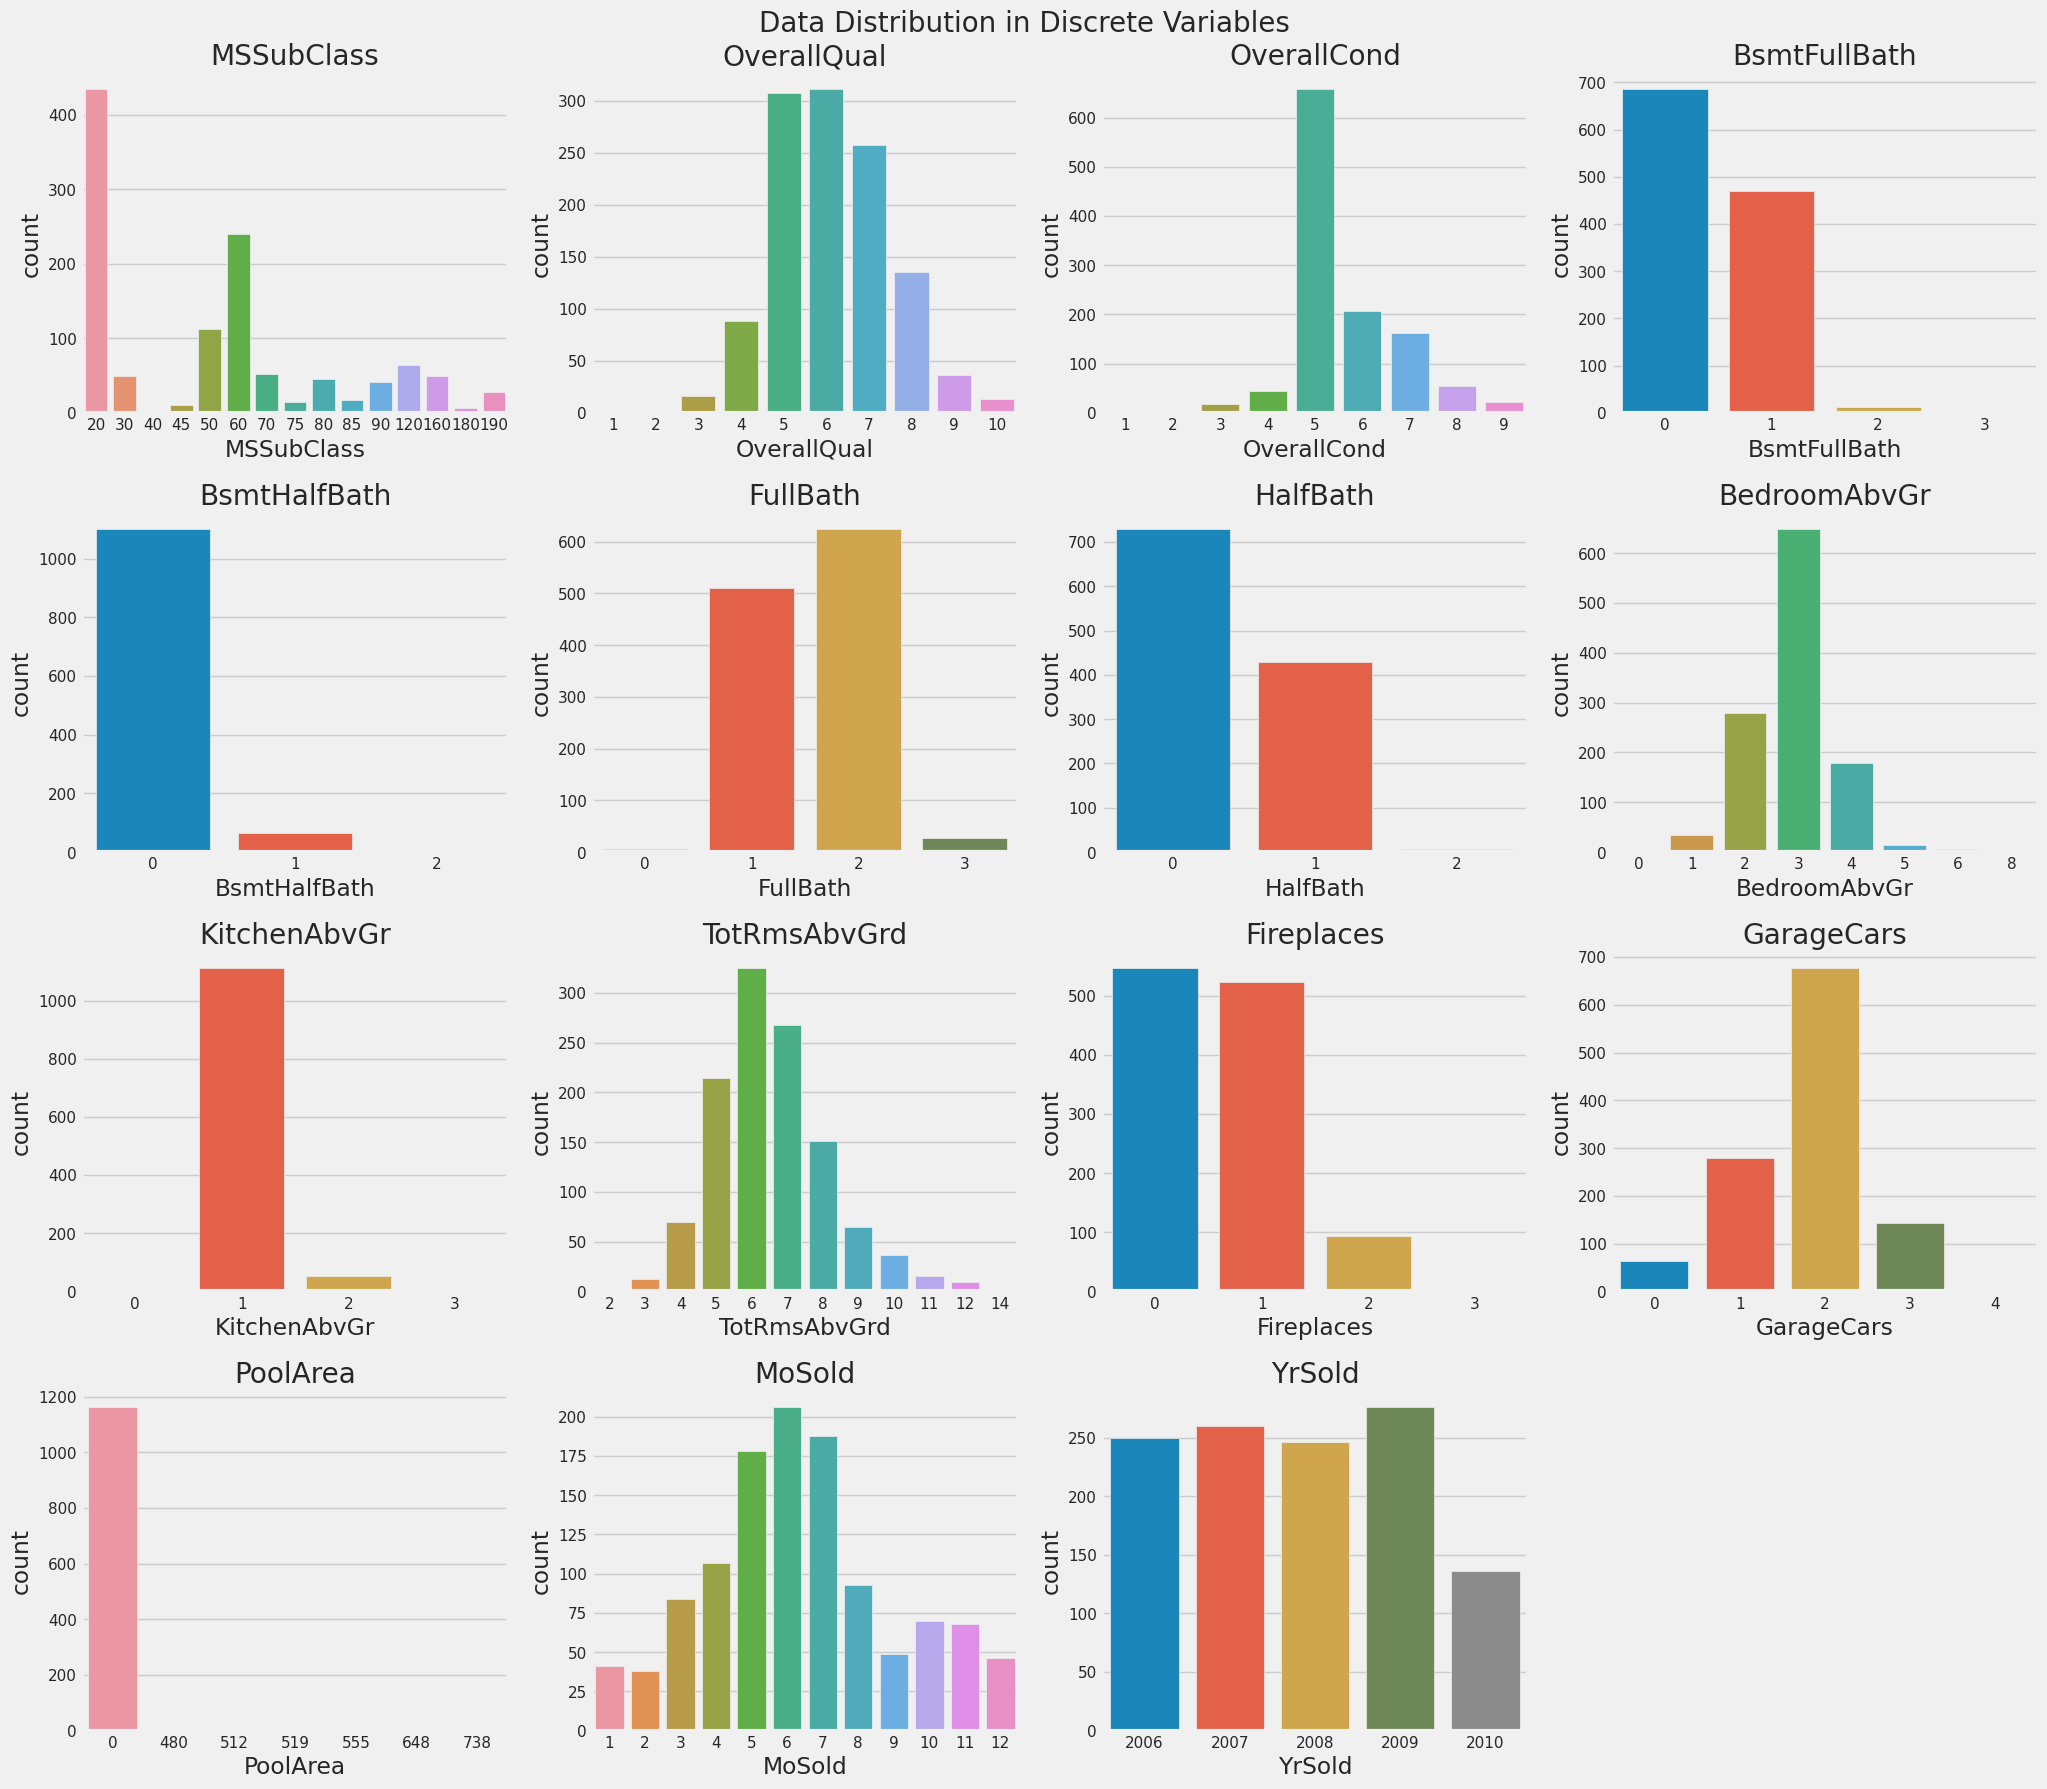

In [276]:
for i in range(0, len(df_train_discrete.columns)):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=df_train_discrete[discrete[i]])
    plt.title(discrete[i])
    plt.suptitle('Data Distribution in Discrete Variables', fontsize = 20)
    plt.tight_layout()

BsmtHalfBath, KitchenAbvGr, and PoolArea features have imbalance distribution between their unique values. 

#### Relation between Discrete Features and Target

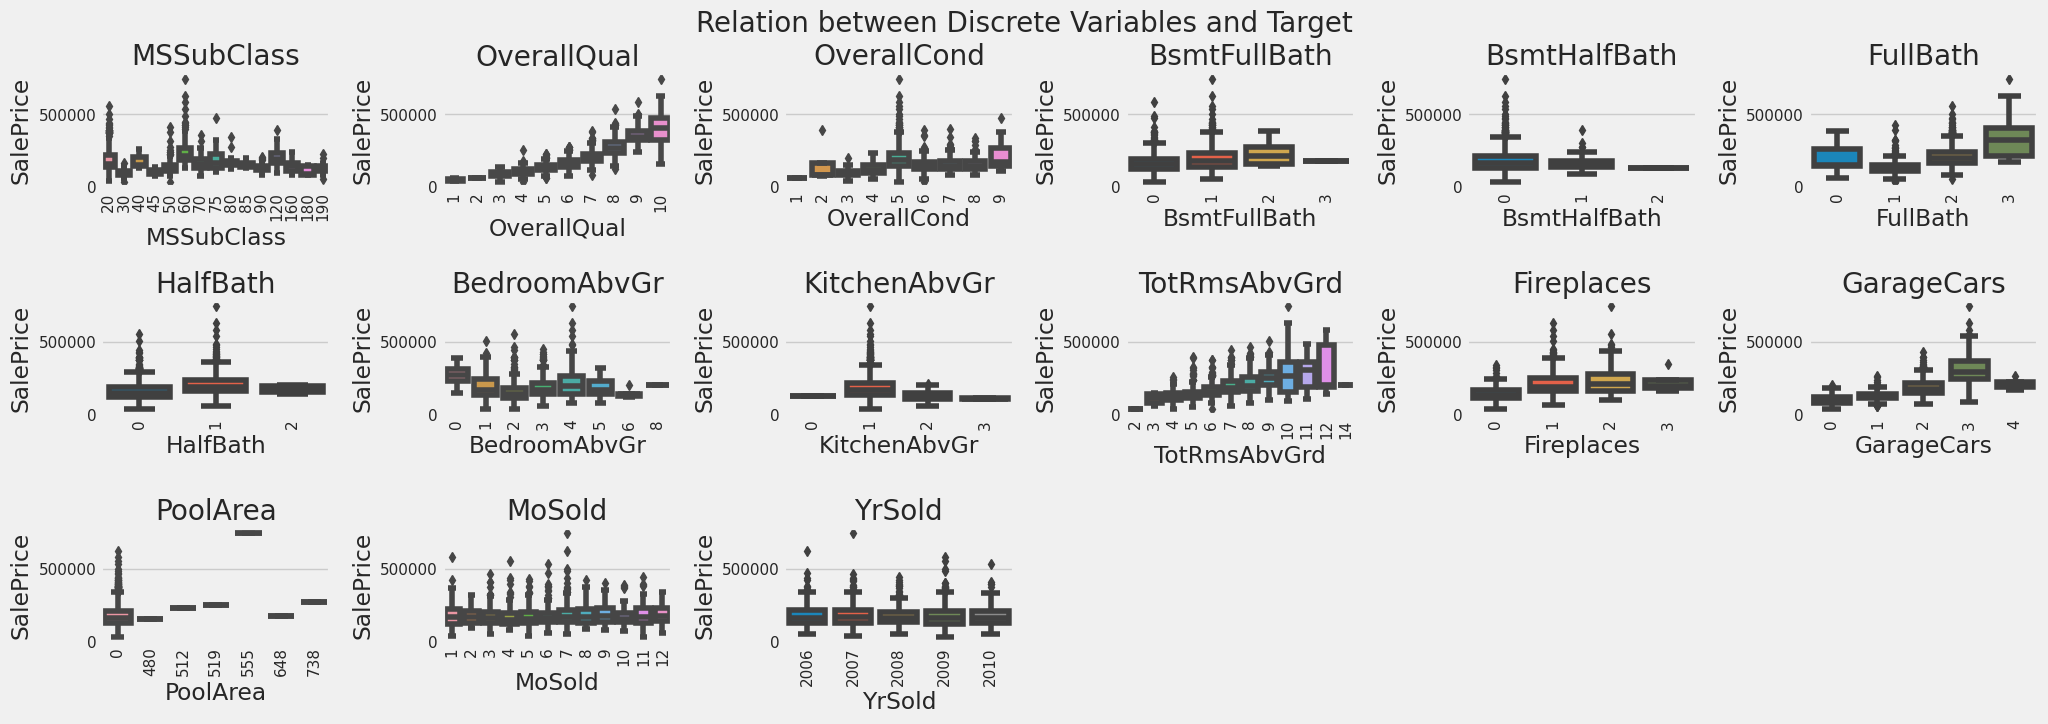

In [277]:
for i in range(0, len(df_train_discrete.columns)):
    plt.subplot(8, 6, i+1)
    sns.boxplot(x=df_train_discrete[discrete[i]], y = target, data = df_train)
    plt.title(discrete[i])
    x=plt.xticks(rotation=90)
    plt.suptitle('Relation between Discrete Variables and Target', fontsize = 20)
    plt.tight_layout()

Some features such as OverallQual, BsmtFullBath, and TotRmsAbvGrd have positive correlation to Sale Price. 

### Numerical Variables

In [278]:
df_train_numerical = df_train[numerical]

#### Data Distribution for Numerical Features

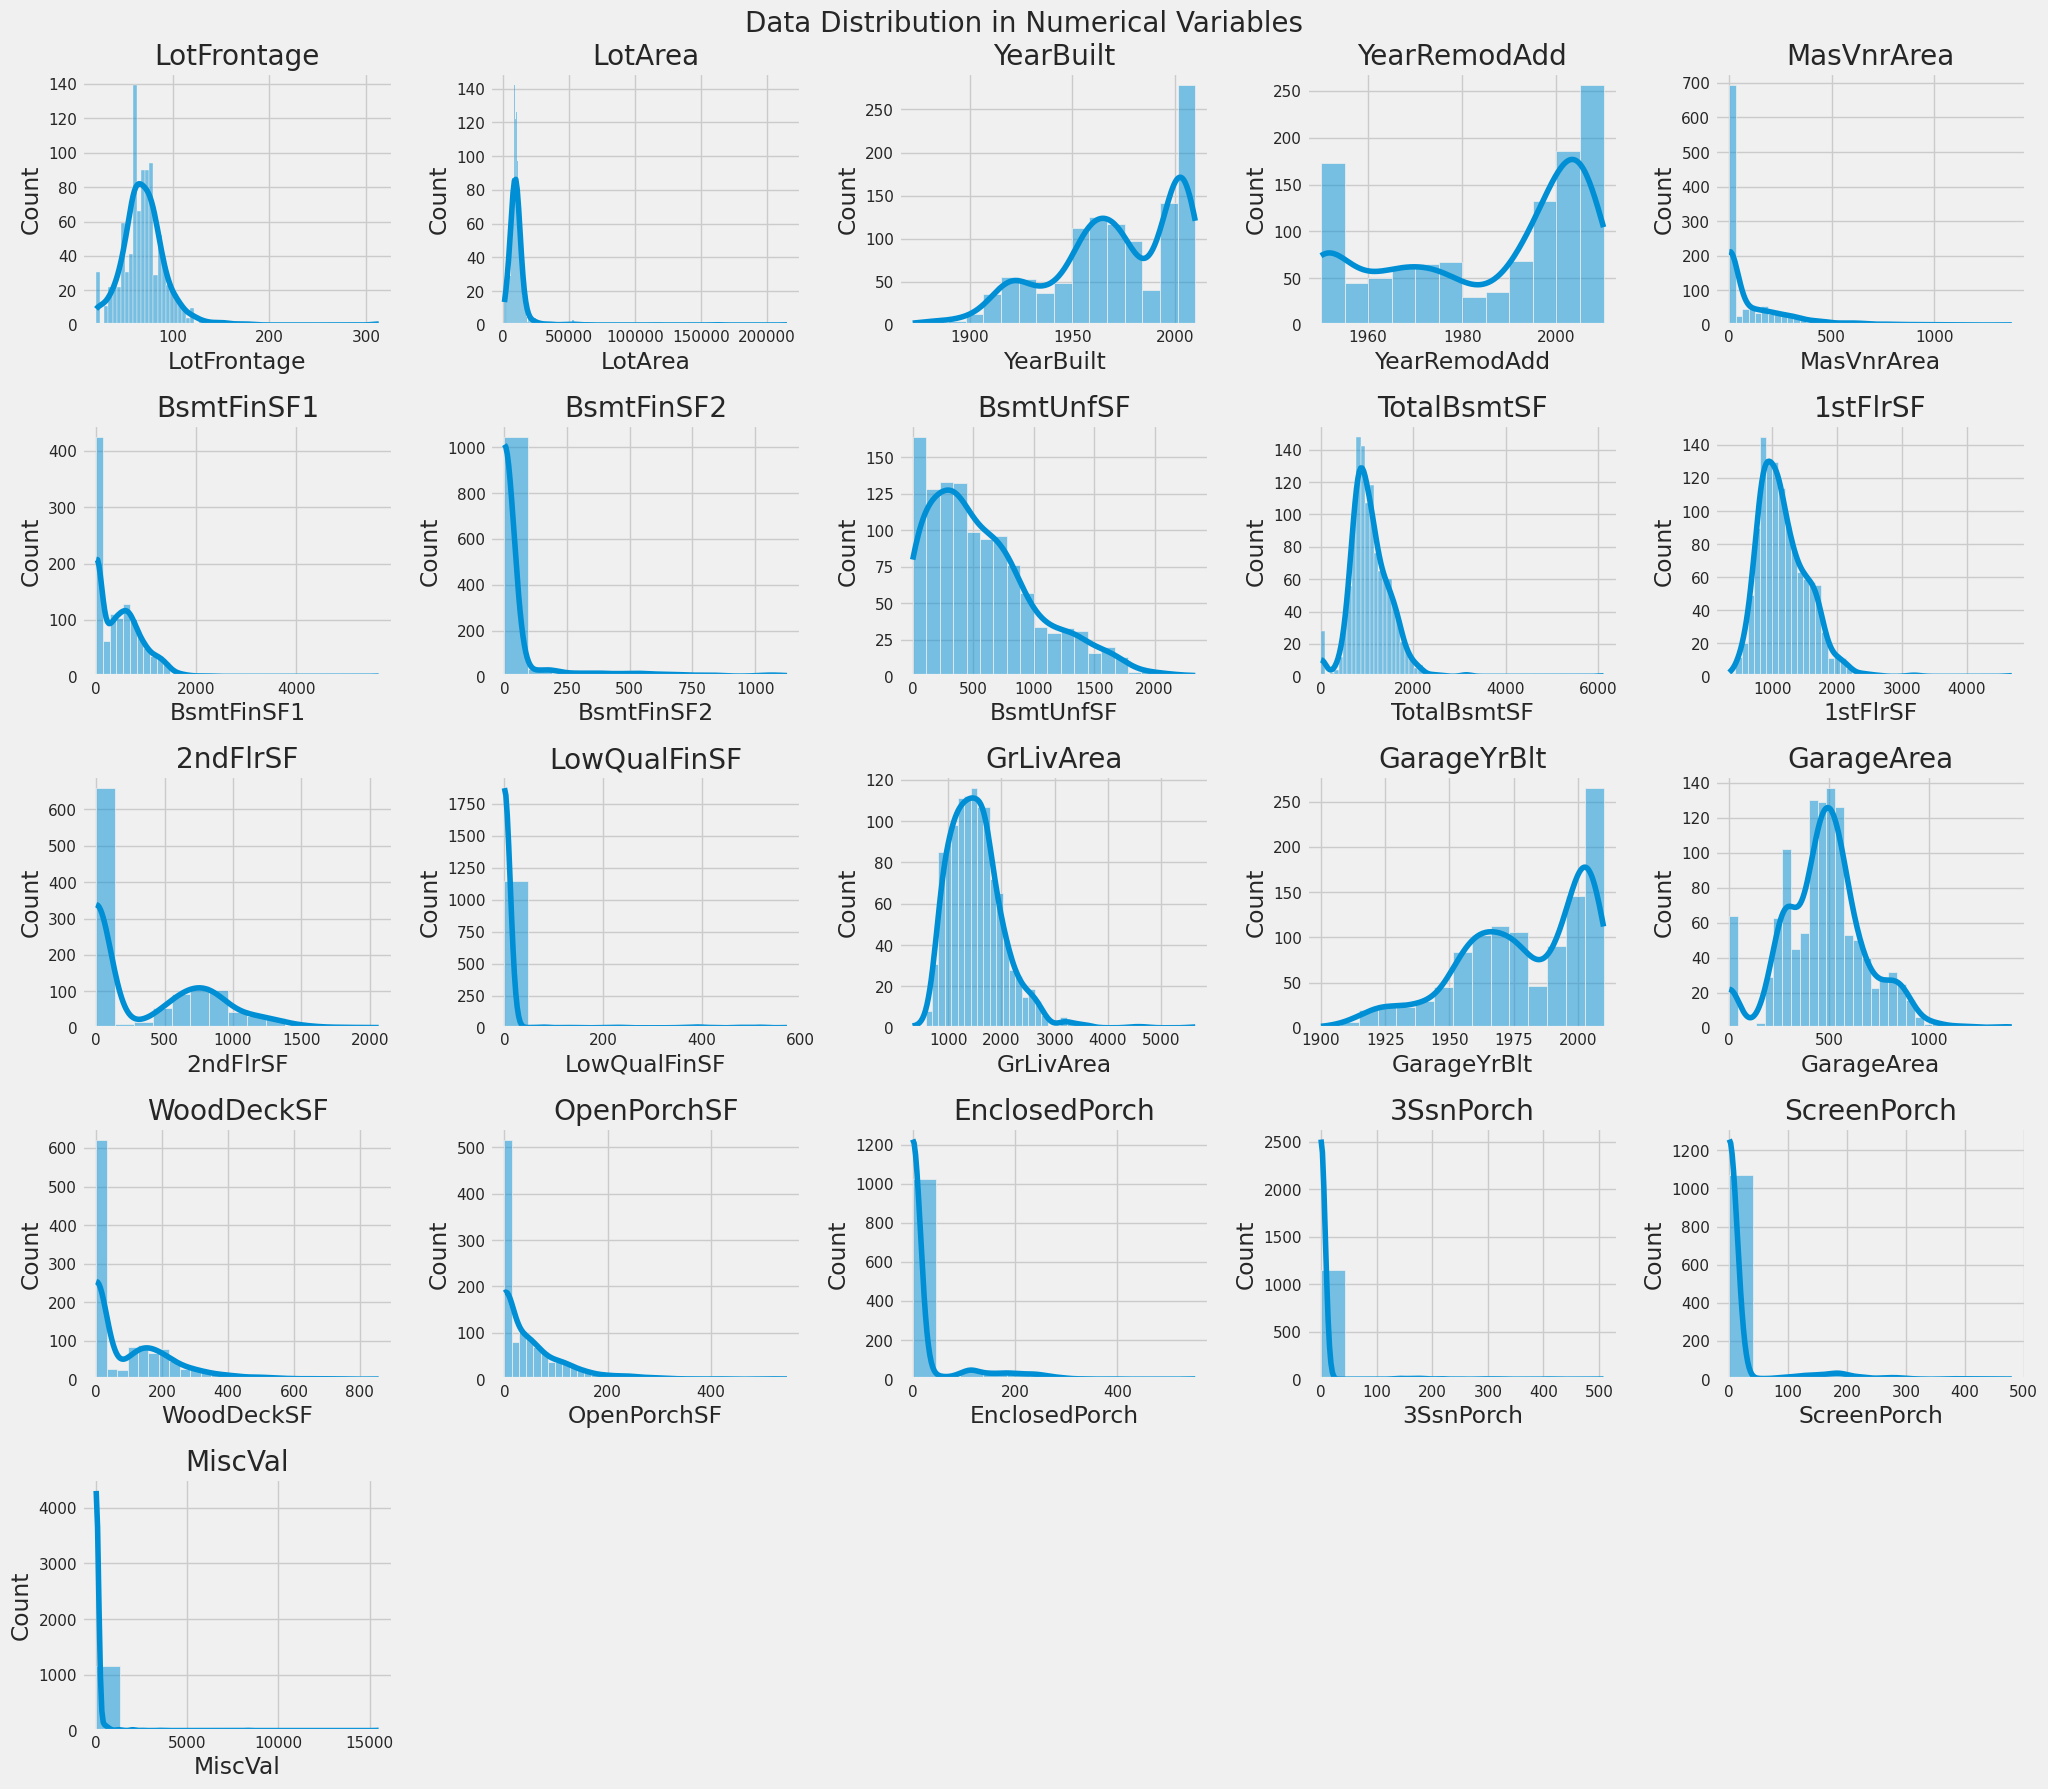

In [279]:
for i in range(0, len(df_train_numerical.columns)):
    plt.subplot(5, 5, i+1)
    sns.histplot(df_train_numerical[numerical[i]], kde = True)
    plt.title(numerical[i])
    plt.suptitle('Data Distribution in Numerical Variables', fontsize = 20)
    plt.tight_layout()

Almost all features are positively skewed, concentrated around value of 0. 

#### Relation between Numerical Features and Target

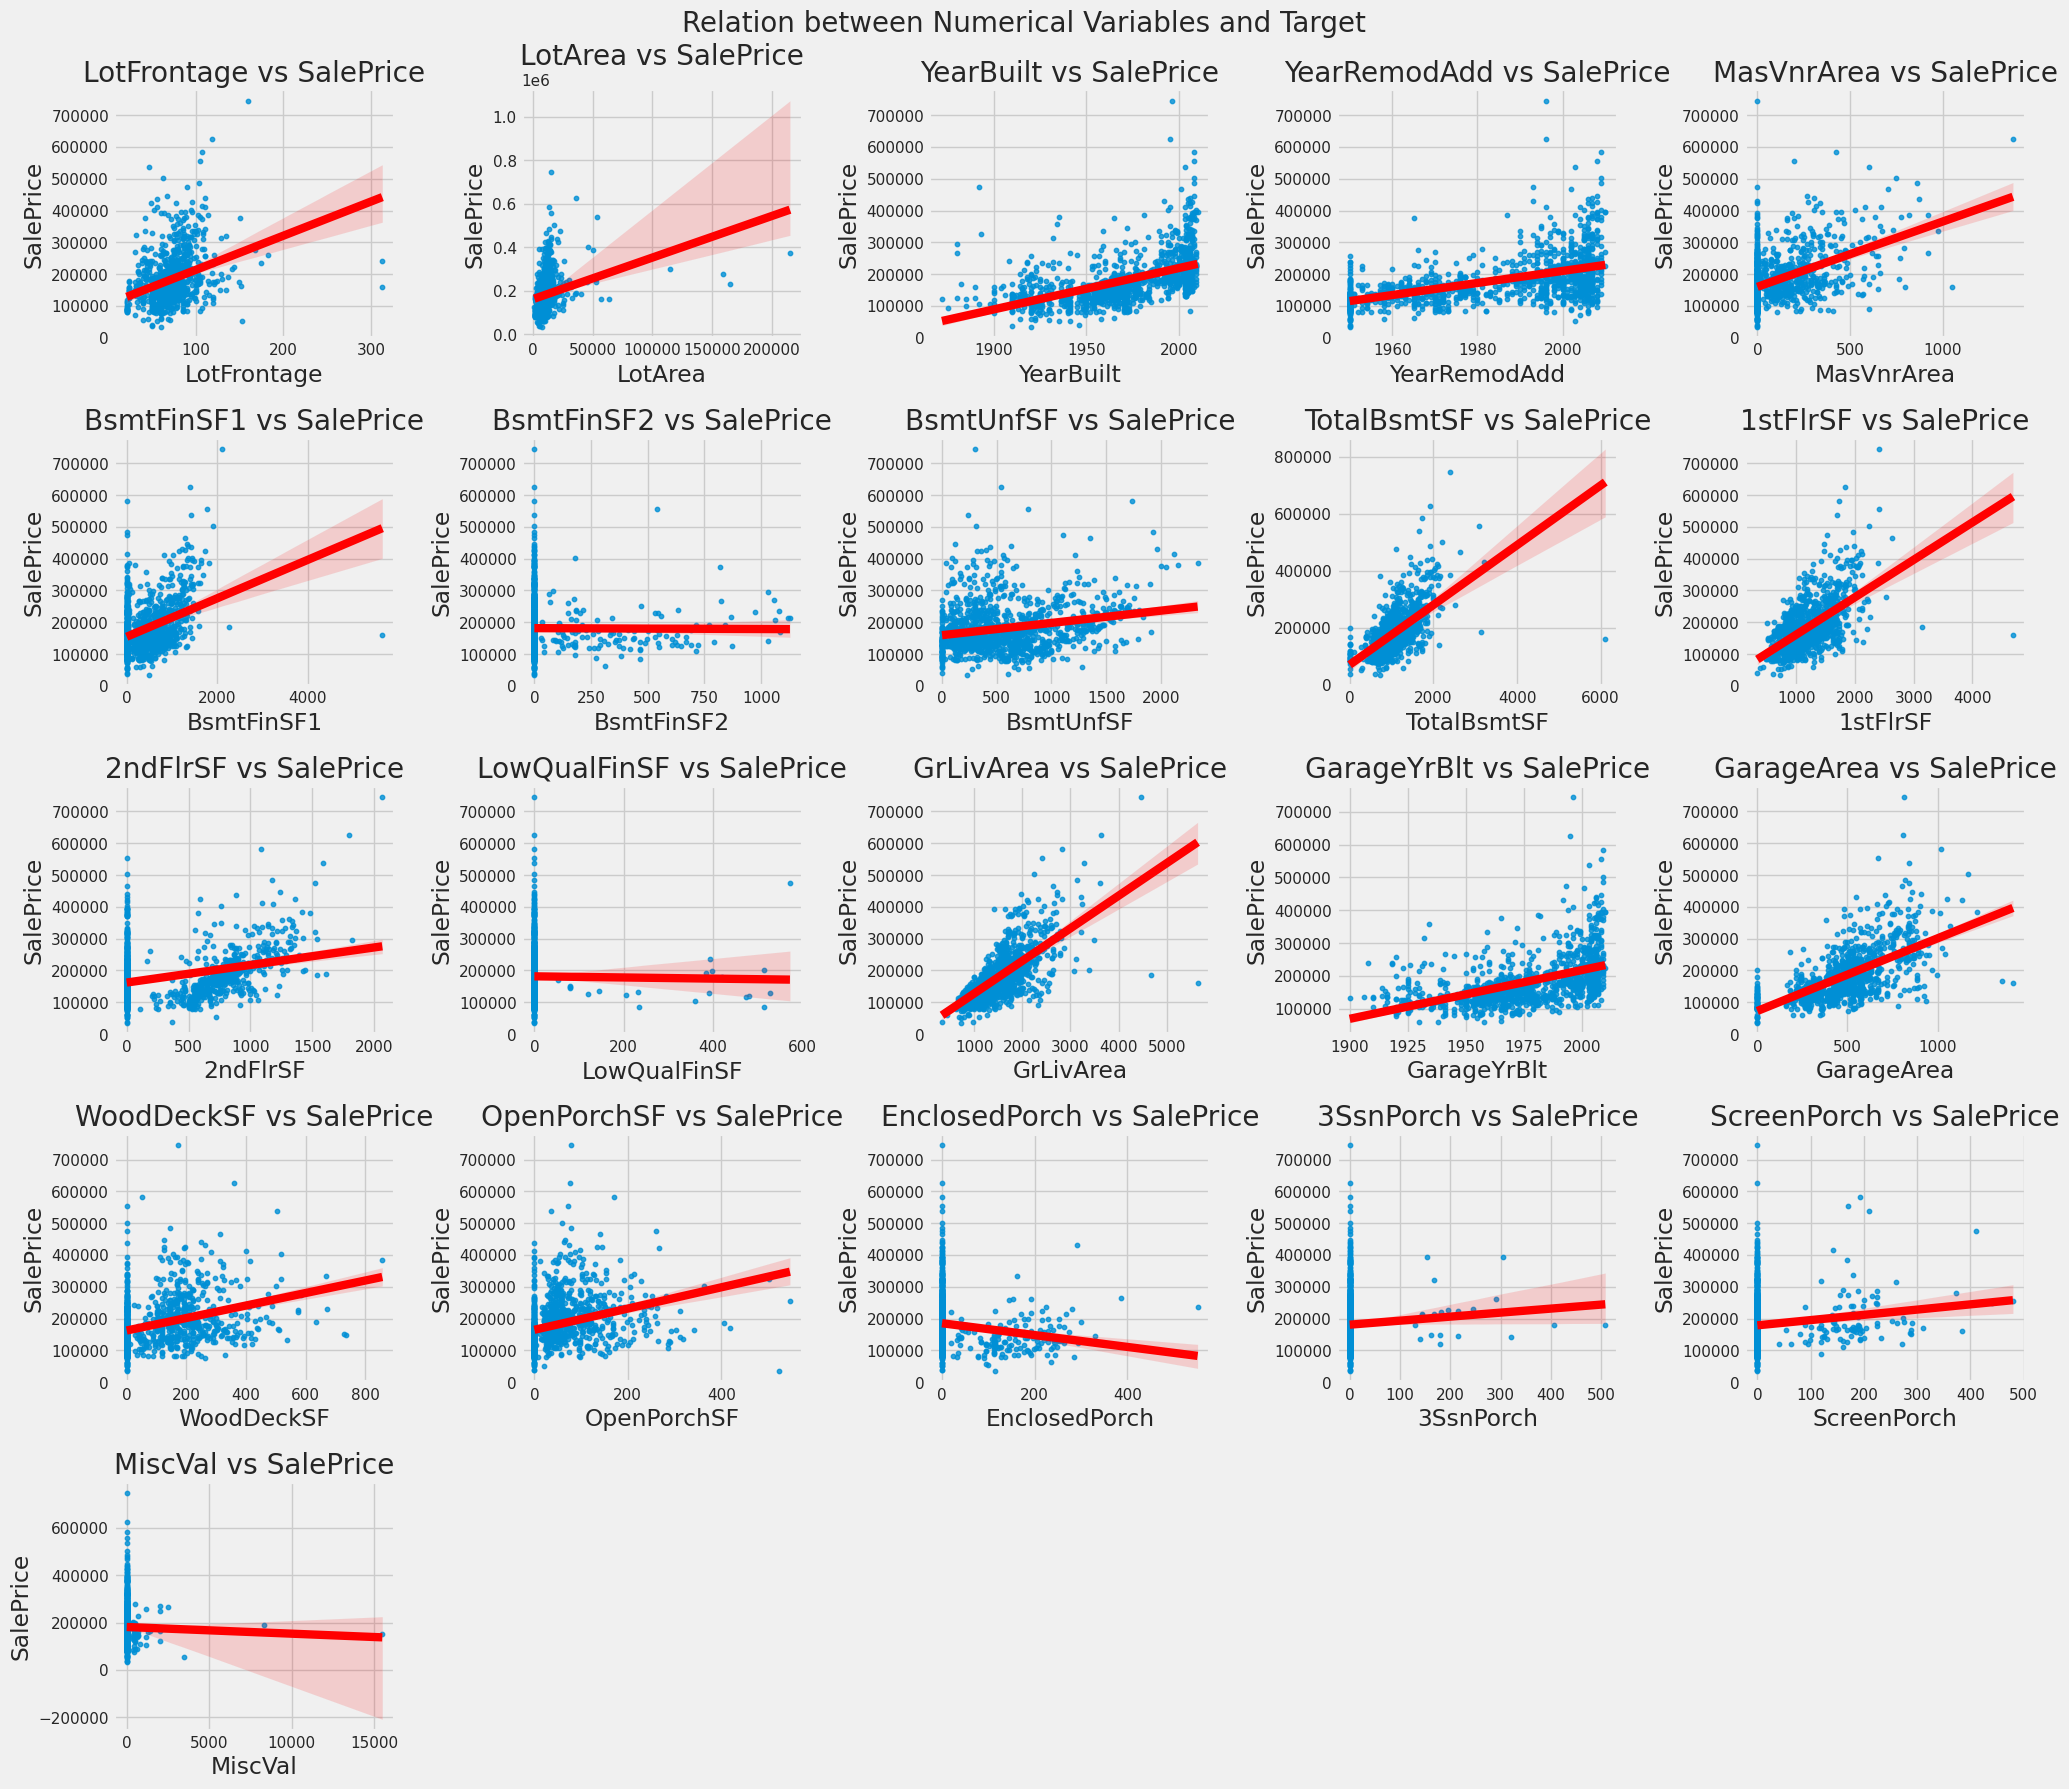

In [280]:
for i in range(0, len(numerical)):
    plt.subplot(5, 5, i+1)
    sns.regplot(x=df_train_numerical[numerical[i]], y=target, data = df_train, scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.xlabel(numerical[i])
    plt.ylabel(target)
    plt.title(f'{numerical[i]} vs {target}')
    plt.suptitle('Relation between Numerical Variables and Target', fontsize = 20)
    plt.tight_layout()

plt.show()

Some features like LotFrontage, TotalBsmtSF, and GrLivArea have highly positive correlation to Sale Price. 

### Target Distribution

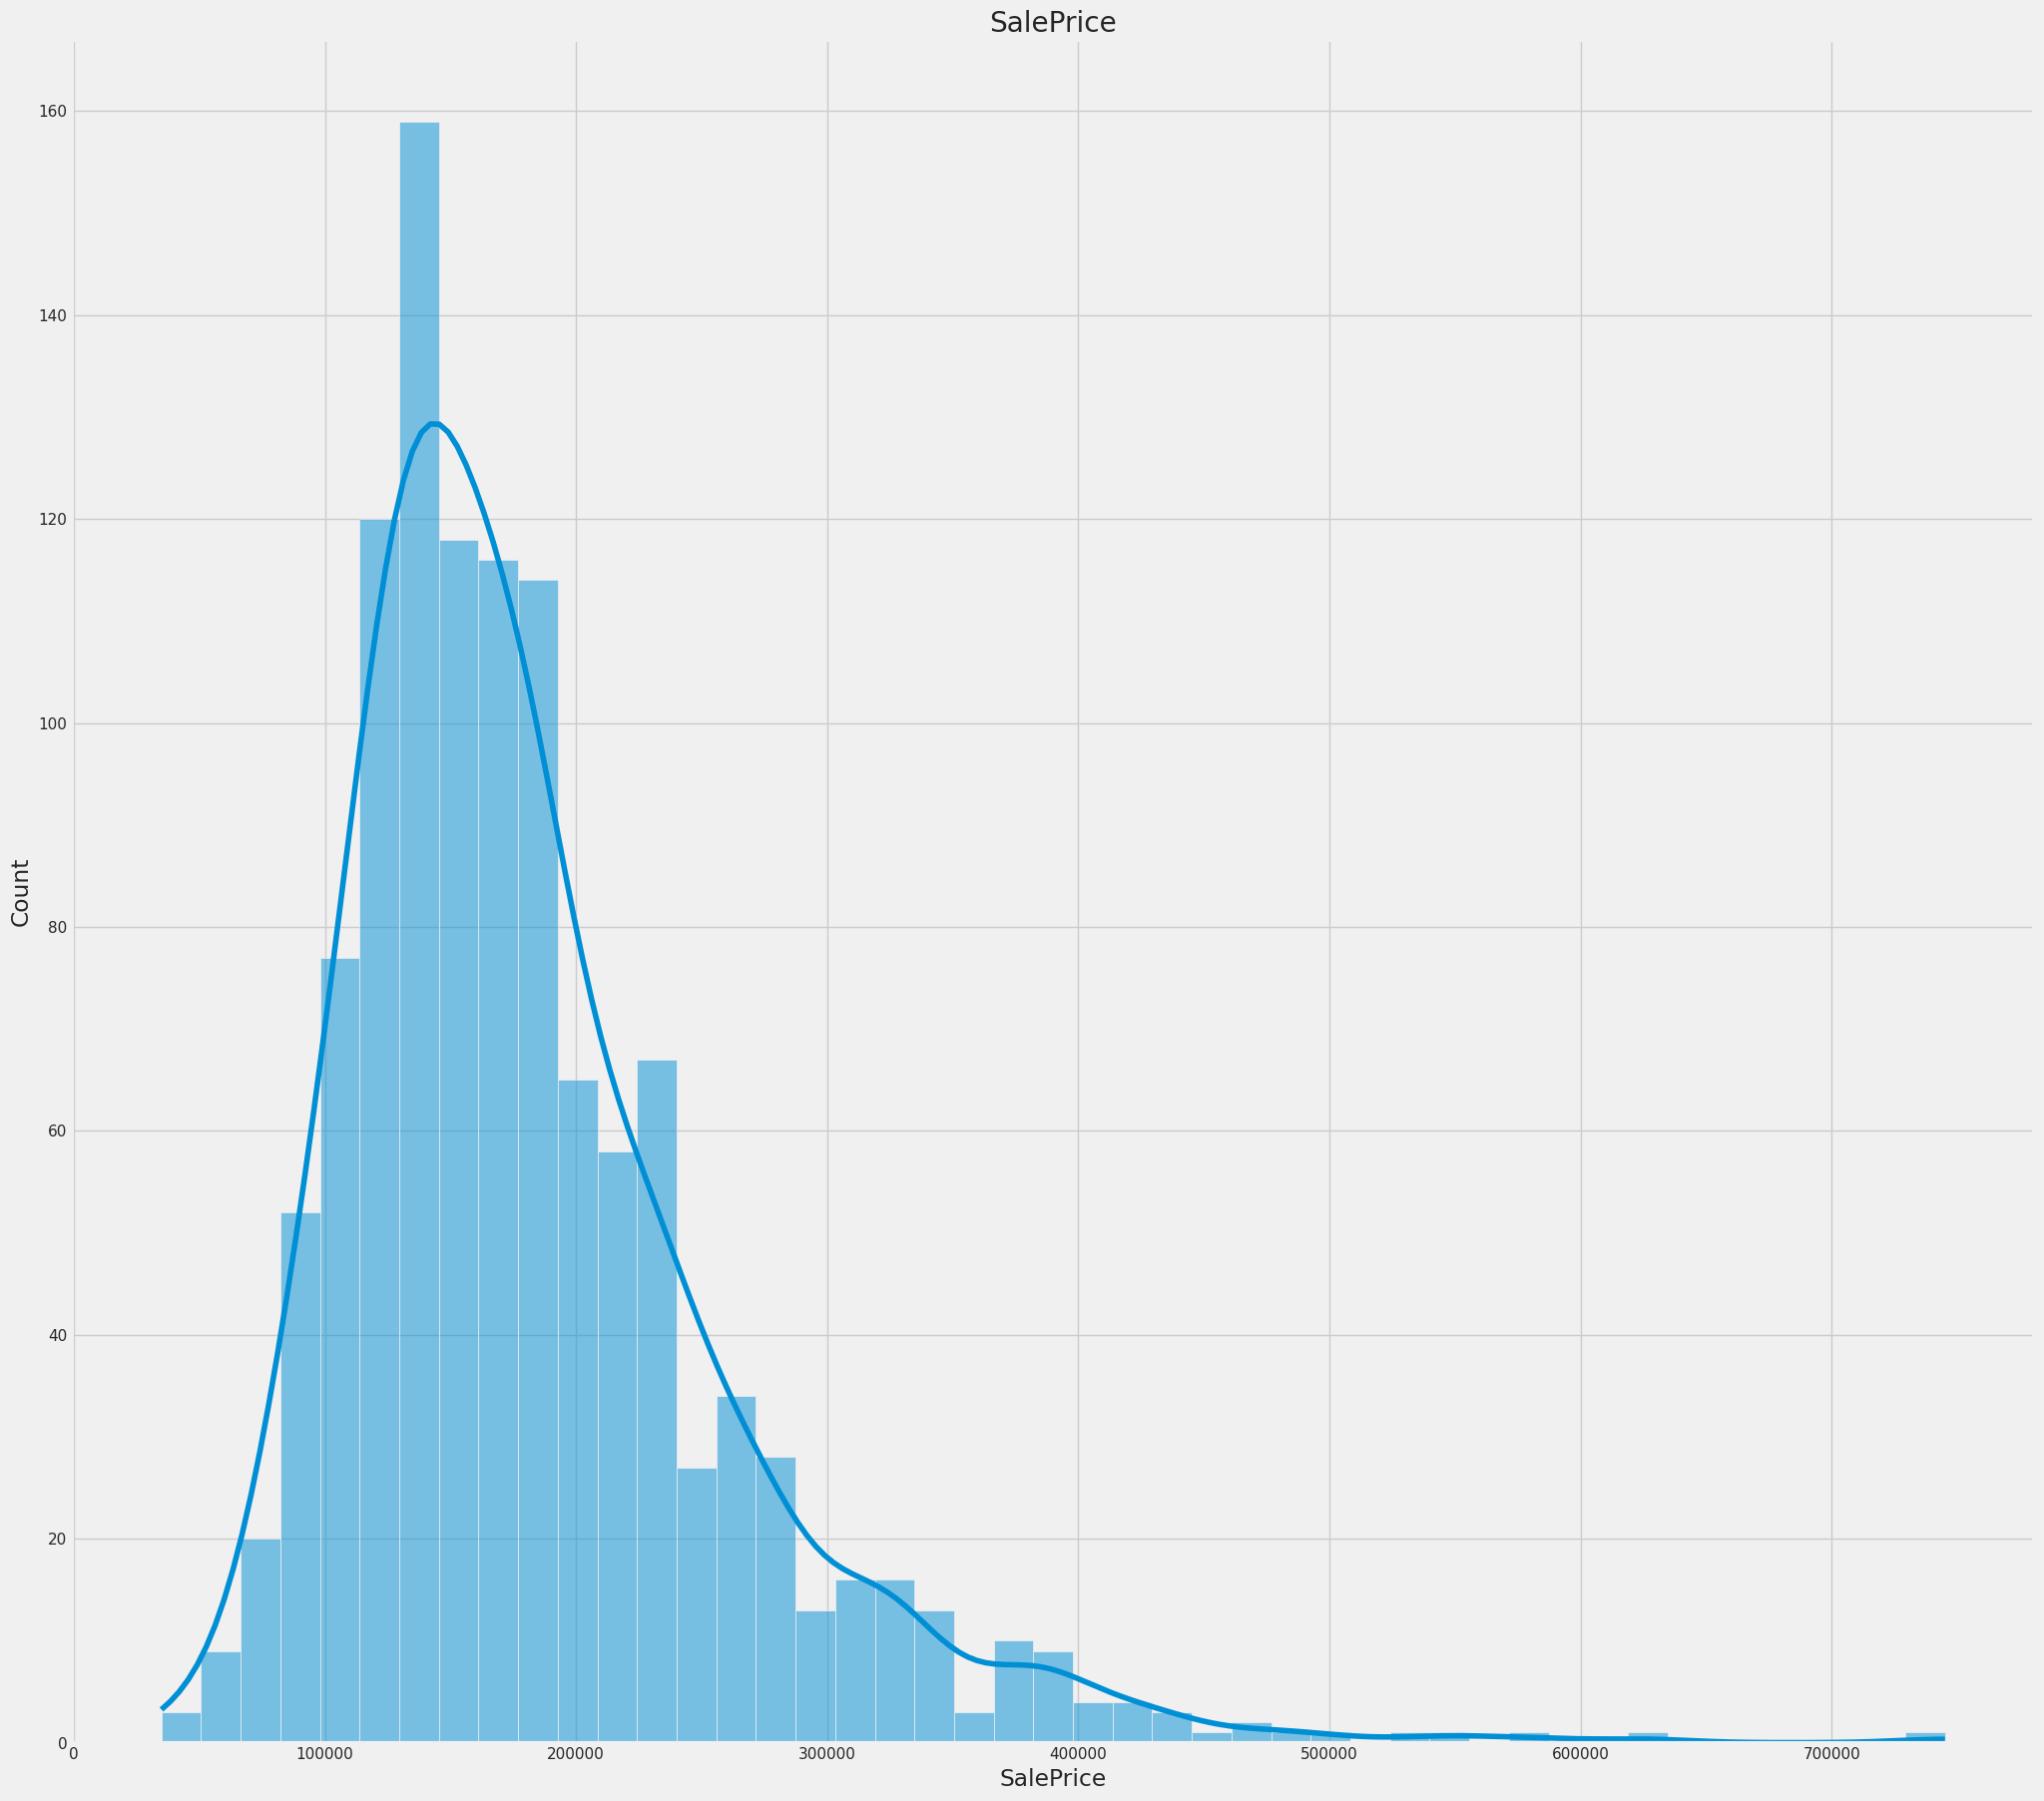

In [281]:
sns.histplot(x=df_train[target], kde=True)
plt.title('SalePrice')
plt.tight_layout()

Sale Price have tendency to positively skewed, with the center around 100000 - 200000.

## Feature Engineering

### Missing Value Handling

In [282]:
#checking missing values in percentage

missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing = round(missing/len(df_train)*100,2)
missing.sort_values(ascending = False, inplace=True)
missing

PoolQC          99.49
MiscFeature     96.06
Alley           93.66
Fence           80.05
MasVnrType      58.48
FireplaceQu     46.83
LotFrontage     18.58
GarageType       5.48
GarageYrBlt      5.48
GarageFinish     5.48
GarageQual       5.48
GarageCond       5.48
BsmtFinType1     2.40
BsmtFinType2     2.40
BsmtExposure     2.40
BsmtCond         2.40
BsmtQual         2.40
MasVnrArea       0.51
Electrical       0.09
dtype: float64

We will drop columns that have more than 20% missing value.

PoolQC, MiscFeature, Alley, Fence, MasVnrType, and FireplaceQu will be dropped because more than 20% data in those columns are missing. 

In [283]:
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis = 1)
df_test = df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis = 1)

In [284]:
# adjust variables after feature drop

remove_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']

categorical = [item for item in categorical if item not in remove_features]

Even though the initial checking of missing value shows no missing values in all features, we will check thoroughly whether the dataset is not have "hidden" missing value, such as unknown or invalid data, by checking them through value counts for each features.

In [285]:
for col in df_train.columns:
    print(f"============= {col} =================")
    display(df_train[col].value_counts())
    print()

============= MSSubClass =================


MSSubClass
20     434
60     240
50     113
120     64
70      52
30      50
160     49
80      45
90      41
190     28
85      17
75      15
45      10
180      7
40       3
Name: count, dtype: int64


============= MSZoning =================


MSZoning
RL         924
RM         172
FV          53
RH          15
C (all)      4
Name: count, dtype: int64


============= LotFrontage =================


LotFrontage
60.0     112
70.0      57
80.0      54
50.0      47
75.0      42
65.0      35
85.0      32
78.0      21
90.0      19
21.0      17
72.0      15
63.0      15
68.0      14
24.0      14
79.0      13
74.0      13
73.0      13
64.0      13
40.0      12
43.0      12
55.0      12
67.0      11
82.0      11
51.0      11
100.0     11
59.0      10
71.0      10
57.0       9
52.0       9
69.0       9
88.0       8
35.0       8
84.0       7
66.0       7
86.0       7
93.0       7
92.0       7
53.0       7
76.0       7
44.0       7
81.0       6
34.0       6
95.0       6
58.0       6
91.0       6
62.0       6
61.0       6
98.0       6
120.0      6
107.0      6
105.0      6
77.0       6
30.0       6
83.0       5
87.0       5
110.0      5
36.0       5
96.0       5
89.0       5
41.0       5
32.0       4
94.0       4
102.0      4
42.0       4
49.0       4
47.0       4
48.0       4
56.0       4
54.0       4
108.0      3
99.0       3
103.0      3
37.0       3
45.0       2
313.0      2
129.0      2



============= LotArea =================


LotArea
9600      23
7200      18
6000      14
10800     13
8400      11
9000      10
1680       8
3182       7
9100       7
7500       7
6240       6
8125       6
8450       5
9375       4
4500       4
10400      4
11700      4
8640       4
8800       4
6120       4
7800       4
9750       4
6600       4
10140      4
5000       4
13125      3
5400       3
10500      3
8750       3
4435       3
7875       3
11250      3
10440      3
8520       3
8500       3
4426       3
9900       3
10625      3
14115      3
10000      3
9920       3
3675       3
10200      3
8544       3
12090      3
8777       3
7018       3
9084       2
9135       2
9937       2
9965       2
9571       2
2280       2
14803      2
12665      2
10206      2
8405       2
4060       2
7700       2
8760       2
7758       2
10335      2
10530      2
8814       2
2522       2
9120       2
7000       2
9020       2
7420       2
13695      2
8172       2
10240      2
7750       2
7931       2
9500       2
10084      2
1038


============= Street =================


Street
Pave    1164
Grvl       4
Name: count, dtype: int64


============= LotShape =================


LotShape
Reg    729
IR1    394
IR2     37
IR3      8
Name: count, dtype: int64


============= LandContour =================


LandContour
Lvl    1059
Bnk      48
HLS      35
Low      26
Name: count, dtype: int64


============= Utilities =================


Utilities
AllPub    1167
NoSeWa       1
Name: count, dtype: int64


============= LotConfig =================


LotConfig
Inside     822
Corner     221
CulDSac     84
FR2         38
FR3          3
Name: count, dtype: int64


============= LandSlope =================


LandSlope
Gtl    1108
Mod      51
Sev       9
Name: count, dtype: int64


============= Neighborhood =================


Neighborhood
NAmes      181
CollgCr    115
OldTown     91
Edwards     87
Somerst     69
NWAmes      66
Gilbert     65
NridgHt     61
Sawyer      58
BrkSide     45
Crawfor     44
SawyerW     44
Mitchel     40
NoRidge     33
Timber      28
IDOTRR      26
SWISU       21
StoneBr     20
ClearCr     19
Blmngtn     15
BrDale      13
MeadowV     10
Veenker      9
NPkVill      7
Blueste      1
Name: count, dtype: int64


============= Condition1 =================


Condition1
Norm      1004
Feedr       66
Artery      40
RRAn        19
PosN        15
RRAe        10
PosA         8
RRNn         5
RRNe         1
Name: count, dtype: int64


============= Condition2 =================


Condition2
Norm      1157
Feedr        3
PosN         2
Artery       2
RRNn         1
PosA         1
RRAe         1
RRAn         1
Name: count, dtype: int64


============= BldgType =================


BldgType
1Fam      978
TwnhsE     88
Duplex     41
Twnhs      32
2fmCon     29
Name: count, dtype: int64


============= HouseStyle =================


HouseStyle
1Story    577
2Story    360
1.5Fin    121
SLvl       52
SFoyer     28
1.5Unf     12
2.5Unf     11
2.5Fin      7
Name: count, dtype: int64


============= OverallQual =================


OverallQual
6     311
5     308
7     258
8     135
4      88
9      36
3      16
10     13
1       2
2       1
Name: count, dtype: int64


============= OverallCond =================


OverallCond
5    657
6    206
7    162
8     55
4     44
9     21
3     18
2      4
1      1
Name: count, dtype: int64


============= YearBuilt =================


YearBuilt
2006    52
2005    52
2004    46
2007    38
2003    36
1976    25
1977    24
1920    22
1998    21
1958    21
1965    21
1959    20
2000    20
1954    20
1999    20
2002    19
1971    19
2001    18
1972    18
1970    18
2008    17
2009    17
1950    16
1962    16
1968    16
1910    16
1960    15
1957    15
1994    15
1925    14
1963    14
1964    14
1966    14
1941    14
1995    14
1996    13
1967    13
1955    12
1953    11
1978    11
1940    11
1949    11
1948    11
1961    11
1973    10
1993    10
1990    10
1969    10
1997    10
1984     9
1900     9
1992     9
1915     9
1988     9
1916     8
1979     8
1930     8
1956     8
1926     7
1936     7
1918     7
1939     7
1974     7
1914     6
1980     6
1923     6
1922     6
1975     6
1924     6
1931     6
1928     5
1982     5
1951     5
1981     5
1952     4
1935     4
1945     4
1932     4
1983     4
1946     4
1937     4
1921     3
1991     3
1986     3
1880     3
1929     3
1985     3
1947     3
1919     3
1989     2



============= YearRemodAdd =================


YearRemodAdd
1950    144
2006     77
2005     62
2007     59
2004     48
2003     41
2000     41
2002     38
1996     33
2008     32
1998     28
1995     25
1999     25
1976     22
2009     22
1997     21
1970     20
1994     18
2001     18
1972     17
1965     17
1977     17
1993     15
1971     15
1990     15
1959     13
1958     13
1962     12
1954     12
1966     12
1963     12
1968     11
1969     11
1978     11
1967     10
1991     10
1964     10
1992     10
1960     10
1953     10
1989      9
1979      9
1973      9
1988      8
1975      8
1981      8
1987      7
1957      7
1984      7
1985      7
1980      7
1955      6
1956      6
1961      6
1983      4
2010      4
1982      4
1974      4
1986      4
1952      4
1951      3
Name: count, dtype: int64


============= RoofStyle =================


RoofStyle
Gable      906
Hip        235
Flat        11
Gambrel      9
Mansard      5
Shed         2
Name: count, dtype: int64


============= RoofMatl =================


RoofMatl
CompShg    1149
Tar&Grv       9
WdShngl       4
WdShake       3
Metal         1
ClyTile       1
Roll          1
Name: count, dtype: int64


============= Exterior1st =================


Exterior1st
VinylSd    420
HdBoard    176
MetalSd    173
Wd Sdng    171
Plywood     81
CemntBd     45
BrkFace     40
Stucco      21
WdShing     19
AsbShng     16
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Stone        1
Name: count, dtype: int64


============= Exterior2nd =================


Exterior2nd
VinylSd    410
MetalSd    165
Wd Sdng    165
HdBoard    163
Plywood    112
CmentBd     44
Wd Shng     34
Stucco      23
AsbShng     17
BrkFace     15
ImStucc      6
Brk Cmn      6
AsphShn      3
Stone        3
Other        1
CBlock       1
Name: count, dtype: int64


============= MasVnrArea =================


MasVnrArea
0.0       674
108.0       7
180.0       7
200.0       6
106.0       6
16.0        6
120.0       6
72.0        6
340.0       6
320.0       5
80.0        5
84.0        5
360.0       5
132.0       5
178.0       4
183.0       4
40.0        4
160.0       4
288.0       4
220.0       4
196.0       4
170.0       4
216.0       3
240.0       3
168.0       3
456.0       3
246.0       3
82.0        3
104.0       3
350.0       3
100.0       3
44.0        3
210.0       3
90.0        3
42.0        3
256.0       3
166.0       3
300.0       3
99.0        3
272.0       3
268.0       3
85.0        3
186.0       3
116.0       3
174.0       3
110.0       3
130.0       3
153.0       2
95.0        2
650.0       2
158.0       2
420.0       2
60.0        2
285.0       2
513.0       2
1.0         2
304.0       2
328.0       2
18.0        2
143.0       2
472.0       2
189.0       2
312.0       2
70.0        2
215.0       2
289.0       2
105.0       2
164.0       2
74.0        2
147.0       2
136.0    


============= ExterQual =================


ExterQual
TA    727
Gd    388
Ex     42
Fa     11
Name: count, dtype: int64


============= ExterCond =================


ExterCond
TA    1018
Gd     122
Fa      24
Ex       3
Po       1
Name: count, dtype: int64


============= Foundation =================


Foundation
PConc     520
CBlock    504
BrkTil    116
Slab       20
Stone       5
Wood        3
Name: count, dtype: int64


============= BsmtQual =================


BsmtQual
TA    521
Gd    493
Ex     97
Fa     29
Name: count, dtype: int64


============= BsmtCond =================


BsmtCond
TA    1045
Gd      55
Fa      39
Po       1
Name: count, dtype: int64


============= BsmtExposure =================


BsmtExposure
No    769
Av    175
Gd    103
Mn     93
Name: count, dtype: int64


============= BsmtFinType1 =================


BsmtFinType1
Unf    345
GLQ    328
ALQ    178
BLQ    123
Rec    104
LwQ     62
Name: count, dtype: int64


============= BsmtFinSF1 =================


BsmtFinSF1
0       373
24       11
16        8
936       5
20        5
686       4
384       4
1200      4
600       4
641       4
697       4
495       4
547       4
504       4
616       4
247       3
786       3
528       3
507       3
656       3
336       3
403       3
297       3
672       3
565       3
626       3
360       3
732       3
624       3
904       3
674       3
428       3
655       3
816       3
312       3
595       3
553       3
1036      3
210       3
425       3
812       3
588       3
375       3
625       3
196       3
500       3
570       3
690       3
662       2
182       2
1016      2
560       2
680       2
988       2
315       2
1218      2
1153      2
788       2
234       2
814       2
505       2
1249      2
1410      2
490       2
338       2
716       2
790       2
368       2
738       2
319       2
144       2
56        2
821       2
593       2
789       2
116       2
216       2
975       2
695       2
392       2
275       2
1400      2
298  


============= BsmtFinType2 =================


BsmtFinType2
Unf    1009
Rec      46
LwQ      36
BLQ      22
ALQ      17
GLQ      10
Name: count, dtype: int64


============= BsmtFinSF2 =================


BsmtFinSF2
0       1037
180        5
374        3
539        2
41         2
290        2
279        2
468        2
117        2
182        2
551        2
557        1
230        1
1029       1
1080       1
147        1
173        1
150        1
411        1
105        1
668        1
362        1
165        1
531        1
174        1
215        1
764        1
972        1
495        1
768        1
106        1
435        1
334        1
546        1
121        1
219        1
547        1
35         1
608        1
500        1
239        1
132        1
144        1
1085       1
469        1
184        1
1031       1
420        1
580        1
306        1
670        1
606        1
486        1
96         1
1120       1
345        1
820        1
32         1
692        1
125        1
258        1
791        1
68         1
441        1
1057       1
391        1
177        1
396        1
465        1
438        1
336        1
344        1
28         1
311        1
634        1
175        1
5


============= BsmtUnfSF =================


BsmtUnfSF
0       92
728      7
572      7
384      6
600      6
300      6
672      6
625      6
490      5
440      5
280      5
319      5
410      5
556      4
780      4
276      4
340      4
88       4
80       4
312      4
360      4
216      4
168      4
536      4
324      4
108      4
270      4
747      4
912      4
392      4
162      4
684      4
884      3
660      3
163      3
697      3
474      3
284      3
840      3
115      3
135      3
105      3
570      3
811      3
522      3
248      3
702      3
140      3
506      3
390      3
611      3
318      3
602      3
380      3
426      3
184      3
100      3
336      3
596      3
698      3
130      3
808      3
245      3
121      3
342      3
90       3
203      3
192      3
712      3
316      3
36       3
420      3
292      3
114      3
402      3
588      3
460      3
612      3
252      3
847      3
686      3
317      3
413      3
264      3
396      3
554      3
326      3
173      3
756      3
230      3



============= TotalBsmtSF =================


TotalBsmtSF
0       28
864     26
672     15
912     14
1040    10
816     10
780      9
768      9
728      9
756      8
894      8
720      7
832      7
848      7
600      7
840      6
796      6
1362     6
1056     6
483      6
1392     5
686      5
384      5
936      5
1728     5
992      5
1440     5
858      5
952      5
1092     5
793      5
876      5
684      5
960      5
630      5
1050     4
1080     4
1057     4
1188     4
1144     4
910      4
804      4
747      4
1078     4
588      4
880      4
884      4
1314     4
764      4
689      4
928      4
784      4
616      4
990      4
1494     4
1064     4
440      3
547      3
924      3
1008     3
994      3
1844     3
1029     3
1104     3
1372     3
1152     3
1573     3
806      3
1158     3
1200     3
1088     3
918      3
896      3
1580     3
702      3
546      3
1127     3
856      3
1164     3
1268     3
650      3
1086     3
970      3
783      3
855      3
1196     3
1063     3
847      3
1248     3
1626     


============= Heating =================


Heating
GasA     1140
GasW       15
Grav        6
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64


============= HeatingQC =================


HeatingQC
Ex    583
TA    347
Gd    195
Fa     42
Po      1
Name: count, dtype: int64


============= CentralAir =================


CentralAir
Y    1085
N      83
Name: count, dtype: int64


============= Electrical =================


Electrical
SBrkr    1071
FuseA      69
FuseF      24
FuseP       3
Name: count, dtype: int64


============= 1stFlrSF =================


1stFlrSF
864     21
912     13
1040    12
672      9
894      8
848      8
960      7
816      7
483      6
764      6
1236     5
720      5
858      5
832      5
1494     5
1392     5
1728     5
1088     5
840      5
630      5
1072     5
958      5
990      5
1314     5
1422     5
1200     5
796      5
1080     5
616      4
520      4
1086     4
948      4
1022     4
1050     4
936      4
860      4
774      4
1026     4
756      4
1057     4
1128     4
804      4
1092     4
1056     4
882      4
1164     4
728      4
1188     4
1442     4
768      4
798      4
1440     4
1328     4
1120     4
1484     3
1048     3
970      3
1053     3
884      3
1148     3
1097     3
1362     3
1370     3
1652     3
1004     3
1656     3
902      3
888      3
1680     3
1214     3
866      3
1414     3
1212     3
833      3
980      3
892      3
1216     3
1276     3
918      3
694      3
1306     3
997      3
808      3
928      3
1098     3
855      3
1252     3
910      3
1504     3
979      3
1


============= 2ndFlrSF =================


2ndFlrSF
0       657
504       8
546       7
720       7
728       7
672       6
862       5
600       5
551       4
689       4
702       4
780       4
741       4
756       4
1254      3
915       3
886       3
807       3
866       3
677       3
871       3
896       3
846       3
704       3
878       3
888       2
902       2
252       2
445       2
785       2
809       2
797       2
620       2
900       2
754       2
703       2
1320      2
813       2
842       2
887       2
660       2
850       2
833       2
1101      2
793       2
467       2
840       2
941       2
748       2
676       2
744       2
739       2
448       2
1070      2
612       2
520       2
872       2
472       2
670       2
765       2
978       2
596       2
567       2
550       2
806       2
668       2
564       2
651       2
640       2
983       2
829       2
880       2
864       2
685       2
1208      2
1020      2
1140      2
742       2
648       2
684       2
1215      2
240       2
860    


============= LowQualFinSF =================


LowQualFinSF
0      1147
80        3
572       1
144       1
473       1
481       1
392       1
390       1
515       1
53        1
234       1
232       1
205       1
384       1
420       1
120       1
513       1
397       1
528       1
360       1
Name: count, dtype: int64


============= GrLivArea =================


GrLivArea
864     18
1040    11
1200     9
894      8
912      8
816      7
1728     7
1456     7
1092     7
1344     6
987      6
1484     6
1494     6
848      6
1392     5
960      5
1314     5
1218     5
1656     5
1224     4
1414     4
1710     4
1252     4
1302     4
1442     4
1652     4
1668     4
990      4
1416     4
1716     4
1382     4
1680     4
1362     4
1056     4
1440     4
1250     4
858      4
1502     4
1768     4
1080     3
1294     3
1328     3
1152     3
1212     3
1795     3
1626     3
1196     3
1593     3
1844     3
1616     3
1258     3
948      3
924      3
1144     3
1048     3
1470     3
1800     3
1786     3
2263     3
1824     3
1632     3
2097     3
1839     3
1661     3
1959     3
1072     3
1422     3
630      3
1504     3
1640     3
1660     3
999      3
1709     3
1920     3
1792     3
1509     3
1601     3
1111     3
1646     3
1694     3
958      3
904      3
1214     3
1236     3
1268     3
1479     3
1482     3
1232     2
1555     2
900      2



============= BsmtFullBath =================


BsmtFullBath
0    685
1    470
2     12
3      1
Name: count, dtype: int64


============= BsmtHalfBath =================


BsmtHalfBath
0    1102
1      65
2       1
Name: count, dtype: int64


============= FullBath =================


FullBath
2    625
1    511
3     27
0      5
Name: count, dtype: int64


============= HalfBath =================


HalfBath
0    730
1    430
2      8
Name: count, dtype: int64


============= BedroomAbvGr =================


BedroomAbvGr
3    649
2    280
4    179
1     34
5     15
6      6
0      4
8      1
Name: count, dtype: int64


============= KitchenAbvGr =================


KitchenAbvGr
1    1112
2      53
3       2
0       1
Name: count, dtype: int64


============= KitchenQual =================


KitchenQual
TA    589
Gd    470
Ex     77
Fa     32
Name: count, dtype: int64


============= TotRmsAbvGrd =================


TotRmsAbvGrd
6     325
7     268
5     214
8     151
4      70
9      65
10     37
11     15
3      12
12      9
2       1
14      1
Name: count, dtype: int64


============= Functional =================


Functional
Typ     1084
Min2      29
Min1      28
Mod       13
Maj1       9
Maj2       4
Sev        1
Name: count, dtype: int64


============= Fireplaces =================


Fireplaces
0    547
1    524
2     93
3      4
Name: count, dtype: int64


============= GarageType =================


GarageType
Attchd     693
Detchd     308
BuiltIn     74
Basment     16
CarPort      7
2Types       6
Name: count, dtype: int64


============= GarageYrBlt =================


GarageYrBlt
2005.0    52
2006.0    45
2004.0    45
2003.0    40
2007.0    40
1998.0    27
1977.0    25
1999.0    24
2000.0    23
2002.0    22
2008.0    21
1976.0    21
1950.0    20
1968.0    20
2009.0    19
1965.0    18
2001.0    18
1970.0    18
1958.0    17
1960.0    17
1996.0    17
1957.0    17
1962.0    17
1966.0    17
1993.0    15
1954.0    15
1997.0    15
1995.0    14
1964.0    14
1979.0    14
1978.0    14
1974.0    14
1990.0    13
1994.0    13
1963.0    13
1959.0    13
1972.0    12
1967.0    12
1971.0    12
1973.0    11
1961.0    11
1988.0    11
1956.0    11
1953.0    11
1969.0    11
1955.0    11
1980.0    11
1989.0     9
1941.0     9
1925.0     9
1992.0     9
1981.0     9
1987.0     9
1920.0     9
1948.0     8
1984.0     8
1939.0     8
1930.0     7
1975.0     7
1985.0     7
1940.0     7
1983.0     6
1991.0     6
1949.0     6
1916.0     5
1926.0     5
1931.0     4
1986.0     4
1951.0     4
1945.0     4
1936.0     4
1923.0     3
1946.0     3
1982.0     3
1910.0     3
1932.0     3



============= GarageFinish =================


GarageFinish
Unf    480
RFn    339
Fin    285
Name: count, dtype: int64


============= GarageCars =================


GarageCars
2    677
1    279
3    144
0     64
4      4
Name: count, dtype: int64


============= GarageArea =================


GarageArea
0       64
440     38
576     37
528     29
240     28
484     26
288     20
400     19
480     19
264     17
280     15
420     13
308     12
360     10
672     10
504     10
216      9
312      9
352      9
660      8
564      8
432      8
286      8
336      8
300      8
540      7
539      7
588      7
180      7
572      7
478      6
520      6
472      6
550      6
525      6
460      6
624      6
462      6
500      6
492      6
840      6
390      6
461      6
490      6
270      5
474      5
299      5
384      5
648      5
544      5
380      5
450      5
527      5
560      5
506      5
529      5
720      5
577      4
396      4
676      4
530      4
338      4
600      4
834      4
434      4
451      4
495      4
294      4
552      4
546      4
471      3
470      3
578      3
583      3
779      3
642      3
487      3
431      3
630      3
505      3
884      3
429      3
502      3
776      3
275      3
736      3
297      3
632      3
508      3
532      3


============= GarageQual =================


GarageQual
TA    1050
Fa      36
Gd      13
Ex       3
Po       2
Name: count, dtype: int64


============= GarageCond =================


GarageCond
TA    1061
Fa      27
Gd       9
Po       5
Ex       2
Name: count, dtype: int64


============= PavedDrive =================


PavedDrive
Y    1070
N      73
P      25
Name: count, dtype: int64


============= WoodDeckSF =================


WoodDeckSF
0      618
192     29
144     27
120     25
100     25
168     21
224     13
140     12
240      8
208      7
216      7
160      7
143      6
156      6
180      5
132      5
196      4
96       4
105      4
250      4
288      4
210      4
220      4
147      4
48       4
36       3
171      3
280      3
158      3
239      3
142      3
72       3
125      3
172      3
270      3
182      3
113      3
88       3
64       3
268      3
104      3
74       3
108      3
178      3
40       3
349      2
219      2
146      2
238      2
262      2
188      2
212      2
322      2
290      2
222      2
356      2
314      2
203      2
335      2
155      2
184      2
302      2
201      2
292      2
148      2
58       2
154      2
55       2
486      2
149      2
28       2
237      2
272      2
324      2
289      2
150      2
165      2
128      2
206      2
164      2
194      2
112      2
252      2
166      2
276      2
256      2
328      2
38       2
296      2
135      2


============= OpenPorchSF =================


OpenPorchSF
0      512
36      24
20      17
40      15
48      14
45      14
60      13
39      12
30      12
28      11
98      11
24      11
120     10
75      10
44      10
50      10
42       9
64       9
96       8
35       8
72       8
68       8
54       8
84       7
66       7
102      7
27       7
114      7
32       7
78       7
56       7
25       7
144      6
38       6
63       6
130      6
26       6
16       6
74       5
21       5
51       5
100      5
76       5
70       5
140      5
88       5
116      5
46       5
112      4
113      4
128      4
104      4
105      4
82       4
52       4
22       4
150      4
49       4
62       4
33       4
90       4
80       4
57       4
234      3
110      3
12       3
168      3
111      3
132      3
55       3
166      3
154      3
47       3
158      3
73       3
59       3
65       3
122      3
87       3
108      3
192      3
184      3
61       3
81       3
34       3
29       3
43       2
172      2
23       2
162      


============= EnclosedPorch =================


EnclosedPorch
0      1008
112      13
96        6
216       4
120       4
144       4
192       4
252       4
116       3
156       3
40        3
228       3
184       3
176       3
115       2
164       2
180       2
205       2
244       2
77        2
84        2
264       2
185       2
137       2
160       2
158       2
126       2
32        2
236       2
128       2
114       2
34        2
240       2
239       1
168       1
134       1
202       1
301       1
129       1
52        1
60        1
330       1
552       1
291       1
19        1
386       1
254       1
136       1
210       1
50        1
280       1
154       1
56        1
105       1
259       1
189       1
123       1
150       1
212       1
248       1
170       1
198       1
20        1
24        1
226       1
268       1
221       1
293       1
68        1
42        1
108       1
224       1
272       1
275       1
36        1
102       1
81        1
162       1
242       1
220       1
234       1
91        1
20


============= 3SsnPorch =================


3SsnPorch
0      1148
144       2
180       2
216       2
168       2
245       1
508       1
140       1
182       1
153       1
196       1
290       1
162       1
130       1
407       1
320       1
304       1
Name: count, dtype: int64


============= ScreenPorch =================


ScreenPorch
0      1071
192       6
180       4
189       4
120       4
224       4
168       3
90        3
126       3
200       2
100       2
288       2
147       2
176       2
142       2
144       2
170       2
160       2
312       1
152       1
190       1
175       1
178       1
119       1
99        1
263       1
182       1
273       1
198       1
140       1
63        1
204       1
287       1
385       1
480       1
185       1
122       1
440       1
53        1
130       1
222       1
410       1
40        1
197       1
271       1
128       1
260       1
216       1
80        1
95        1
276       1
116       1
161       1
291       1
153       1
374       1
145       1
252       1
233       1
184       1
156       1
155       1
225       1
163       1
143       1
210       1
Name: count, dtype: int64


============= PoolArea =================


PoolArea
0      1162
648       1
555       1
480       1
512       1
519       1
738       1
Name: count, dtype: int64


============= MiscVal =================


MiscVal
0        1124
400         8
500         8
700         5
2000        4
450         4
1200        2
480         2
3500        1
800         1
1300        1
15500       1
8300        1
600         1
350         1
620         1
1150        1
1400        1
2500        1
Name: count, dtype: int64


============= MoSold =================


MoSold
6     206
7     188
5     178
4     107
8      93
3      84
10     70
11     68
9      49
12     46
1      41
2      38
Name: count, dtype: int64


============= YrSold =================


YrSold
2009    276
2007    260
2006    250
2008    246
2010    136
Name: count, dtype: int64


============= SaleType =================


SaleType
WD       1012
New        97
COD        36
ConLD       7
ConLI       4
ConLw       4
CWD         4
Oth         2
Con         2
Name: count, dtype: int64


============= SaleCondition =================


SaleCondition
Normal     964
Partial     98
Abnorml     77
Family      18
Alloca       7
AdjLand      4
Name: count, dtype: int64


============= SalePrice =================


SalePrice
140000    15
135000    13
110000    12
190000    12
155000    11
145000    10
160000    10
139000    10
125000    10
130000     9
100000     9
200000     8
170000     8
185000     8
180000     8
215000     8
148000     7
250000     7
174000     7
147000     7
143000     7
235000     7
128000     7
129000     7
178000     6
127000     6
120000     6
165000     6
144000     6
175000     6
230000     6
115000     6
112000     6
176000     6
157000     6
239000     5
105000     5
181000     5
141000     5
290000     5
118000     5
124000     5
187500     5
177000     5
173000     5
240000     5
189000     5
119000     5
108000     5
152000     5
158000     5
207500     5
132500     5
127500     5
191000     4
320000     4
149900     4
120500     4
205000     4
220000     4
129500     4
171000     4
180500     4
168000     4
210000     4
151000     4
167000     4
150000     4
163000     4
80000      4
192000     4
117000     4
122000     4
113000     4
88000      4
154000     4
13

After checking all unique values, there is no more missing or invalid values. 

### Impute Missing Value

Numerical and discrete features missing value will be imputed by their median, while categorical features will be imputed by their mode. 

In [286]:
impute_numerical = SimpleImputer(strategy = 'median')
df_train[numerical] = impute_numerical.fit_transform(df_train[numerical])
df_test[numerical] = impute_numerical.transform(df_test[numerical])

impute_discrete = SimpleImputer(strategy = 'median')
df_train[discrete] = impute_discrete.fit_transform(df_train[discrete])
df_test[discrete] = impute_discrete.transform(df_test[discrete])

impute_categorical = SimpleImputer(strategy = 'most_frequent')
df_train[categorical] = impute_categorical.fit_transform(df_train[categorical])
df_test[categorical] = impute_categorical.transform(df_test[categorical])

### Check Duplicate Data

In [287]:
df_train.duplicated().any()

False

No duplicate values found in the dataset. 

## Feature Selection

We will do feature selection for each data types.

#### Categorical 

Categorical Features will be selected by their mutual information scores. We will use features that have cumulative importance threshold of 80%. 

In [288]:
def mutual_information_score(series):
    return mutual_info_score(series,df_train.SalePrice)

df_mi = df_train[categorical].apply(mutual_information_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
mi_scores = pd.Series(df_mi['MI'], index=categorical)
mi_scores.sort_values(ascending=False, inplace=True)

df_mi.style.background_gradient(low=0.7, high=1.0,cmap='YlOrRd')

In [289]:
# Sort scores and calculate cumulative importance
cumulative_importance = mi_scores.cumsum() / mi_scores.sum()

# Select features until cumulative importance threshold
cumulative_threshold = 0.8
selected_features = mi_scores[cumulative_importance <= cumulative_threshold].index

print("Selected features on categorical features based on cumulative importance:\n")
print(selected_features)

Selected features on categorical features based on cumulative importance:

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'BsmtFinType1',
       'HouseStyle', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'Foundation',
       'HeatingQC', 'BsmtExposure', 'ExterQual', 'GarageType', 'LotConfig',
       'LotShape', 'SaleCondition', 'MSZoning', 'SaleType'],
      dtype='object')


In [290]:
df_train_categorical = df_train[selected_features]
df_train_categorical.columns

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'BsmtFinType1',
       'HouseStyle', 'BsmtQual', 'KitchenQual', 'GarageFinish', 'Foundation',
       'HeatingQC', 'BsmtExposure', 'ExterQual', 'GarageType', 'LotConfig',
       'LotShape', 'SaleCondition', 'MSZoning', 'SaleType'],
      dtype='object')

#### Discrete 

Discrete features will be selected based on variance. Features with low variance will be dropped, since it will not have significant relevance to modeling. Features will low variance will be checked through heatmap correlation, to analyze their correlation with target variable. 

In [291]:
def highest_unique_value_and_percentage(column):
    value_counts = column.value_counts()
    highest_value = value_counts.idxmax()
    highest_count = value_counts.max()
    total_count = len(column)
    percentage = (highest_count / total_count) * 100
    return highest_value, percentage

# Apply the function to each categorical column
highest_values_and_percentages = {col: highest_unique_value_and_percentage(df_train_discrete[col]) for col in discrete}

for col, (value, percentage) in highest_values_and_percentages.items():
    print(f"Column: {col}, Highest Value: {value}, Percentage: {percentage:.2f}%")

Column: MSSubClass, Highest Value: 20, Percentage: 37.16%
Column: OverallQual, Highest Value: 6, Percentage: 26.63%
Column: OverallCond, Highest Value: 5, Percentage: 56.25%
Column: BsmtFullBath, Highest Value: 0, Percentage: 58.65%
Column: BsmtHalfBath, Highest Value: 0, Percentage: 94.35%
Column: FullBath, Highest Value: 2, Percentage: 53.51%
Column: HalfBath, Highest Value: 0, Percentage: 62.50%
Column: BedroomAbvGr, Highest Value: 3, Percentage: 55.57%
Column: KitchenAbvGr, Highest Value: 1, Percentage: 95.21%
Column: TotRmsAbvGrd, Highest Value: 6, Percentage: 27.83%
Column: Fireplaces, Highest Value: 0, Percentage: 46.83%
Column: GarageCars, Highest Value: 2, Percentage: 57.96%
Column: PoolArea, Highest Value: 0, Percentage: 99.49%
Column: MoSold, Highest Value: 6, Percentage: 17.64%
Column: YrSold, Highest Value: 2009, Percentage: 23.63%


Feature variance is represented by unique values percentage. BsmtHalfBath, PoolArea, KitchenAbvGr have dominant unique value (>90%) for 1 category, that related to low variance. 

Correlation Heatmap

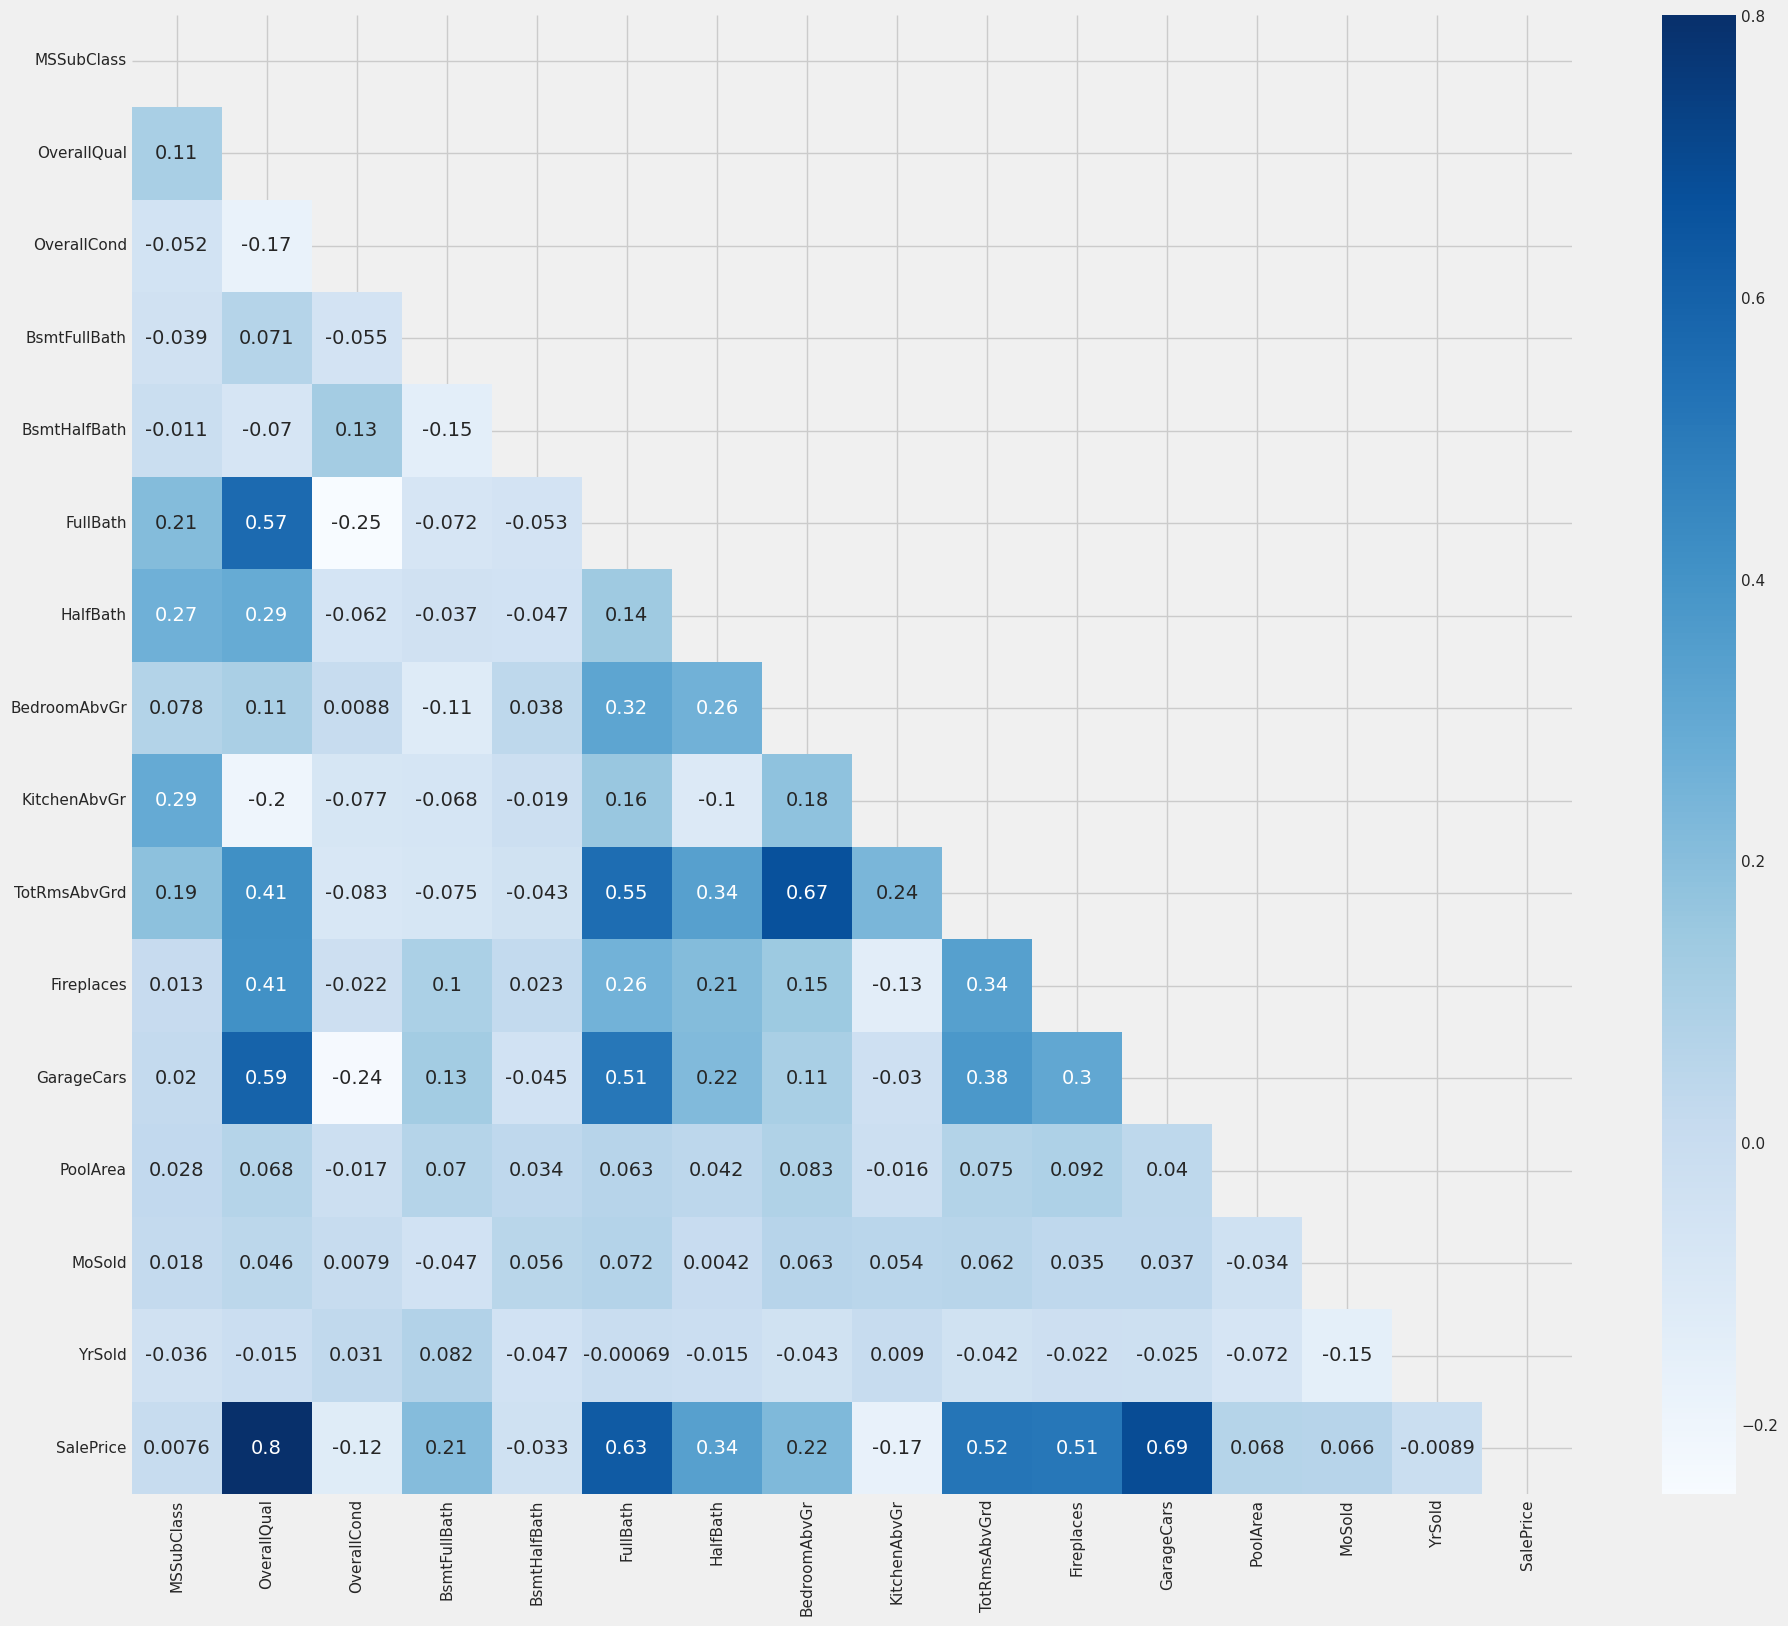

In [292]:
# heatmap correlation

corr = pd.concat([df_train_discrete, df_train['SalePrice']], axis=1).corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, mask = mask)
plt.show()

After checking correlation between features and target, KitchenAbvGr has weak relationship, while BsmtHalfBath and PoolArea almost have no correlation at all. These two features will be dropped. Additionally, features MSSubClass, MoSold, YrSold also have almost no correlation with target, hence all these features will be dropped. The other features do not have multicolinearity to each other. 

In [293]:
remove_discrete = ['MSSubClass', 'BsmtHalfBath', 'PoolArea', 'MoSold', 'YrSold']

df_train_discrete = df_train_discrete.drop(remove_discrete, axis = 1)

In [294]:
discrete = [item for item in discrete if item not in remove_discrete]

df_train_discrete.columns

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars'],
      dtype='object')

#### Numerical

Numerical Features will be selected based on variance inflation factor (VIF) and correlation.

In [295]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [296]:
df_train_numerical = df_train[numerical]

In [297]:
# Calculate initial VIF

vif_data = calculate_vif(df_train_numerical)
print(f'{vif_data}\n')

features_removed = []

# Iteratively remove features with VIF > 10
# Feature that has highest VIF will be dropped one by one per iteration

while vif_data['VIF'].max() > 10:
    max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
    print(f"Removing feature with high VIF: {max_vif_feature}")
    features_removed.append(max_vif_feature)
    df_train_numerical = df_train_numerical.drop(columns=[max_vif_feature])
    vif_data = calculate_vif(df_train_numerical)

          Feature           VIF
0     LotFrontage  1.423458e+01
1         LotArea  2.392220e+00
2       YearBuilt  1.385728e+04
3    YearRemodAdd  1.204589e+04
4      MasVnrArea  1.851284e+00
5      BsmtFinSF1           inf
6      BsmtFinSF2           inf
7       BsmtUnfSF           inf
8     TotalBsmtSF           inf
9        1stFlrSF           inf
10       2ndFlrSF           inf
11   LowQualFinSF           inf
12      GrLivArea           inf
13    GarageYrBlt  1.816523e+04
14     GarageArea  1.007850e+01
15     WoodDeckSF  1.830415e+00
16    OpenPorchSF  1.774513e+00
17  EnclosedPorch  1.322479e+00
18      3SsnPorch  1.034418e+00
19    ScreenPorch  1.145211e+00
20        MiscVal  1.016558e+00

Removing feature with high VIF: BsmtFinSF1
Removing feature with high VIF: 1stFlrSF
Removing feature with high VIF: GarageYrBlt
Removing feature with high VIF: YearBuilt
Removing feature with high VIF: GrLivArea
Removing feature with high VIF: YearRemodAdd
Removing feature with high VIF: TotalB

In [298]:
print("Remaining features after VIF reduction:\n")
print(df_train_numerical.columns)
print(f'\nFinal VIF scores:\n{vif_data}')

Remaining features after VIF reduction:

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'],
      dtype='object')

Final VIF scores:
          Feature       VIF
0     LotFrontage  7.681745
1         LotArea  2.294456
2      MasVnrArea  1.632605
3      BsmtFinSF2  1.200897
4       BsmtUnfSF  2.817432
5        2ndFlrSF  1.802638
6    LowQualFinSF  1.034197
7      GarageArea  7.508214
8      WoodDeckSF  1.736773
9     OpenPorchSF  1.705880
10  EnclosedPorch  1.194299
11      3SsnPorch  1.031011
12    ScreenPorch  1.132035
13        MiscVal  1.014786


Correlation Heatmap

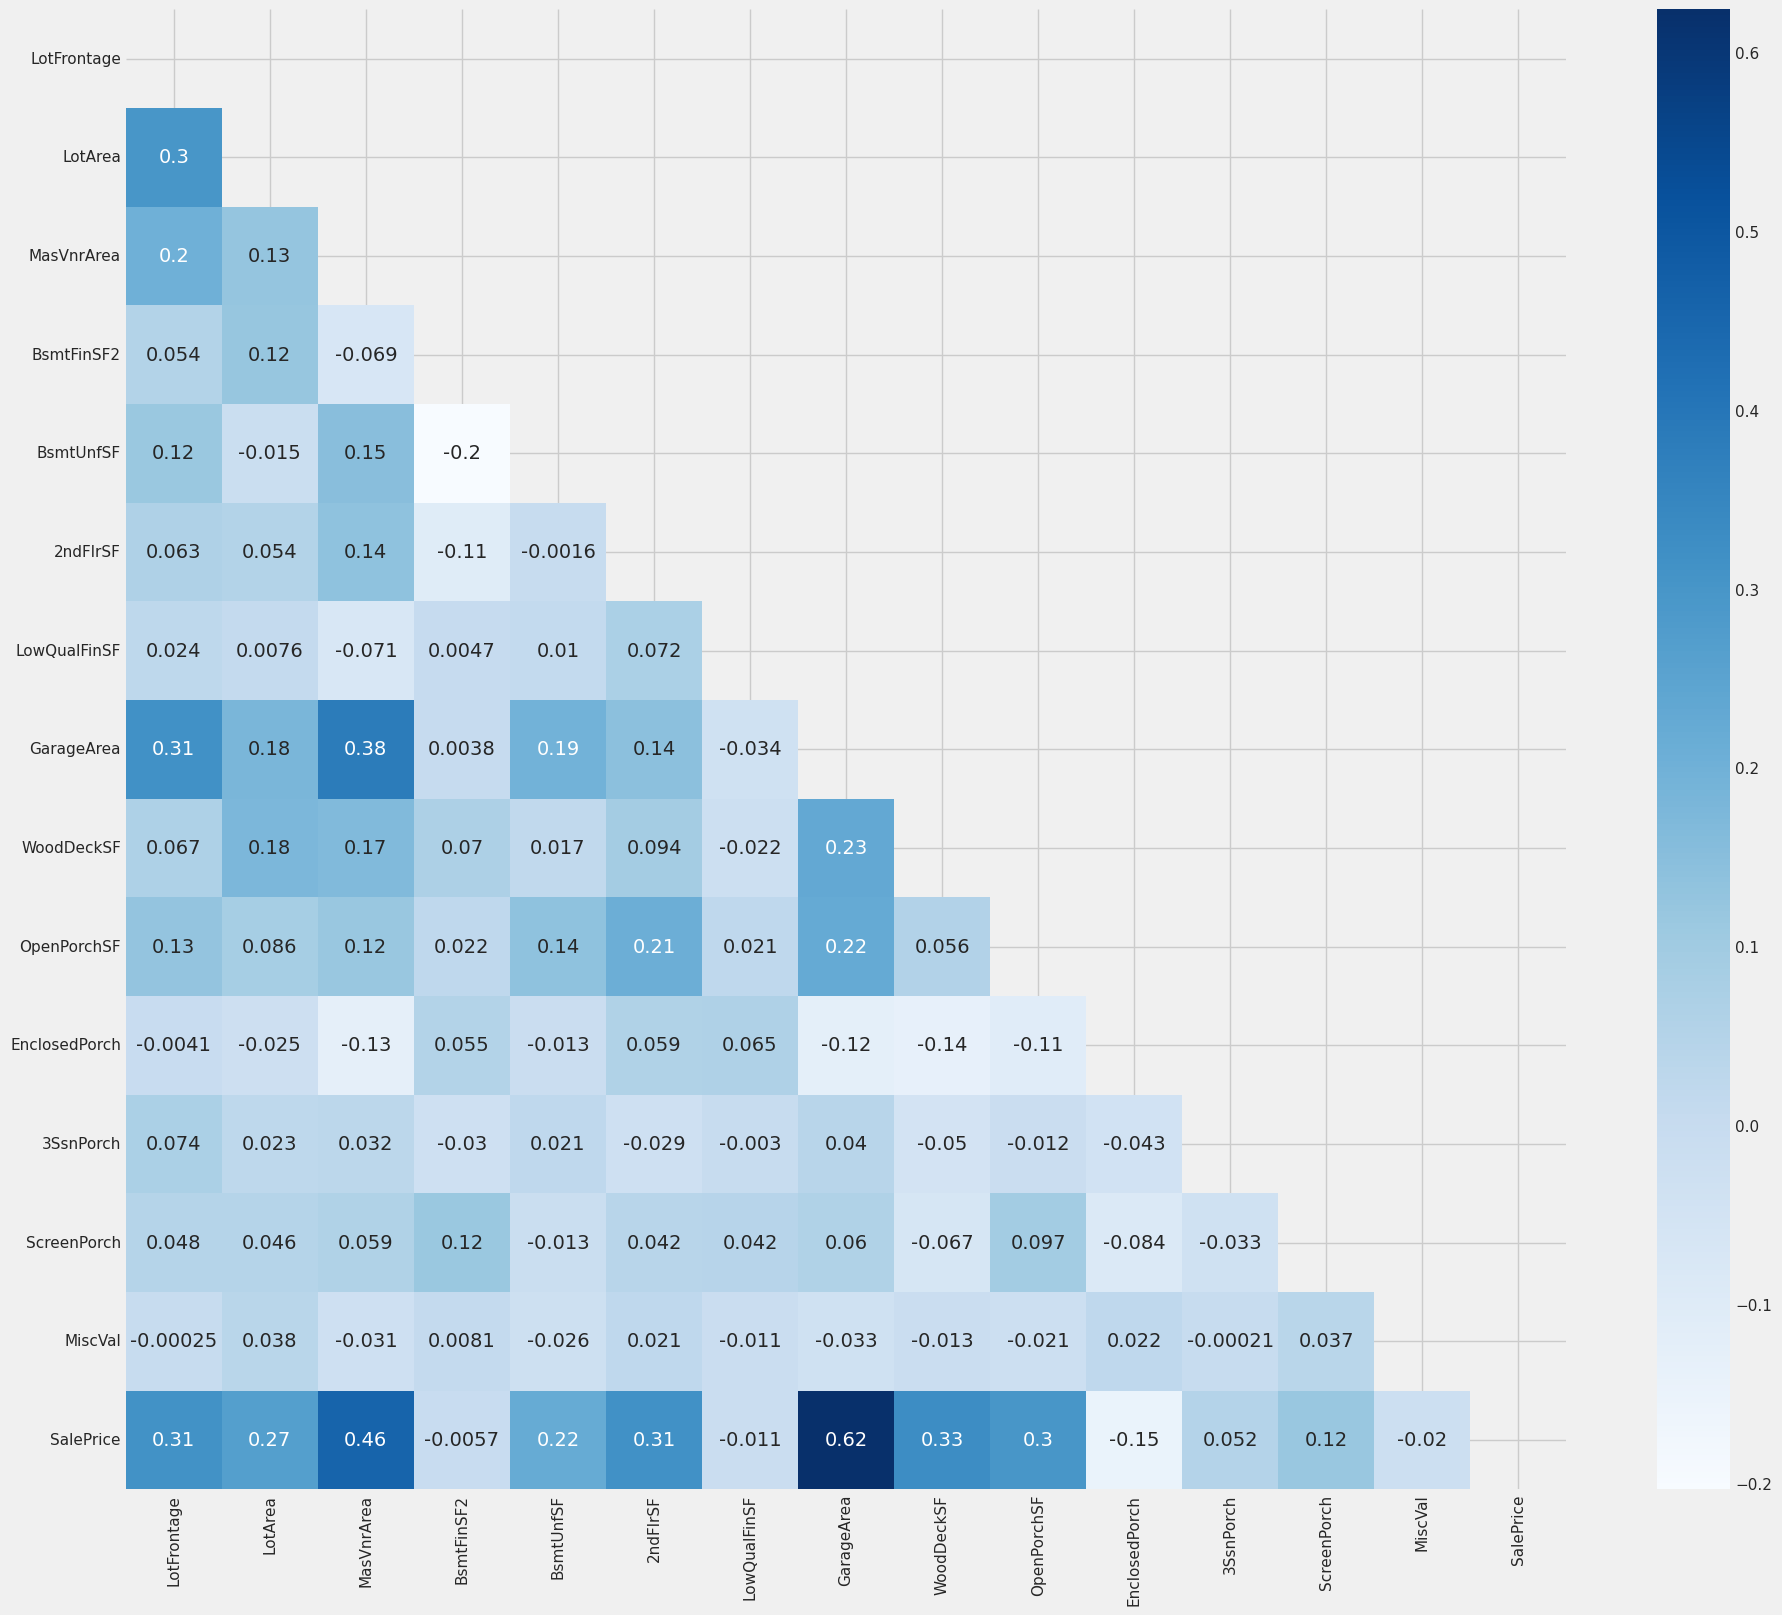

In [299]:
# heatmap correlation

corr = pd.concat([df_train_numerical, df_train['SalePrice']], axis=1).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, mask = mask)
plt.show()

There are no features that have high correlation to each other. GarageArea and MasVnrArea have positive moderate correlation with SalePrice.

## Outlier Handling

In [300]:
# function to check histogram, distribution plot, and boxplot for each features

def check_plot(df, variable):
    # check distribution plot from variable in df.     

    # figure size and title
    plt.figure(figsize=(16, 4))
    plt.suptitle(f' Outlier Analysis for {variable} feature', fontsize=16, y=1.05)

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histogram')

    # distribution (Q-Q) plot  
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()


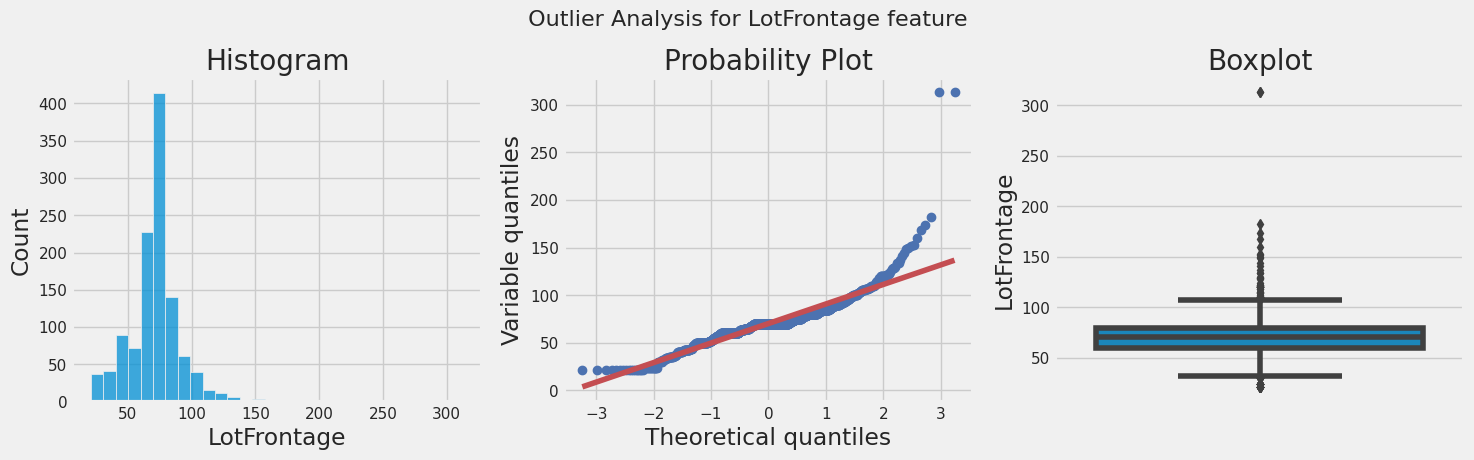

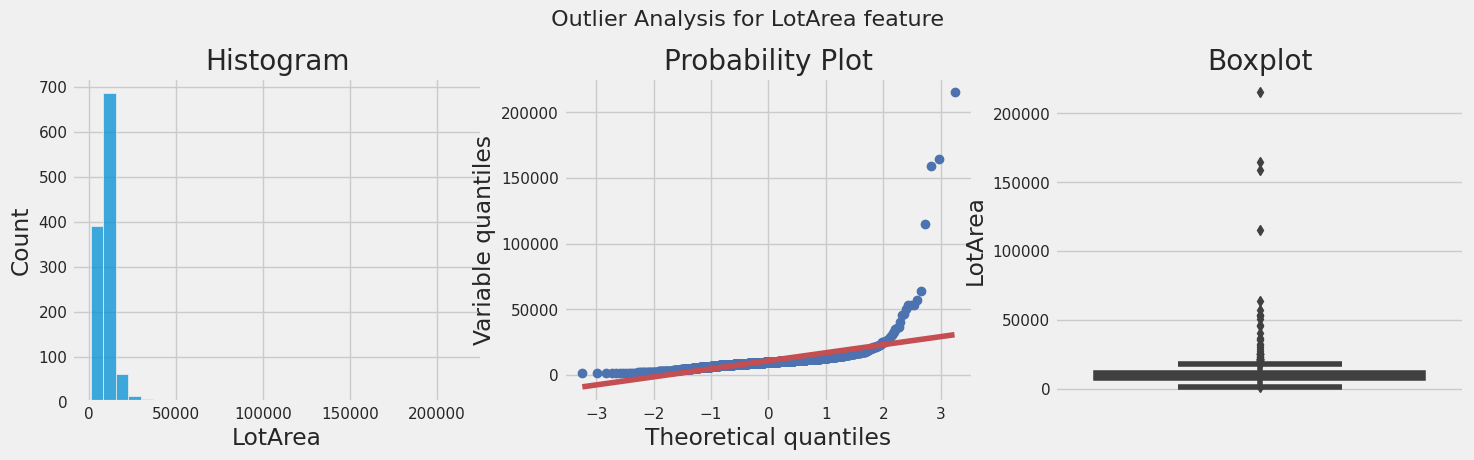

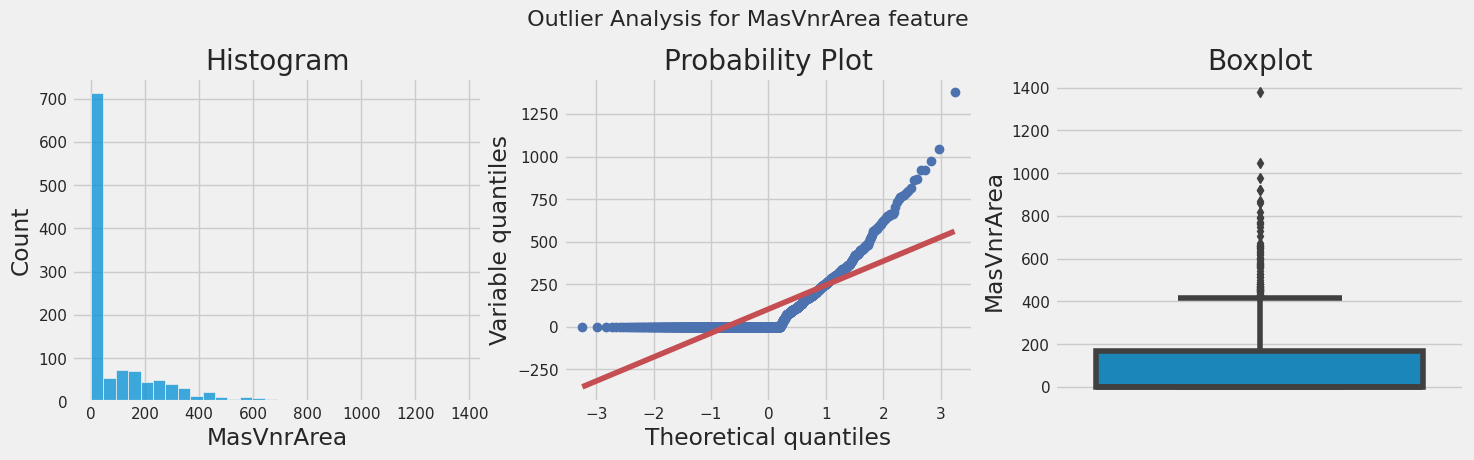

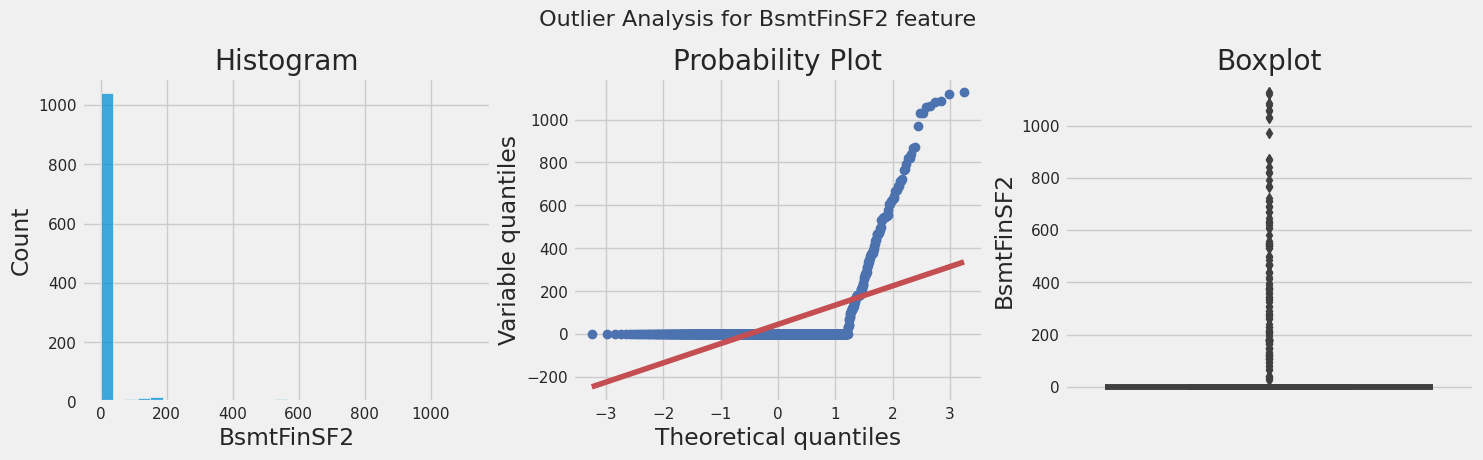

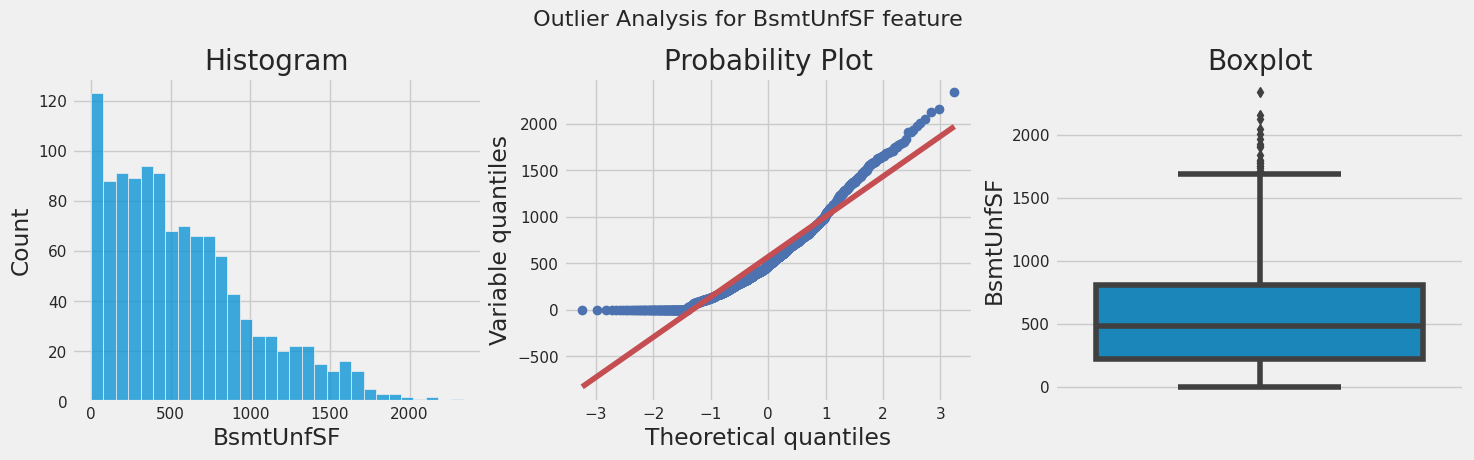

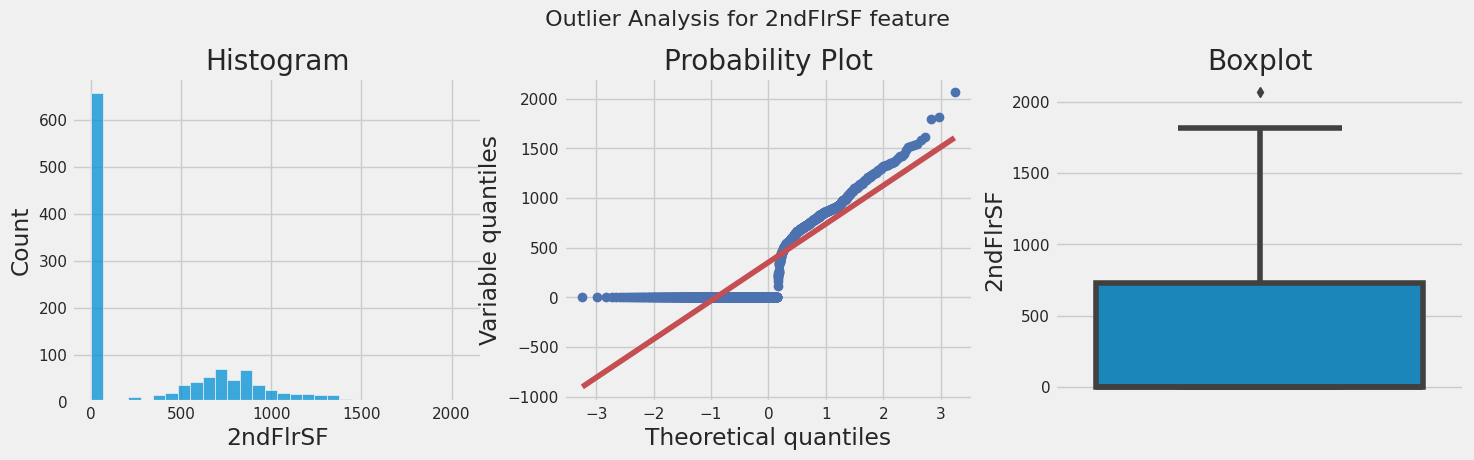

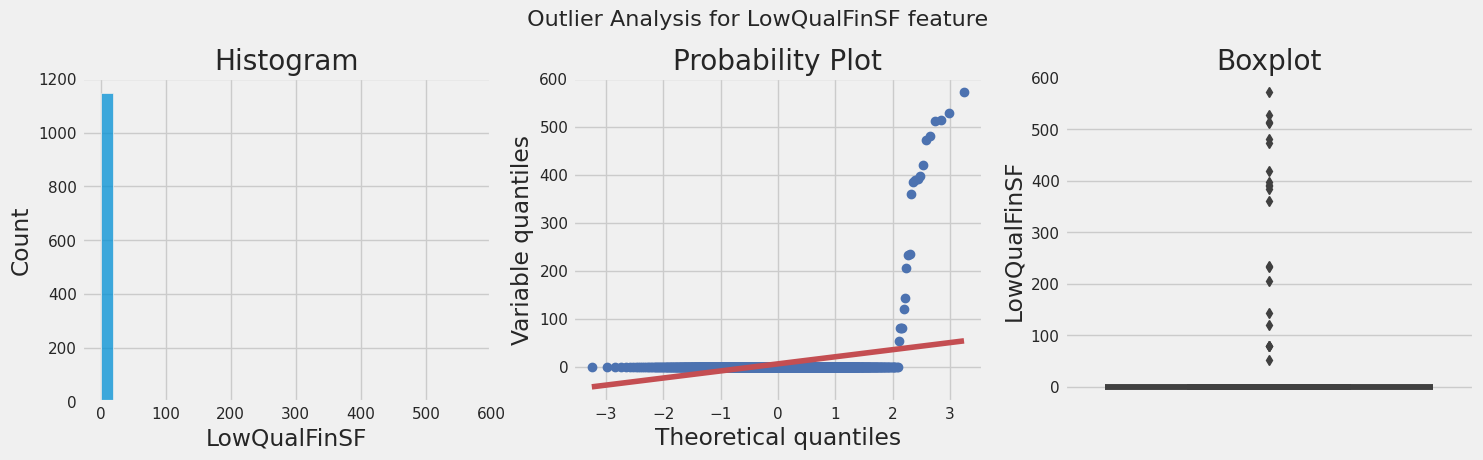

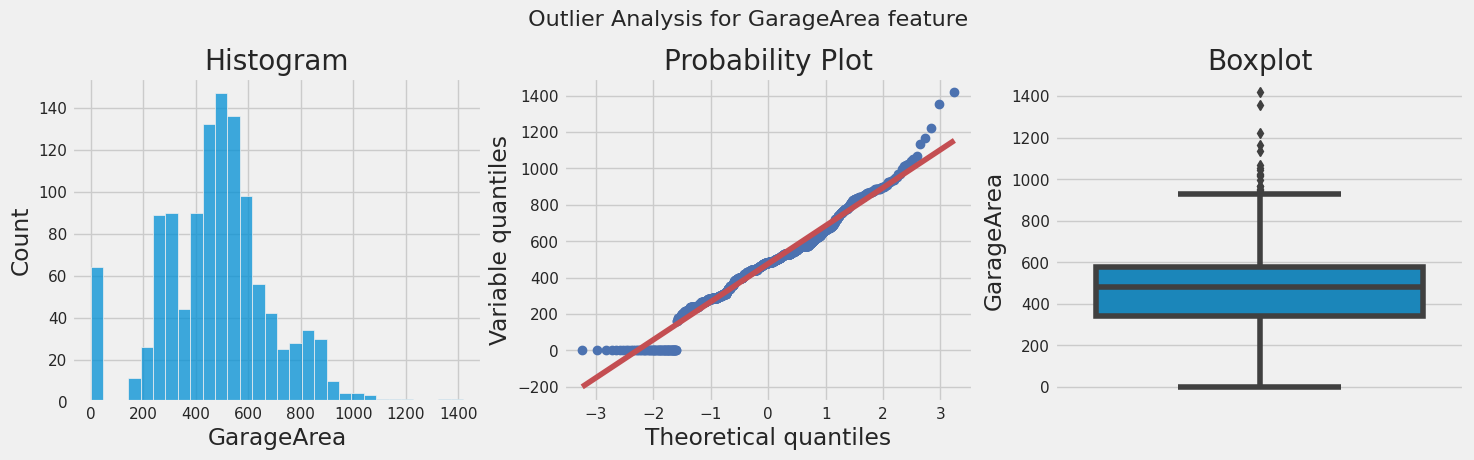

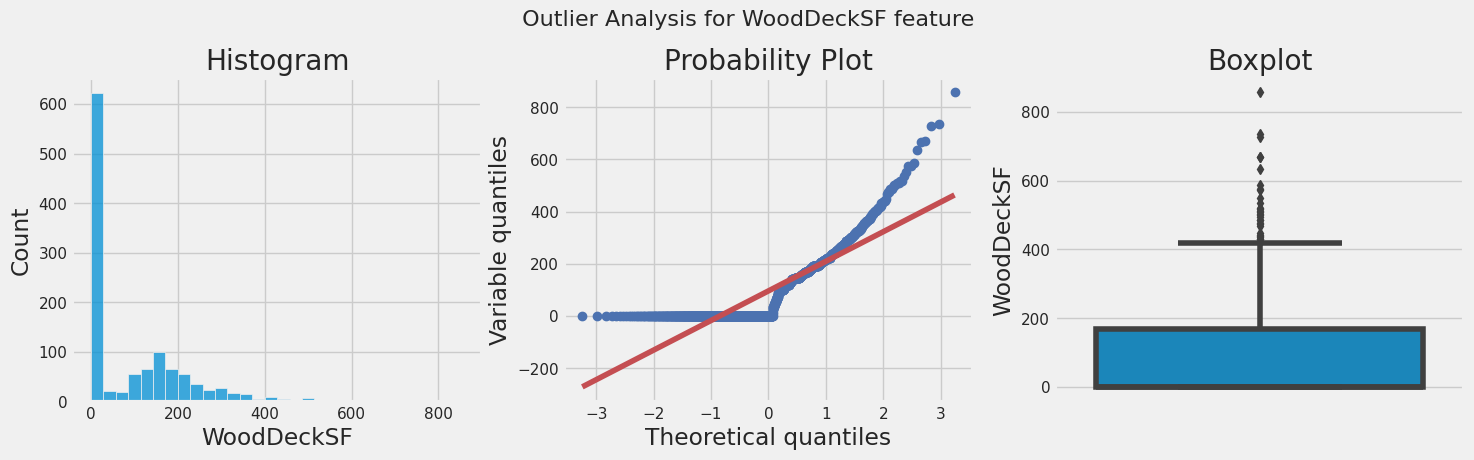

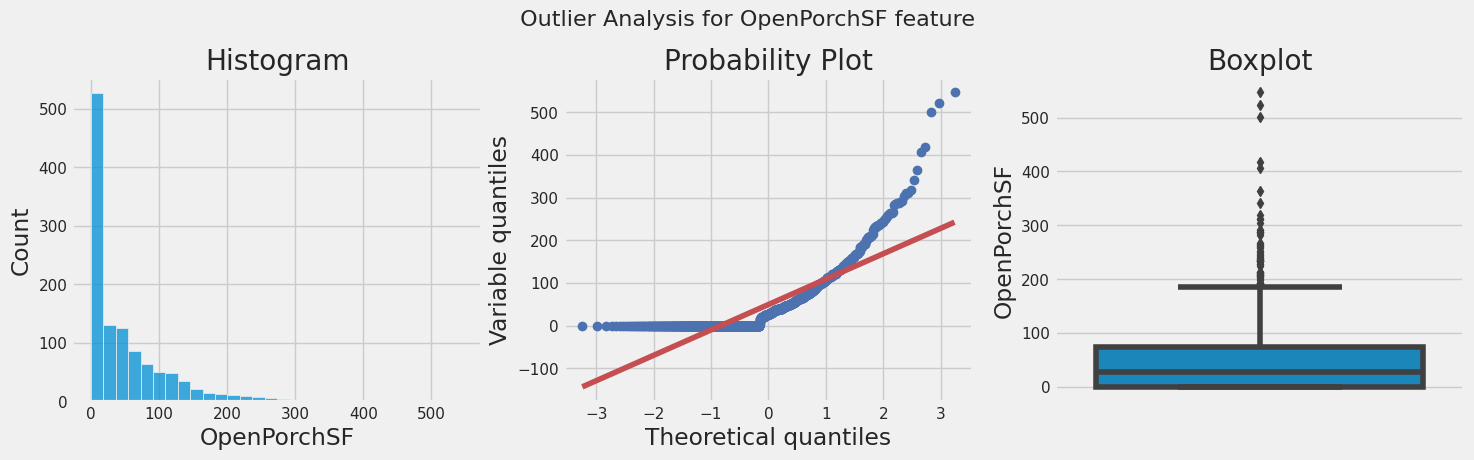

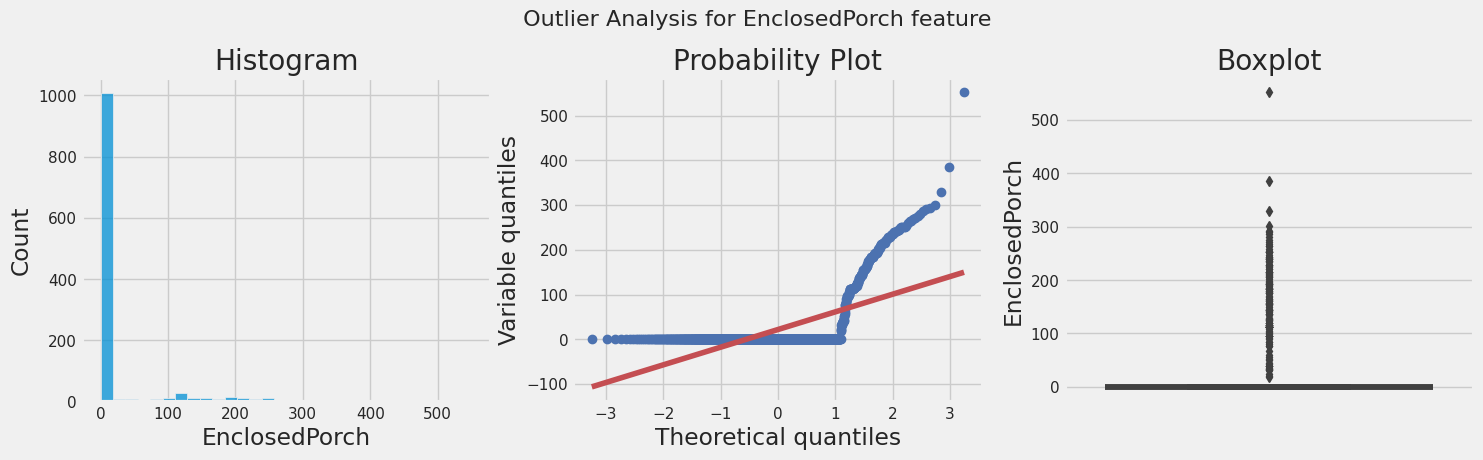

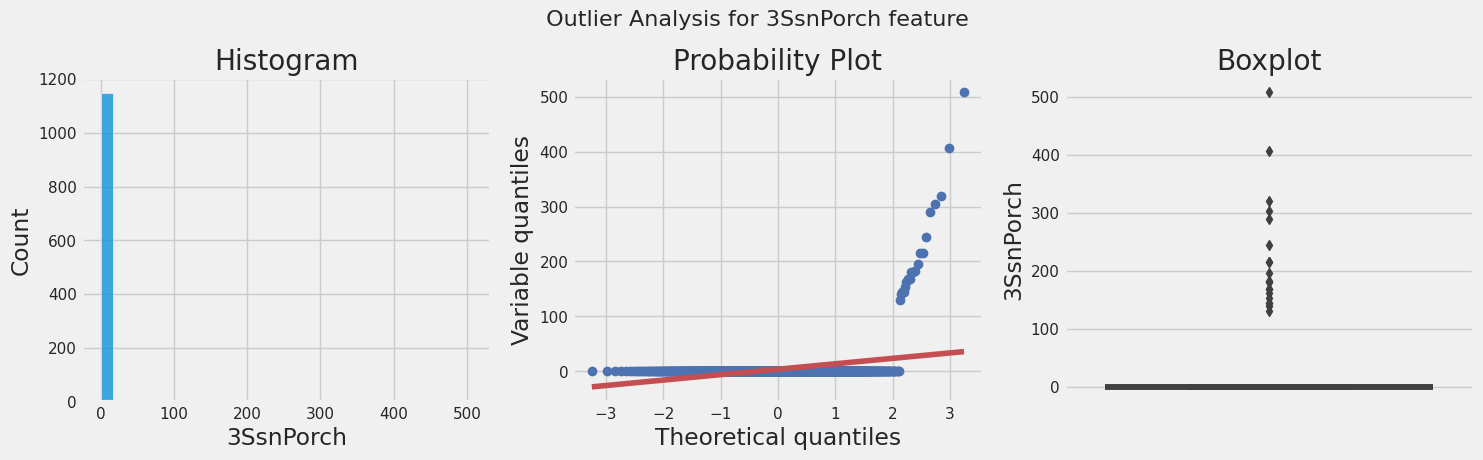

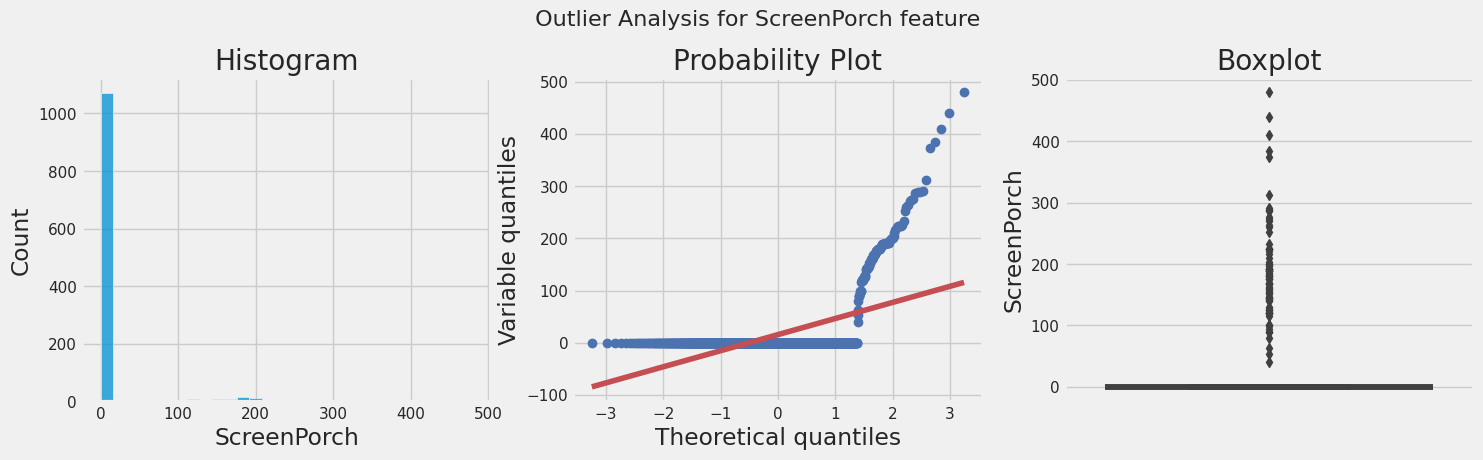

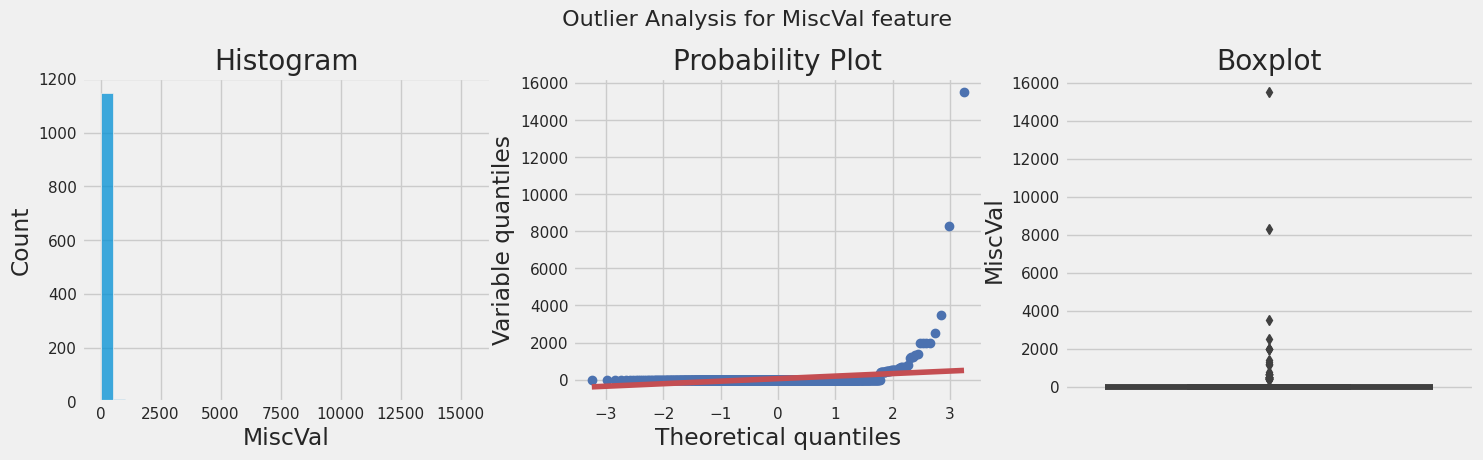

In [301]:
# plot looping for distribution analysis each features

for col in df_train_numerical.columns:
    check_plot(df_train_numerical, col)

Almost all features have global and local outliers. IQR will be checked for each features for outlier handling. 

In [302]:
# function to check upper IQR and lower IQR from columns

def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [303]:
# dataframe to summarize IQR compared to minimum and maximum value for each columns

pd.DataFrame(data = {'Upper_IQR': [find_outlier_boundary(df_train_numerical, col)[0] for col in df_train_numerical.columns], 
                     'Maximum': [df_train_numerical[col].max() for col in df_train_numerical.columns], 
                     'Lower_IQR': [find_outlier_boundary(df_train_numerical, col)[1]  for col in df_train_numerical.columns], 
                     'Minimum': [df_train_numerical[col].min() for col in df_train_numerical.columns]}, 
             index = [col for col in df_train_numerical.columns])

Upper_IQR   Maximum  Lower_IQR  Minimum
LotFrontage      107.500     313.0     31.500     21.0
LotArea        17869.125  215245.0   1418.125   1300.0
MasVnrArea       415.000    1378.0   -249.000      0.0
BsmtFinSF2         0.000    1127.0      0.000      0.0
BsmtUnfSF       1691.875    2336.0   -659.125      0.0
2ndFlrSF        1820.000    2065.0  -1092.000      0.0
LowQualFinSF       0.000     572.0      0.000      0.0
GarageArea       928.500    1418.0    -11.500      0.0
WoodDeckSF       420.000     857.0   -252.000      0.0
OpenPorchSF      185.000     547.0   -111.000      0.0
EnclosedPorch      0.000     552.0      0.000      0.0
3SsnPorch          0.000     508.0      0.000      0.0
ScreenPorch        0.000     480.0      0.000      0.0
MiscVal            0.000   15500.0      0.000      0.0

Each values from features that is not in the range of Upper and Lower IQR will be replaced by their Upper and Lower IQR. 

In [304]:
# replace the outliers with upper and lower IQR

for col in df_train_numerical.columns:
    Population_upper_limit, Population_lower_limit = find_outlier_boundary(df_train_numerical, col)
    
    df_train[col]= np.where(df_train[col] > Population_upper_limit, Population_upper_limit,
                       np.where(df_train[col] < Population_lower_limit, Population_lower_limit, df_train[col]))

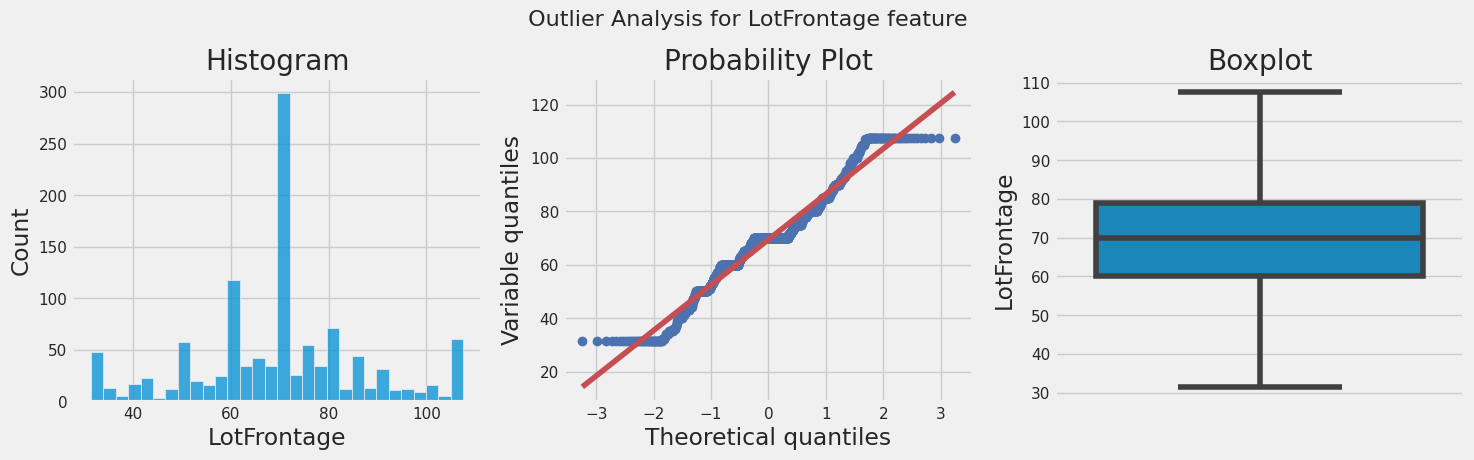

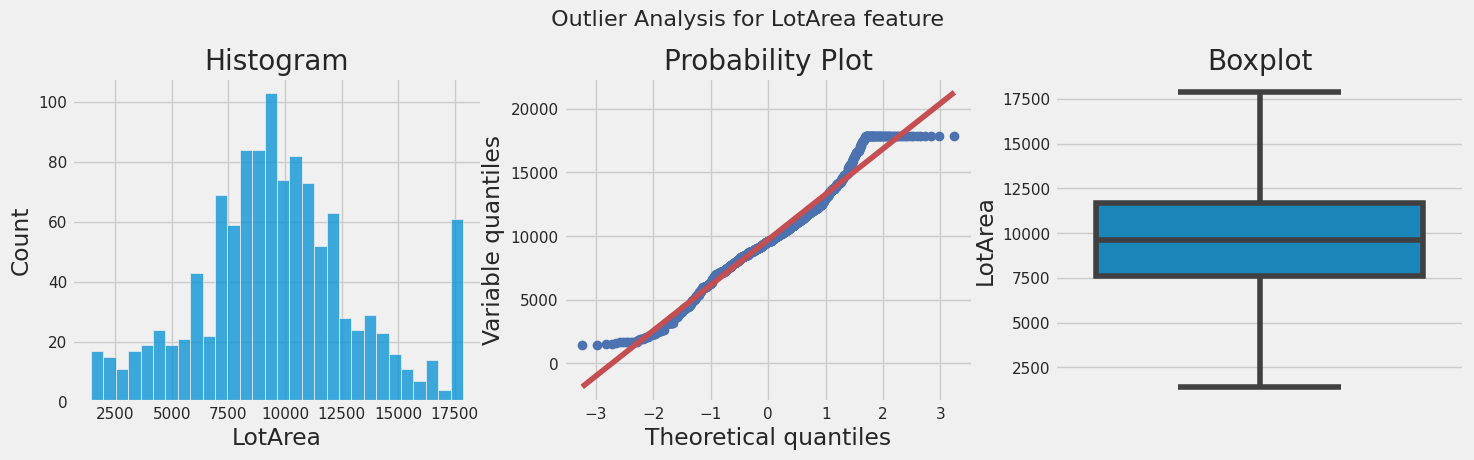

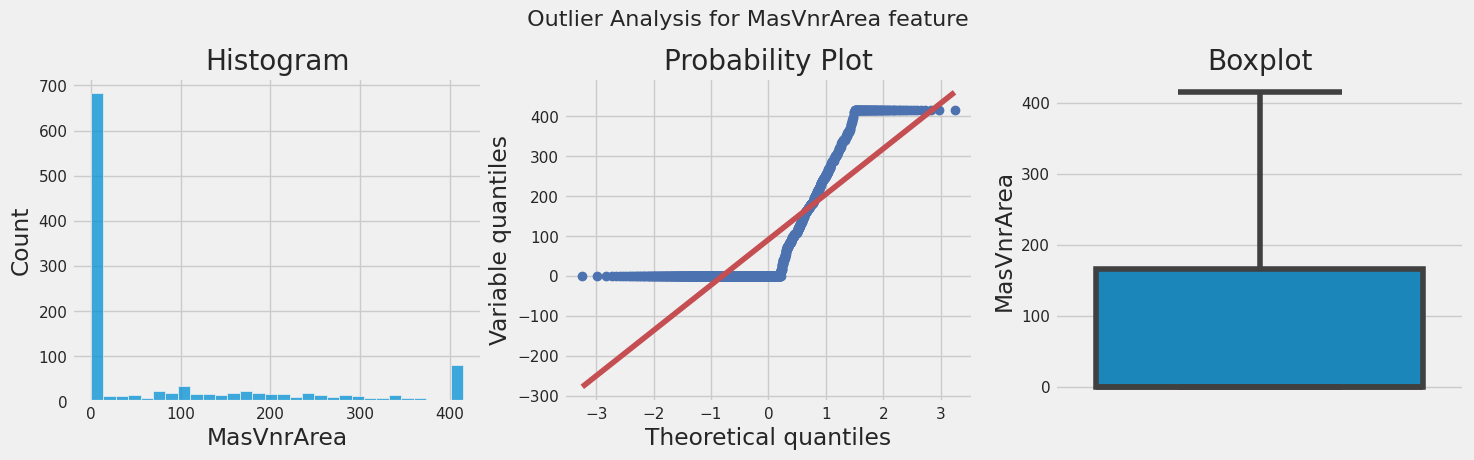

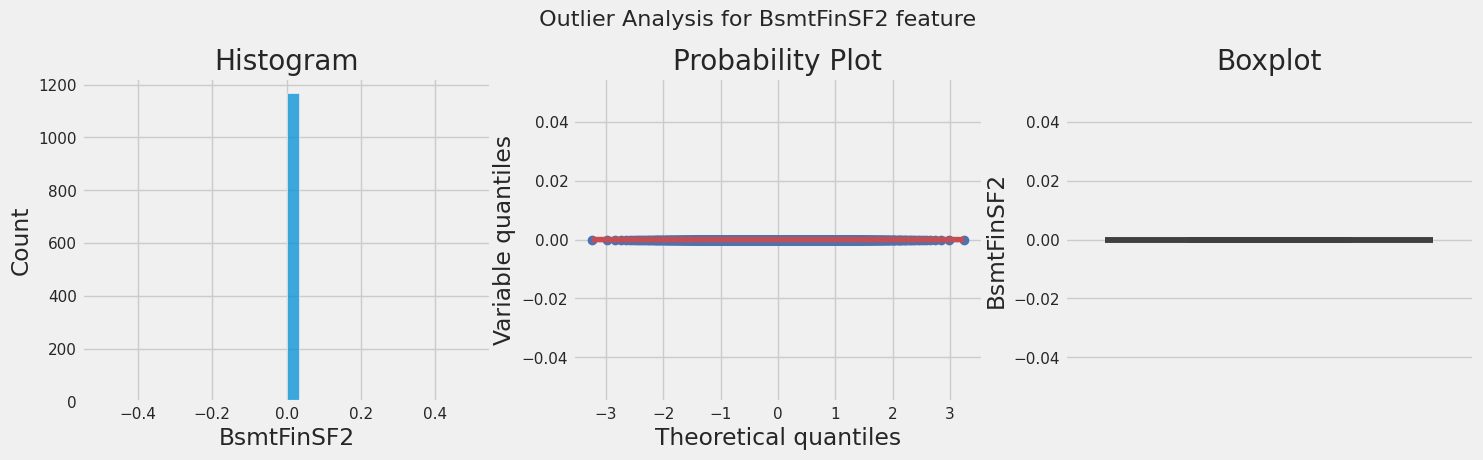

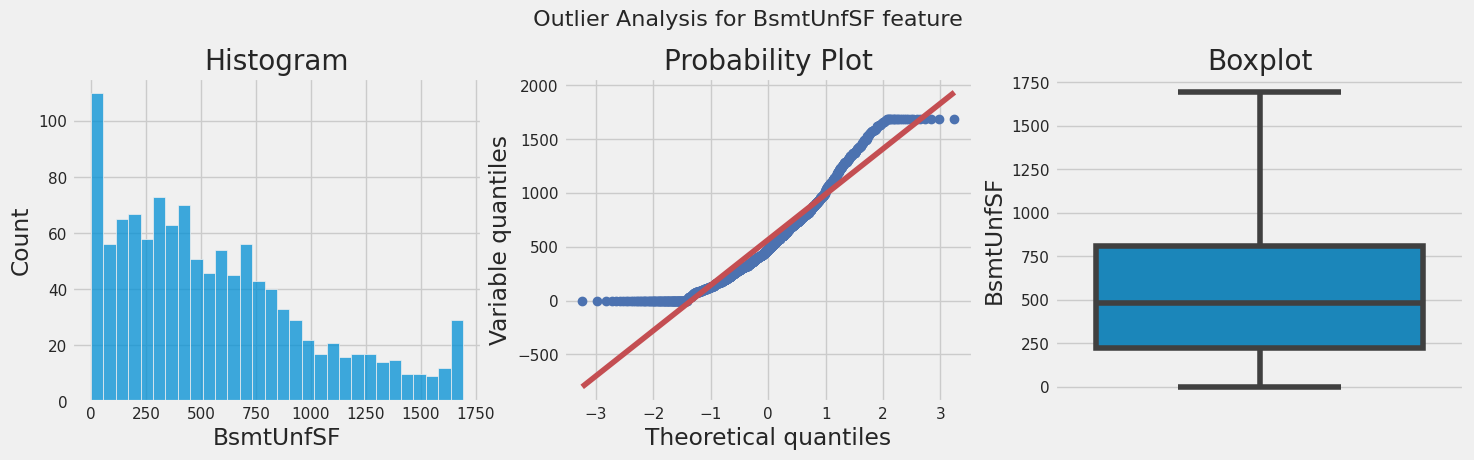

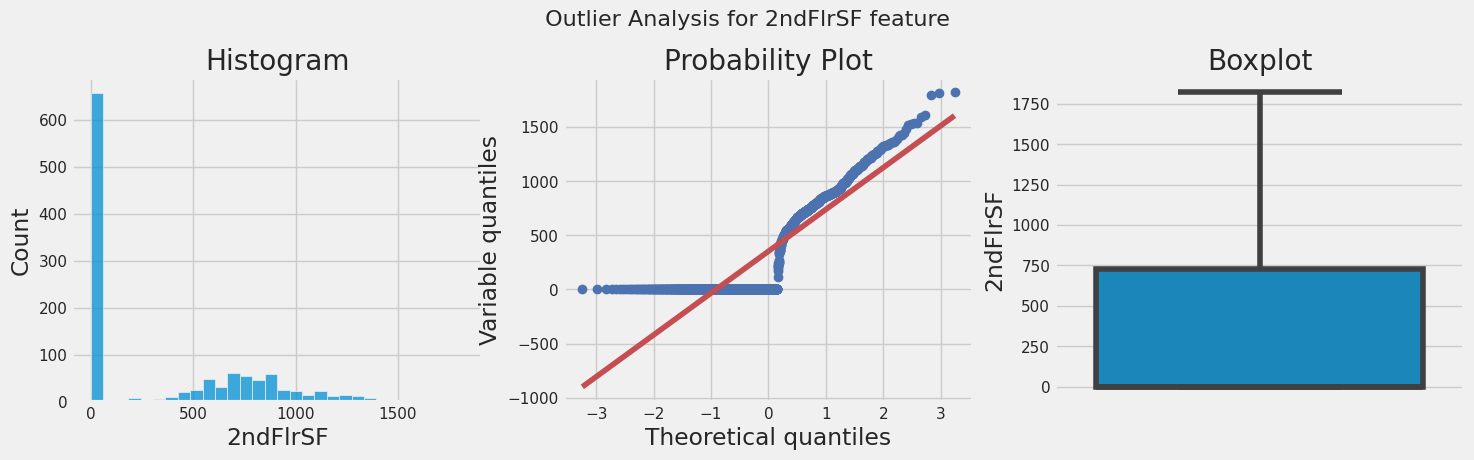

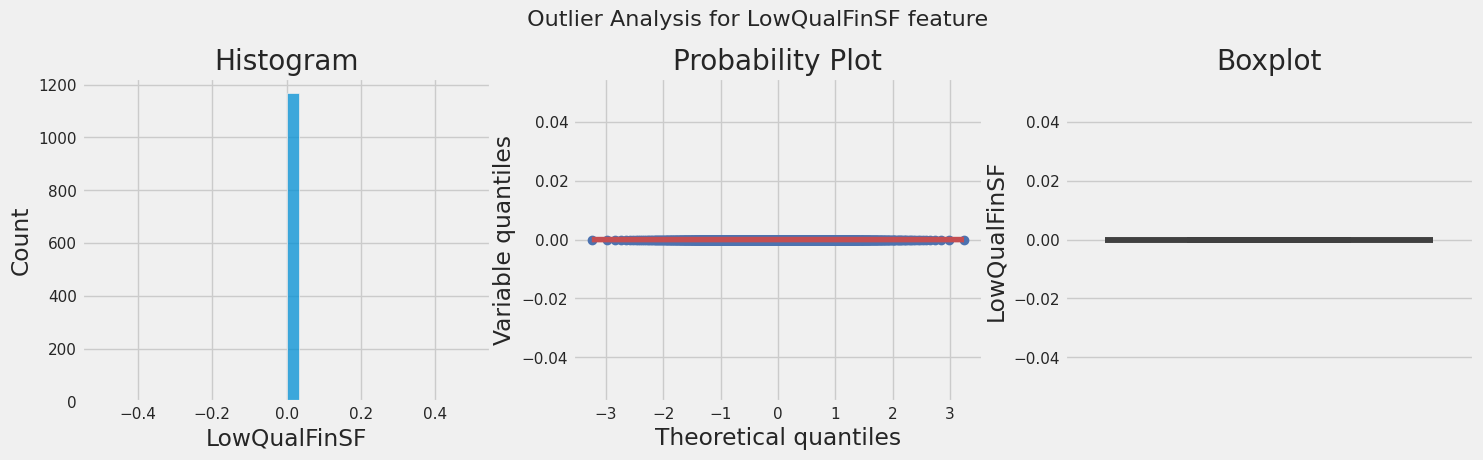

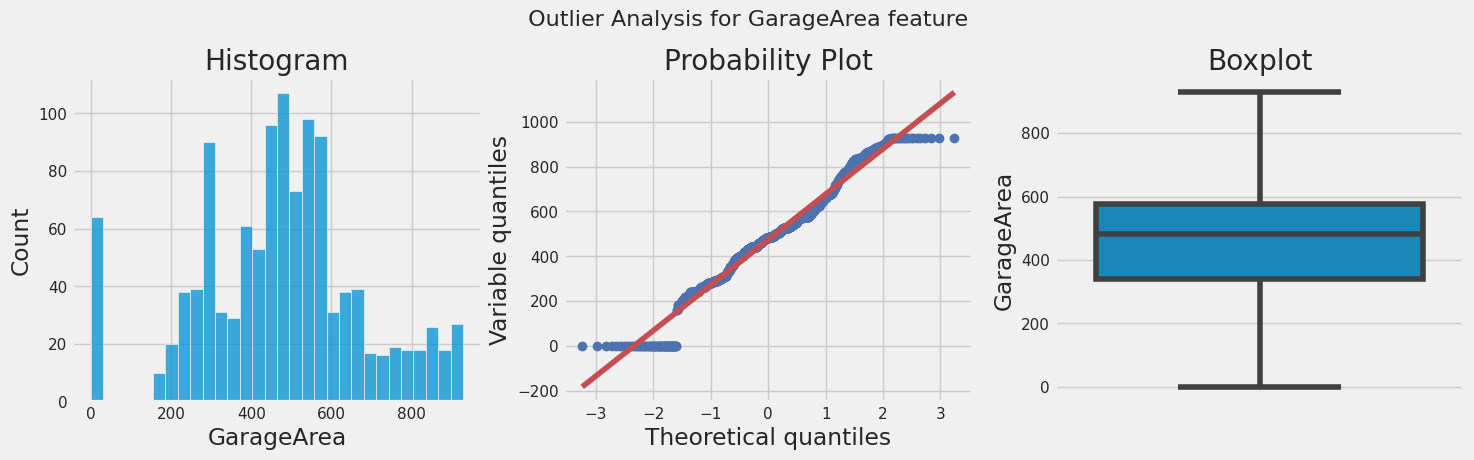

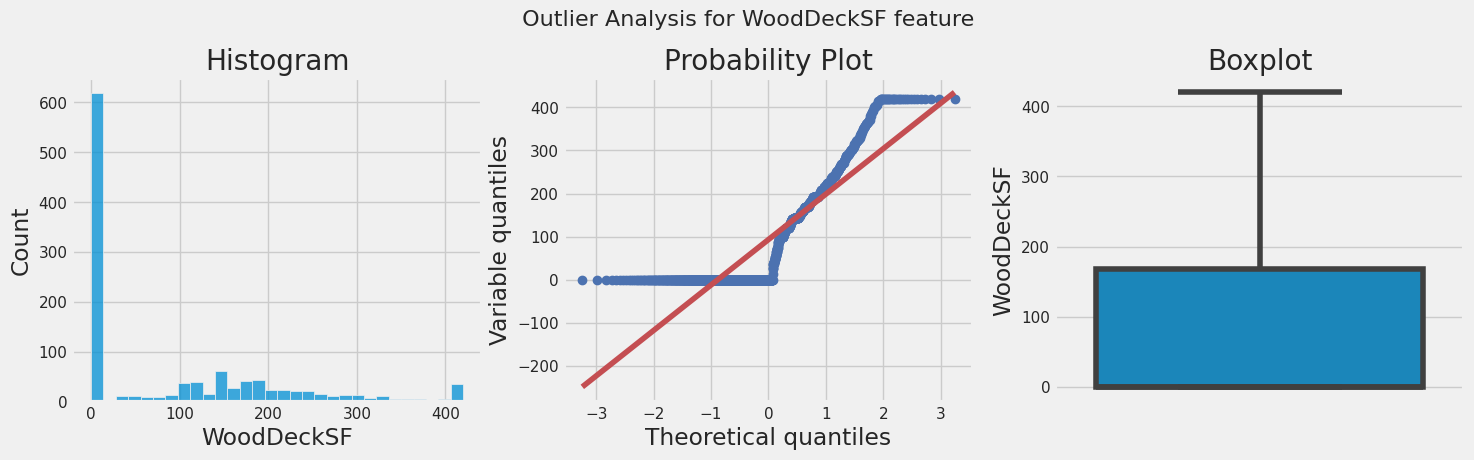

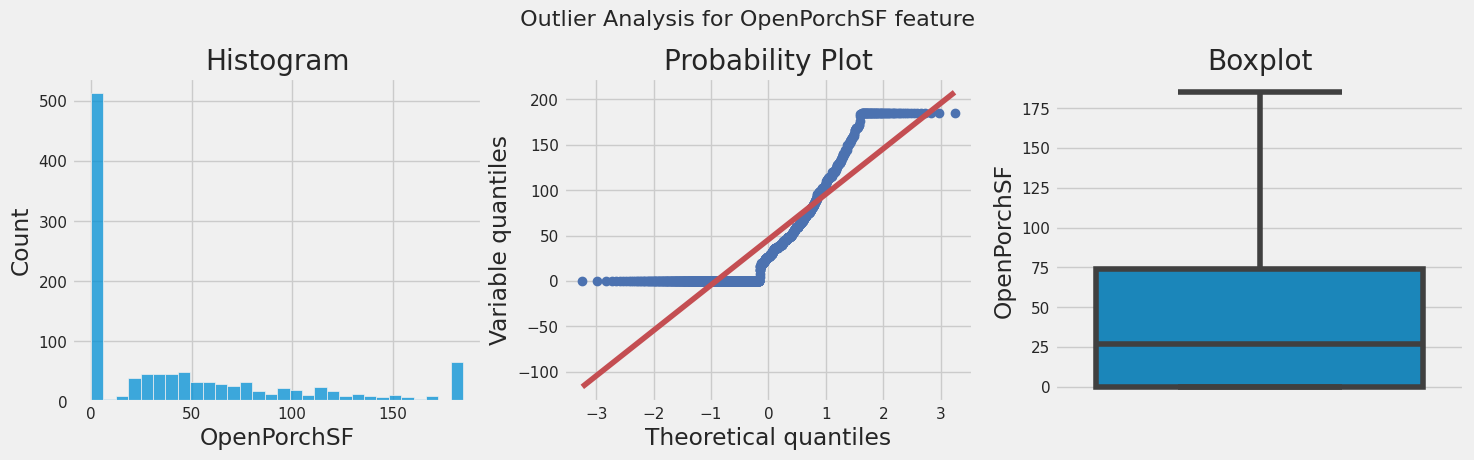

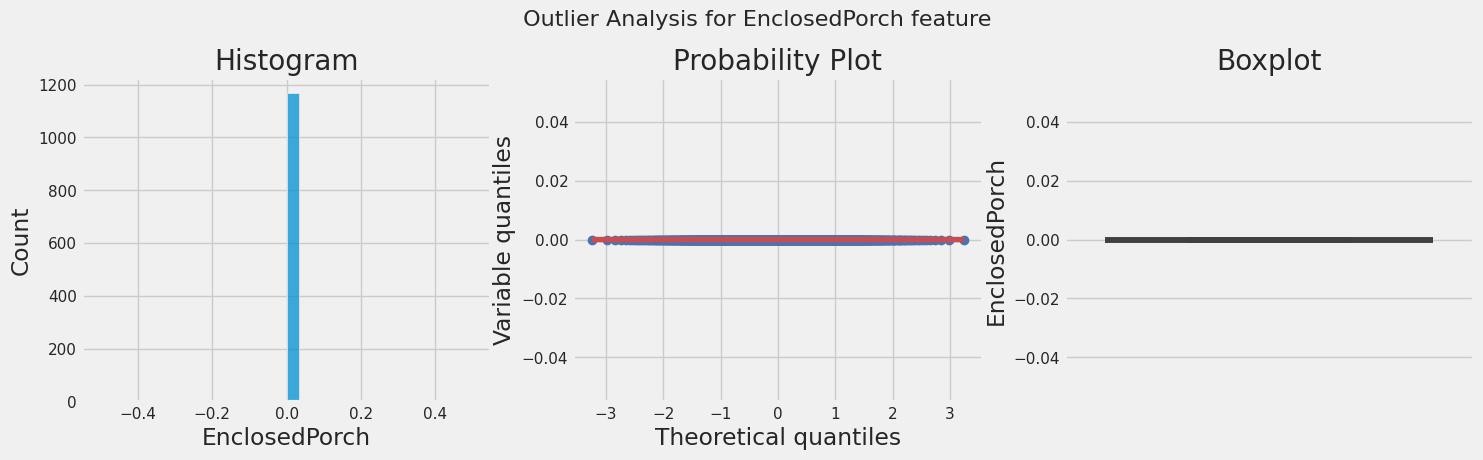

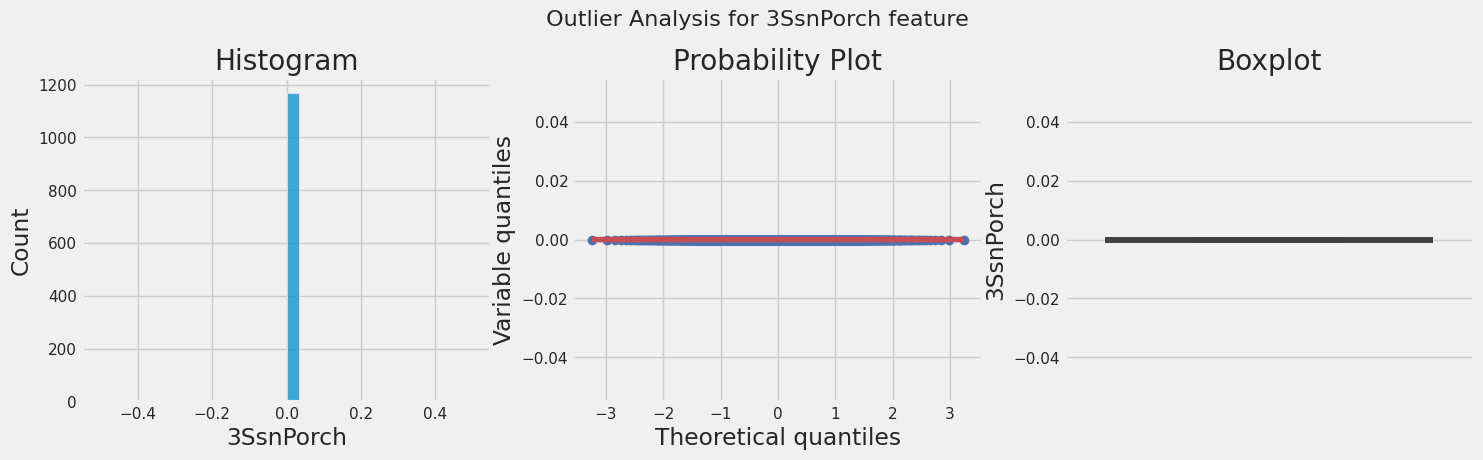

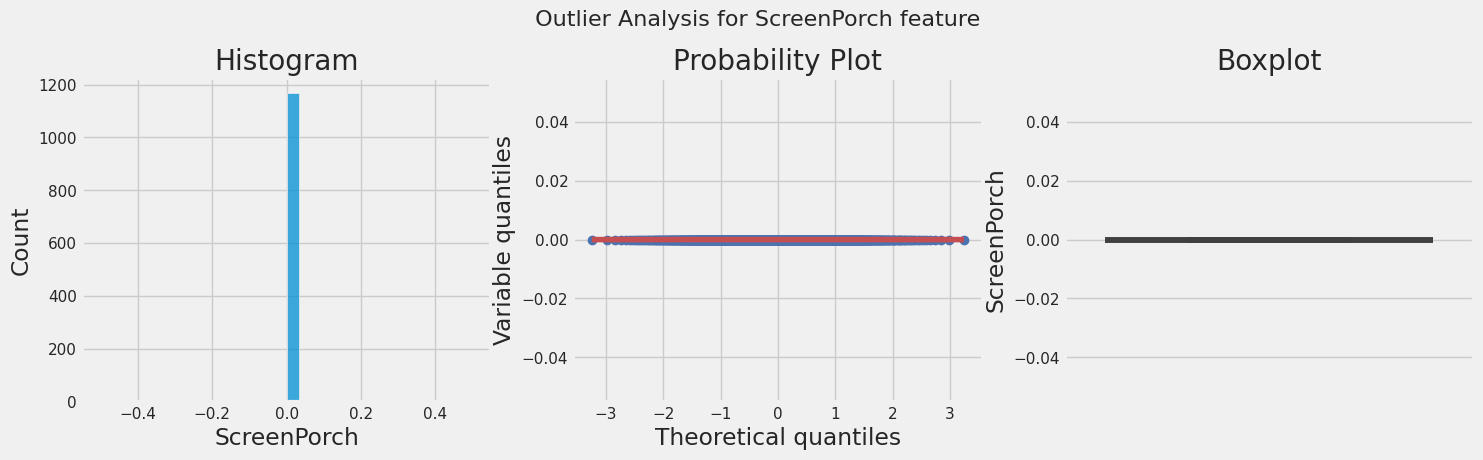

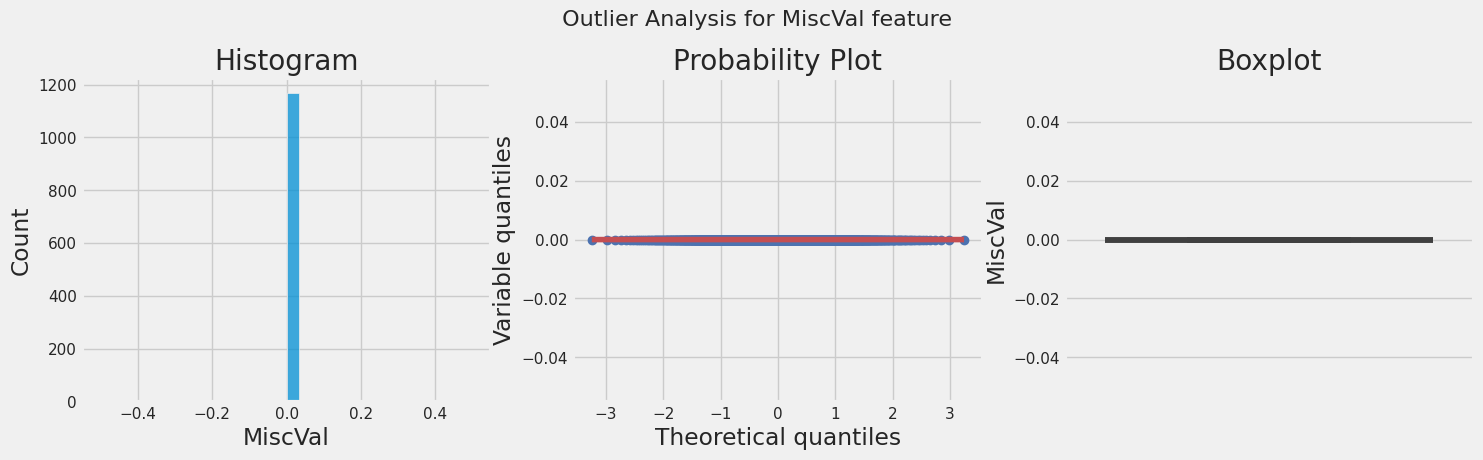

In [305]:
# plot looping for distribution analysis after outlier treatment in features

for col in df_train_numerical.columns:
    check_plot(df_train, col)

In [306]:
# features that have singular value after outlier handling will be dropped. 

df_train_numerical = df_train_numerical.drop([ 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal'], axis = 1)
df_train_numerical.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', '2ndFlrSF',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

Final features that will be used for modeling

In [307]:
final_features = list(df_train_categorical.columns) + list(df_train_numerical.columns) + list(df_train_discrete.columns)
final_features

['Neighborhood',
 'Exterior2nd',
 'Exterior1st',
 'BsmtFinType1',
 'HouseStyle',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'Foundation',
 'HeatingQC',
 'BsmtExposure',
 'ExterQual',
 'GarageType',
 'LotConfig',
 'LotShape',
 'SaleCondition',
 'MSZoning',
 'SaleType',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 '2ndFlrSF',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

## Data Train and Test Assignment

In [308]:
# applying final features for model training

# X_train and y_train
X_train = df_train[final_features]
y_train = df_train['SalePrice']

#X_test and y_test
X_test = df_test[final_features]
y_test = df_test['SalePrice']

In [309]:
X_train.head()

Neighborhood Exterior2nd Exterior1st BsmtFinType1 HouseStyle BsmtQual  \
254         NAmes     MetalSd     MetalSd          Rec     1Story       TA   
1066      Gilbert     VinylSd     VinylSd          Unf     2Story       Gd   
638       Edwards     Wd Sdng     MetalSd          Unf     1Story       Fa   
799         SWISU     Wd Sdng     Wd Sdng          ALQ     1.5Fin       Gd   
380         SWISU     Wd Sdng     BrkFace          LwQ     1.5Fin       TA   

     KitchenQual GarageFinish Foundation HeatingQC BsmtExposure ExterQual  \
254           TA          RFn     CBlock        TA           No        TA   
1066          TA          RFn      PConc        Gd           No        Gd   
638           TA          Unf     CBlock        Gd           No        TA   
799           Gd          Unf     BrkTil        Ex           No        TA   
380           Gd          Unf     BrkTil        TA           No        TA   

     GarageType LotConfig LotShape SaleCondition MSZoning SaleType  \
254      Attchd    Inside      Reg        Normal       RL       WD   
1066     Attchd    Inside      IR1        Normal       RL       WD   
638      Attchd    Inside      Reg        Normal       RL       WD   
799      Detchd    Corner      Reg        Normal       RL       WD   
380      Detchd    Inside      Reg        Normal       RL       WD   

      LotFrontage  LotArea  MasVnrArea  BsmtUnfSF  2ndFlrSF  GarageArea  \
254          70.0   8400.0         0.0      392.0       0.0       294.0   
1066         59.0   7837.0         0.0      799.0     772.0       380.0   
638          67.0   8777.0         0.0      796.0       0.0         0.0   
799          60.0   7200.0       252.0      162.0     787.0       240.0   
380          50.0   5000.0         0.0      808.0     665.0       308.0   

      WoodDeckSF  OpenPorchSF  OverallQual  OverallCond  BsmtFullBath  \
254        250.0          0.0          5.0          6.0           1.0   
1066         0.0         40.0          6.0          7.0           0.0   
638        328.0          0.0          5.0          7.0           0.0   
799          0.0          0.0          5.0          7.0           1.0   
380          0.0          0.0          5.0          6.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
254        1.0       0.0           3.0           1.0           5.0   
1066       2.0       1.0           3.0           1.0           7.0   
638        1.0       0.0           2.0           1.0           4.0   
799        1.0       1.0           3.0           1.0           7.0   
380        2.0       0.0           3.0           1.0           6.0   

      Fireplaces  GarageCars  
254          0.0         1.0  
1066         1.0         2.0  
638          0.0         0.0  
799          2.0         1.0  
380          1.0         1.0

## Pipeline for Feature Encoding and Feature Scaling

In [310]:
# Create Pipeline
# target encoding will be used instead of One Hot Encoding technique to prevent curse of dimensionality

preprocessor = Pipeline([
    ('target', TargetEncoder(cols= list(df_train_categorical.columns))),
    ('scaler', StandardScaler())
])

In [311]:
X_train_processing = preprocessor.fit_transform(X_train, y_train)

X_test_processing = preprocessor.transform(X_test)

In [312]:
# all features used in model training
 
preprocessor.get_feature_names_out()

array(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'BsmtFinType1',
       'HouseStyle', 'BsmtQual', 'KitchenQual', 'GarageFinish',
       'Foundation', 'HeatingQC', 'BsmtExposure', 'ExterQual',
       'GarageType', 'LotConfig', 'LotShape', 'SaleCondition', 'MSZoning',
       'SaleType', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF',
       '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars'], dtype=object)

In [313]:
X_train_processing = pd.DataFrame(X_train_processing,columns=preprocessor.get_feature_names_out())
X_test_processing = pd.DataFrame(X_test_processing,columns=preprocessor.get_feature_names_out())

## Training Data

In [314]:
# baseline and ensemble model for training

linear = LinearRegression() #baseline model
ada = AdaBoostRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

### Model Selection

In [315]:
# model iteration
# two metrics will be used: 
# 1. RMSE 
# 2. R2 (for result interpretation clarity only)

ml = [('Linear Regression',linear),
      ('AdaBoost',ada),
      ('Random Forest',rf),
      ('XGBoost',xgb)]

r2_train = []
r2_test = []

rmse_train = []
rmse_test = []

models = []

for model in ml:
  model[1].fit(X_train_processing,y_train)

  predict_train = model[1].predict(X_train_processing)
  predict_test = model[1].predict(X_test_processing)

  r2_score_train = r2_score(y_train,predict_train)
  r2_score_test = r2_score(y_test,predict_test)

  rmse_score_train = root_mean_squared_error(y_train,predict_train)
  rmse_score_test = root_mean_squared_error(y_test,predict_test)

  r2_train.append(r2_score_train)
  r2_test.append(r2_score_test)

  rmse_train.append(rmse_score_train)
  rmse_test.append(rmse_score_test)

  models.append(model[0])

df_metrics = pd.DataFrame({'model':models,
                           'r2_score_train':r2_train,
                           'r2_score_test':r2_test,
                           'RMSE_train':rmse_train,
                           'RMSE_test':rmse_test})

In [316]:
df_metrics

model  r2_score_train  r2_score_test    RMSE_train  \
0  Linear Regression        0.833960       0.831841  31469.904976   
1           AdaBoost        0.852671       0.848999  29643.774112   
2      Random Forest        0.976897       0.873045  11738.843550   
3            XGBoost        0.999821       0.890821   1032.563112   

      RMSE_test  
0  35914.277133  
1  34032.724211  
2  31205.536589  
3  28938.478776

1. Linear Regression have similar value between high r2_score_train (0.834) and r2_score_test (0.832), which indicated no overfit and underfit. 

2. AdaBoost have similar value between high r2_score_train (0.853) and r2_score_test (0.849), which indicated no overfit and underfit. However, AdaBoost have higher R2 score and lower RMSE than Linear Regression. 

3. Random Forest have high difference between r2_score_train (0.977) and r2_score_test (0.873), which indicated this model is overfit. This model is categorized as overfit, indicating the model cannot understand general data pattern. 

4. XGBoost have extremely high difference between r2_score_train (0.999) and r2_score_test (0.891), which indicated this model is overfit. This model is categorized as overfit, indicating the model cannot understand general data pattern. 

As summary, Linear Regression and AdaBoost have stable performance between evaluation metrics in data train and data test, because it has low RMSE values, while also not showing any overfit or underfit tendency. Linear Regression is also has potential to be used, but the model performance is still behind AdaBoost. Even though Random Forest and XGBoost have overfit, they shows potential in outperforming both Linear Regression and AdaBoost by having higher r2 and lower RMSE. To decide which model is the best, one model from the best stable performance (AdaBoost) and one model from the best overfit model will be tuned to determine which one is better.

We will do hyperparameter tuning to get the best parameter of AdaBoost and XGBoost. 


# Hyperparameter Tuning Parameter AdaBoost

We will do separate tuning for each hyperparameter first, then integrate the best range to Optuna later. 

We will optimize log RMSE instead of RMSE, so the error in the small Sale Price will have more impact for model training. By doing this, the model will have better generalization in small Sale Price range. 

We will choose hyperparameter that give the lowest log RMSE, since the objective is to reduce the error as small as possible. 

### Learning Rate Tuning

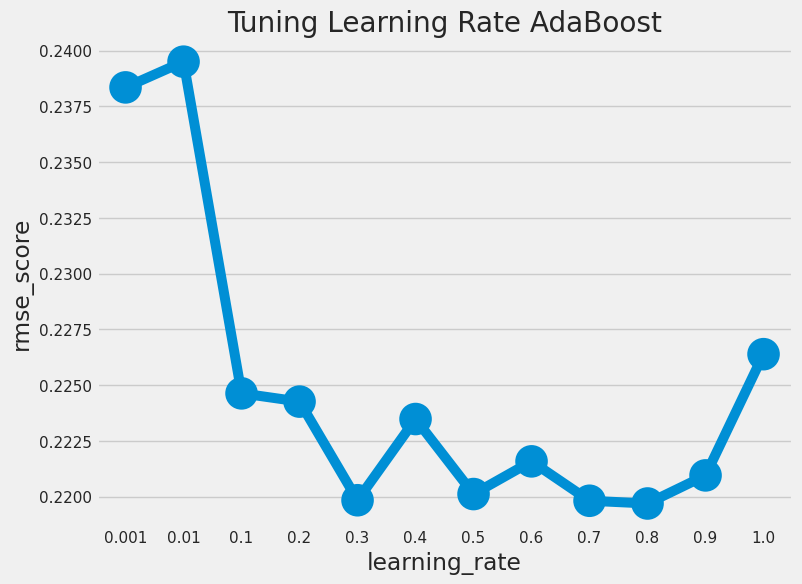

In [317]:
learning_rate_list = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  ada = AdaBoostRegressor(learning_rate=eta, random_state=42).fit(X_train_processing,y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(ada.predict(X_test_processing)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


df_learning_rate = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_learning_rate,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate AdaBoost')
plt.show()

Optimal learning rate = 0.8

### n_estimators Tuning

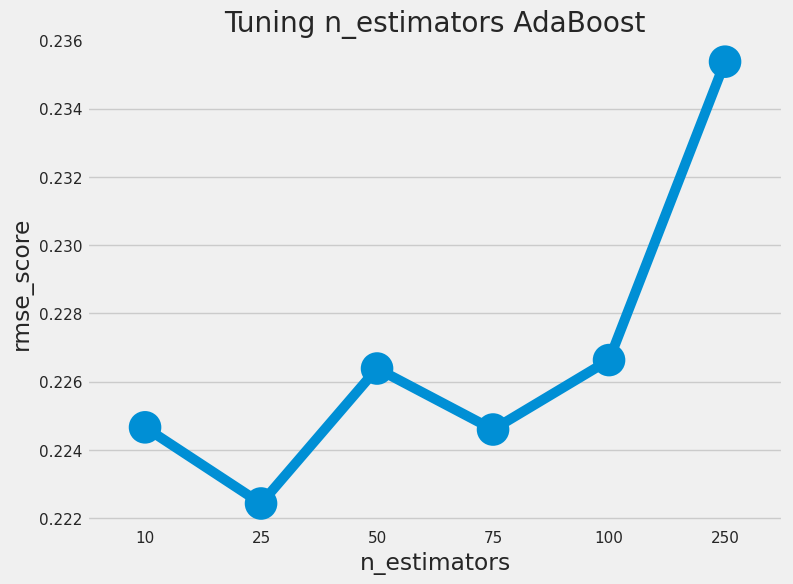

In [318]:
n_estimators = []
rmse_score = []

for estimator in [10, 25, 50, 75, 100, 250]:
  ada = AdaBoostRegressor(n_estimators=estimator, random_state=42).fit(X_train_processing,y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(ada.predict(X_test_processing)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators AdaBoost')
plt.show()

Optimal n_estimators = 25

### Loss Tuning

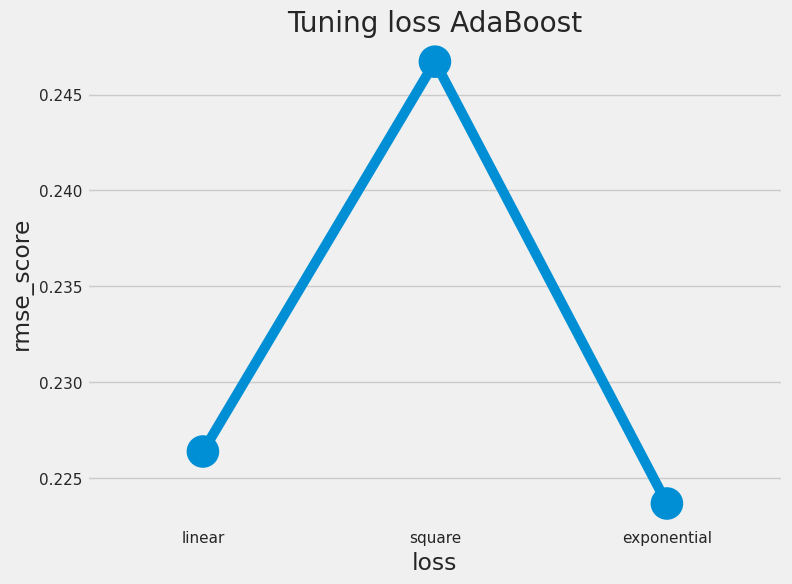

In [319]:
loss = []
rmse_score = []

for cat in ['linear', 'square', 'exponential']:
  ada = AdaBoostRegressor(loss=cat, random_state = 42).fit(X_train_processing,y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(ada.predict(X_test_processing)))
  rmse_score.append(rmse)
  loss.append(cat)


df_loss = pd.DataFrame({'loss':loss,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_loss,x='loss',y='rmse_score')
plt.title('Tuning loss AdaBoost')
plt.show()

Optimal loss  = exponential

### Model Performance Comparison with and without Tuning (AdaBoost)

#### Without Tuning

In [320]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train_processing,y_train)


predict_train_without_tuning = ada.predict(X_train_processing)
predict_test_without_tuning = ada.predict(X_test_processing)

r2_score_train = r2_score(np.log(y_train), np.log(predict_train_without_tuning))
r2_score_test = r2_score(np.log(y_test), np.log(predict_test_without_tuning))

rmse_score_train = root_mean_squared_error(np.log(y_train), np.log(predict_train_without_tuning))
rmse_score_test = root_mean_squared_error(np.log(y_test), np.log(predict_test_without_tuning))

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)

print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.7653318096101
r2 score test 0.7253676756704783
RMSE train 0.18913975980238554
RMSE test 0.22638485874220693


In [321]:
r2_score_train_without_tuning = r2_score_train
r2_score_test_without_tuning = r2_score_test
rmse_score_train_without_tuning = rmse_score_train
rmse_score_test_without_tuning = rmse_score_test

#### With Tuning

In [322]:
ada_tuning = AdaBoostRegressor(learning_rate = 0.8,
                  n_estimators = 25,
                  loss = 'exponential',
                  random_state=42)

ada_tuning.fit(X_train_processing,y_train)

predict_train_tuning = ada_tuning.predict(X_train_processing)
predict_test_tuning = ada_tuning.predict(X_test_processing)

r2_score_train = r2_score(np.log(y_train), np.log(predict_train_tuning))
r2_score_test = r2_score(np.log(y_test), np.log(predict_test_tuning))

rmse_score_train = root_mean_squared_error(np.log(y_train), np.log(predict_train_tuning))
rmse_score_test = root_mean_squared_error(np.log(y_test), np.log(predict_test_tuning))

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)

print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.7684387511911148
r2 score test 0.7496555733043248
RMSE train 0.18788350893384406
RMSE test 0.21614267102872625


Best parameters: learning_rate = 0.8,
                  n_estimators = 25,
                  loss = 'exponential',
                  random_state=42.

In [323]:
r2_score_train_tuning = r2_score_train
r2_score_test_tuning = r2_score_test
rmse_score_train_tuning = rmse_score_train
rmse_score_test_tuning = rmse_score_test

We will compare the results from AdaBoost optimization with XGBoost later. 

# Hyperparameter Tuning Parameter XGBoost

### Learning Rate Tuning

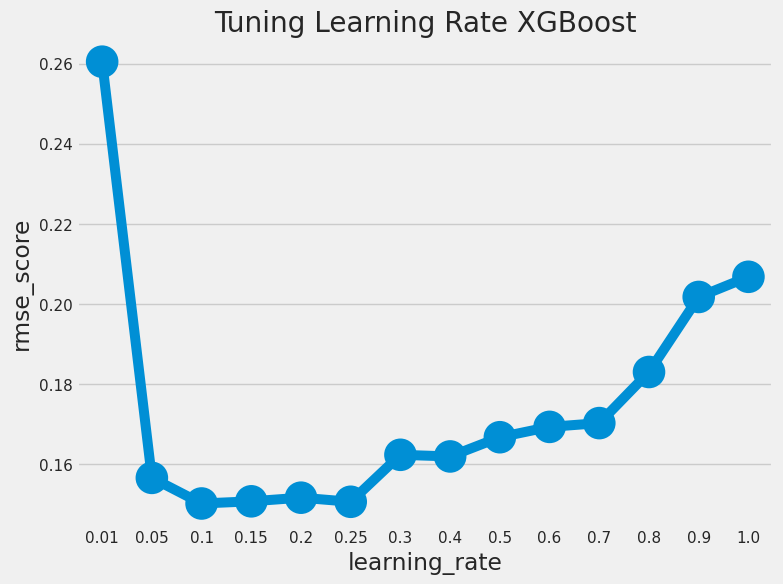

In [324]:
learning_rate_list = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train_processing, y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(xgb.predict(X_test_processing)))

  rmse_score.append(rmse)
  learning_rate.append(eta)


df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_eta,x='learning_rate',y='rmse_score')
plt.title('Tuning Learning Rate XGBoost')
plt.show()

Optimal learning rate: 0.1

### Max_depth Tuning

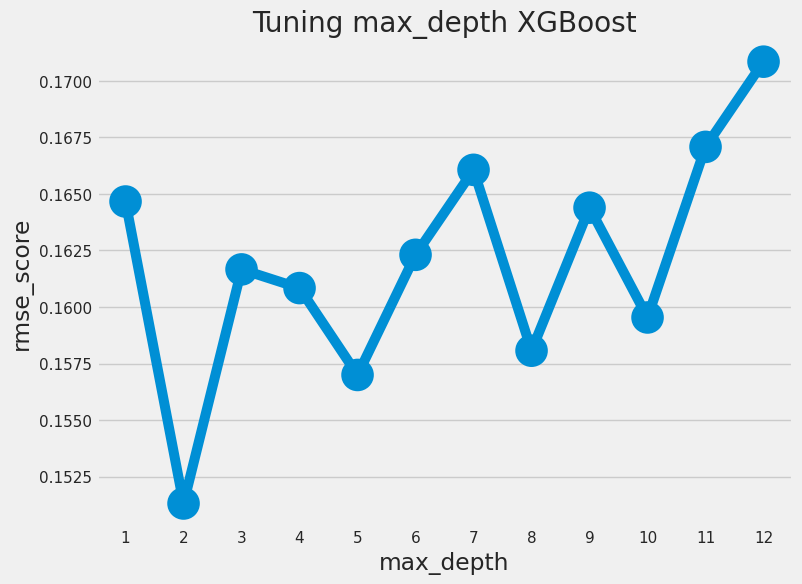

In [325]:
max_depth = []
rmse_score = []

for depth in range(1,13):
  xgb = XGBRegressor(max_depth=depth, random_state=42).fit(X_train_processing, y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(xgb.predict(X_test_processing)))
  rmse_score.append(rmse)
  max_depth.append(depth)


df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_max_depth,x='max_depth',y='rmse_score')
plt.title('Tuning max_depth XGBoost')
plt.show()

Optimal max_depth: 2

### N_estimator Tuning

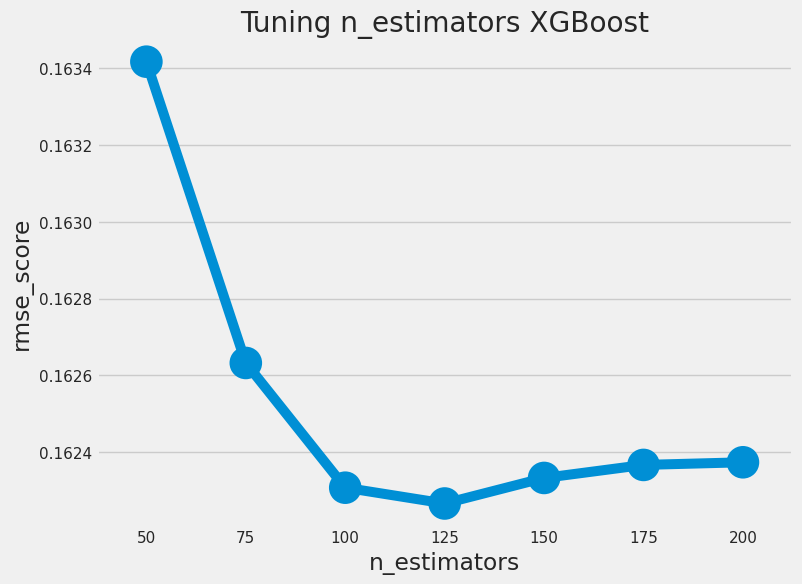

In [326]:
n_estimators = []
rmse_score = []

for estimator in [50, 75, 100, 125, 150, 175, 200]:
  xgb = XGBRegressor(n_estimators=estimator, random_state = 42).fit(X_train_processing, y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(xgb.predict(X_test_processing)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='rmse_score')
plt.title('Tuning n_estimators XGBoost')
plt.show()

Optimal n_estimators = 125

### Subsample Tuning

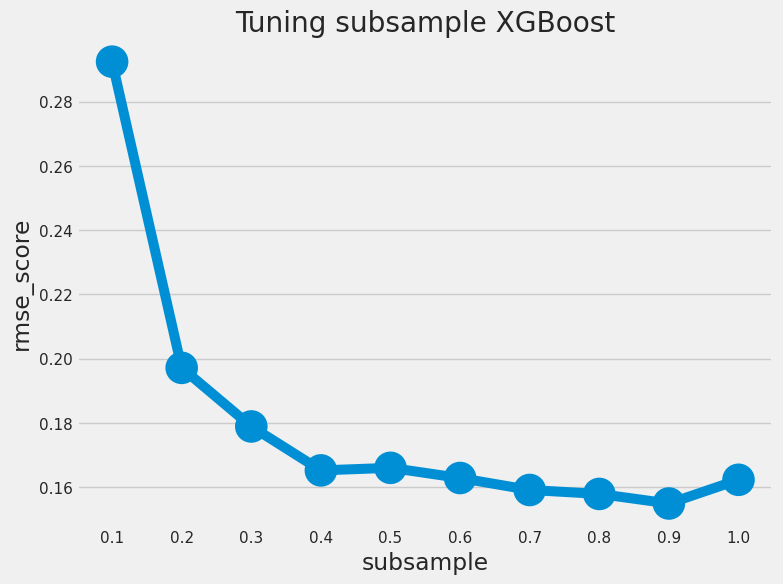

In [327]:
subsample = []
rmse_score = []

for sub in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train_processing, y_train)
  rmse = root_mean_squared_error(np.log(y_test), np.log(xgb.predict(X_test_processing)))
  rmse_score.append(rmse)
  subsample.append(sub)


df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_subsample,x='subsample',y='rmse_score')
plt.title('Tuning subsample XGBoost')
plt.show()

Optimal subsample: 0.9

### Lambda Tuning

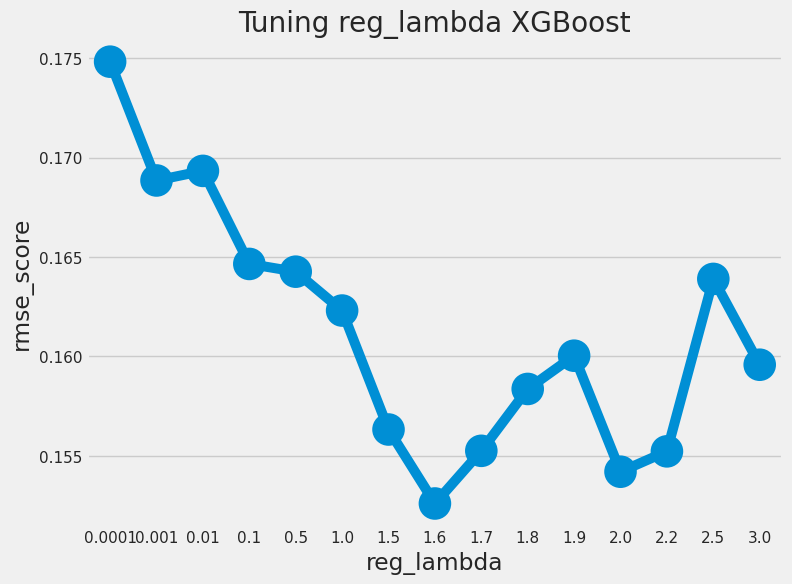

In [328]:
reg_lambda = []
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.5, 3]:
    xgb = XGBRegressor(reg_lambda=lambda_, random_state=42).fit(X_train_processing, y_train)
    rmse = root_mean_squared_error(np.log(y_test), np.log(xgb.predict(X_test_processing)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)


#create dataset eta
df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})

plt.figure(figsize=(8,6))
sns.pointplot(data=df_reg_lambda,x='reg_lambda',y='rmse_score')
plt.title('Tuning reg_lambda XGBoost')
plt.show()

Optimal lambda = 1.6

### Model Performance Comparison with and without Tuning (XGBoost)

#### Without Tuning

In [329]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_processing,y_train)


predict_train_without_tuning = xgb.predict(X_train_processing)
predict_test_without_tuning = xgb.predict(X_test_processing)

r2_score_train = r2_score(np.log(y_train), np.log(predict_train_without_tuning))
r2_score_test = r2_score(np.log(y_test), np.log(predict_test_without_tuning))

rmse_score_train = root_mean_squared_error(np.log(y_train), np.log(predict_train_without_tuning))
rmse_score_test = root_mean_squared_error(np.log(y_test), np.log(predict_test_without_tuning))

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)

print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.9996294668702337
r2 score test 0.8588327672582715
RMSE train 0.007515696661862541
RMSE test 0.162307467367504


In [330]:
r2_score_train_without_tuning_xgb = r2_score_train
r2_score_test_without_tuning_xgb = r2_score_test
rmse_score_train_without_tuning_xgb = rmse_score_train
rmse_score_test_without_tuning_xgb = rmse_score_test

#### With Tuning

In [331]:
xgb_tuning = XGBRegressor(learning_rate = 0.1,
                  max_depth = 2,
                  n_estimators = 125,
                  subsample = 0.9,
                  reg_lambda = 1.6,
                  random_state=42)

xgb_tuning.fit(X_train_processing, y_train)

predict_train_tuning = xgb_tuning.predict(X_train_processing)
predict_test_tuning = xgb_tuning.predict(X_test_processing)

r2_score_train = r2_score(np.log(y_train), np.log(predict_train_tuning))
r2_score_test = r2_score(np.log(y_test), np.log(predict_test_tuning))

rmse_score_train = root_mean_squared_error(np.log(y_train), np.log(predict_train_tuning))
rmse_score_test = root_mean_squared_error(np.log(y_test), np.log(predict_test_tuning))

print('r2 score train',r2_score_train)
print('r2 score test',r2_score_test)

print('RMSE train',rmse_score_train)
print('RMSE test',rmse_score_test)

r2 score train 0.8965725822671603
r2 score test 0.8517305032625628
RMSE train 0.12556643432867257
RMSE test 0.16634029107530723


Best parameters: learning_rate = 0.1,
                  max_depth = 2,
                  n_estimators = 125,
                  subsample = 0.9,
                  reg_lambda = 1.6,
                  random_state=42.

In [332]:
r2_score_train_tuning_xgb = r2_score_train
r2_score_test_tuning_xgb = r2_score_test
rmse_score_train_tuning_xgb = rmse_score_train
rmse_score_test_tuning_xgb = rmse_score_test

### Comparison Between AdaBoost and XGBoost Performance Before and After Hyperparameter Tuning

In [333]:
index = ['AdaBoost R2 without Tuning', 'AdaBoost R2 with Tuning', 'XGBoost R2 without Tuning', 'XGBoost R2 with Tuning', 
         'AdaBoost RMSE without Tuning', 'AdaBoost RMSE with Tuning', 'XGBoost RMSE test without Tuning', 'XGBoost RMSE test with Tuning']
df_compare = pd.DataFrame({
    'Train': [r2_score_train_without_tuning, r2_score_train_tuning, r2_score_train_without_tuning_xgb, r2_score_train_tuning_xgb, 
              rmse_score_train_without_tuning, rmse_score_train_tuning, rmse_score_train_without_tuning_xgb, rmse_score_train_tuning_xgb],
    'Test': [r2_score_test_without_tuning, r2_score_test_tuning, r2_score_test_without_tuning_xgb, r2_score_test_tuning_xgb, 
              rmse_score_test_without_tuning, rmse_score_test_tuning, rmse_score_test_without_tuning_xgb, rmse_score_test_tuning_xgb]
}, index=index)

df_compare['Difference'] = abs(df_compare['Test'] - df_compare['Train'])

print('\nR2 and RMSE comparison without tuning and with tuning:')
df_compare


R2 and RMSE comparison without tuning and with tuning:


Train      Test  Difference
AdaBoost R2 without Tuning        0.765332  0.725368    0.039964
AdaBoost R2 with Tuning           0.768439  0.749656    0.018783
XGBoost R2 without Tuning         0.999629  0.858833    0.140797
XGBoost R2 with Tuning            0.896573  0.851731    0.044842
AdaBoost RMSE without Tuning      0.189140  0.226385    0.037245
AdaBoost RMSE with Tuning         0.187884  0.216143    0.028259
XGBoost RMSE test without Tuning  0.007516  0.162307    0.154792
XGBoost RMSE test with Tuning     0.125566  0.166340    0.040774

While AdaBoost provides robust and stable performance before and after tuning, XGBoost give significant improvement. At first XGBoost have extremely overfit before tuning. After tuning, the RMSE difference XGBoost is reduced to 0.04 from 0.15. 

After tuning, XGBoost has higher R2 score and lower RMSE than AdaBoost, while also improved from overfit to be an optimal model. Hence, XGBoost is the best model among the other models, and XGBoost will be further improved through hyperparameter tuning with Optuna. 

## Hyperparameter Tuning XGBoost using Optuna

The range of best parameters from before will be used in Optuna. 

In [334]:
def objective(trial):
    param = {
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.3),
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 175),
        'subsample': trial.suggest_float('subsample', 0.8, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.5, 1.7),
    }

    model = XGBRegressor(**param,random_state=42)
    model.fit(X_train_processing, y_train, eval_set=[(X_test_processing, y_test)], early_stopping_rounds=50, verbose=False)

    # RMSE calculation
    preds = model.predict(X_test_processing)
    rmse = root_mean_squared_error(np.log(y_test), np.log(preds))
    
    return rmse

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))  
study.optimize(objective, n_trials=100)

print('Best trial:', study.best_trial.params)

[I 2024-06-21 08:19:39,420] A new study created in memory with name: no-name-e2b02077-86db-4ac4-9677-14c88623d617
[I 2024-06-21 08:19:39,674] Trial 0 finished with value: 0.15187745065557232 and parameters: {'learning_rate': 0.1436350297118406, 'max_depth': 3, 'n_estimators': 155, 'subsample': 0.9197316968394074, 'reg_lambda': 1.5312037280884874}. Best is trial 0 with value: 0.15187745065557232.
[I 2024-06-21 08:19:39,912] Trial 1 finished with value: 0.16044010879498644 and parameters: {'learning_rate': 0.08899863008405066, 'max_depth': 2, 'n_estimators': 165, 'subsample': 0.9202230023486417, 'reg_lambda': 1.641614515559209}. Best is trial 0 with value: 0.15187745065557232.
[I 2024-06-21 08:19:40,186] Trial 2 finished with value: 0.15534407045565157 and parameters: {'learning_rate': 0.055146123573950614, 'max_depth': 3, 'n_estimators': 163, 'subsample': 0.8424678221356553, 'reg_lambda': 1.53636499344142}. Best is trial 0 with value: 0.15187745065557232.
[I 2024-06-21 08:19:40,388] Tri

Best trial: {'learning_rate': 0.1366375582929231, 'max_depth': 3, 'n_estimators': 148, 'subsample': 0.8009570208757011, 'reg_lambda': 1.6122848175647886}


In [335]:
best_params = study.best_trial.params
best_params

{'learning_rate': 0.1366375582929231,
 'max_depth': 3,
 'n_estimators': 148,
 'subsample': 0.8009570208757011,
 'reg_lambda': 1.6122848175647886}

In [336]:
# hyperparameter importance from Optuna

vis.plot_param_importances(study)

The importance of max_depth learning is the highest, which indicated this as the high importance feature that needs to be tuned. 

In [337]:
xgb_optuna = XGBRegressor(**best_params,
                  random_state=42)

xgb_optuna.fit(X_train_processing,y_train)

predict_train_optuna = xgb_optuna.predict(X_train_processing)
predict_test_optuna = xgb_optuna.predict(X_test_processing)

r2_score_train = r2_score(np.log(y_train), np.log(predict_train_optuna))
r2_score_test = r2_score(np.log(y_test), np.log(predict_test_optuna))

rmse_score_train = root_mean_squared_error(np.log(y_train), np.log(predict_train_optuna))
rmse_score_test = root_mean_squared_error(np.log(y_test), np.log(predict_test_optuna))

print('r2 score train', r2_score_train)
print('r2 score test', r2_score_test)

print('RMSE train', rmse_score_train)
print('RMSE test', rmse_score_test)

r2 score train 0.9481464201678272
r2 score test 0.8958030877865499
RMSE train 0.08890887052945808
RMSE test 0.13944372477354067


In [338]:
r2_score_train_optuna = r2_score_train
r2_score_test_optuna = r2_score_test
rmse_score_train_optuna = rmse_score_train
rmse_score_test_optuna = rmse_score_test

## Final Comparison of Hyperparameter Tuning

In [339]:
index = ['R2 without Tuning', 'R2 with Tuning', 'R2 Optima', 'RMSE without Tuning', 'RMSE Tuning', 'RMSE Optuna']
df_compare = pd.DataFrame({
    'Train': [r2_score_train_without_tuning_xgb, r2_score_train_tuning_xgb, r2_score_train_optuna, rmse_score_train_without_tuning_xgb, rmse_score_train_tuning_xgb, rmse_score_train_optuna],
    'Test': [r2_score_test_without_tuning_xgb, r2_score_test_tuning_xgb, r2_score_test_optuna, rmse_score_test_without_tuning_xgb, rmse_score_test_tuning_xgb, rmse_score_test_optuna]
}, index=index)

df_compare['Difference'] = abs(df_compare['Test'] - df_compare['Train'])

print('\nR2 and RMSE comparison without tuning, with tuning, and tuning with Optuna:')
df_compare


R2 and RMSE comparison without tuning, with tuning, and tuning with Optuna:


Train      Test  Difference
R2 without Tuning    0.999629  0.858833    0.140797
R2 with Tuning       0.896573  0.851731    0.044842
R2 Optima            0.948146  0.895803    0.052343
RMSE without Tuning  0.007516  0.162307    0.154792
RMSE Tuning          0.125566  0.166340    0.040774
RMSE Optuna          0.088909  0.139444    0.050535

### Visualization for Test Dataset Prediction using Optuna

In [340]:
# actual vs predicted house sale prices in test dataset
final_result = pd.DataFrame({'actual': y_test, 'predicted': predict_test_optuna})
final_result.head()

actual      predicted
892   154500  135214.921875
1105  325000  311121.531250
413   115000  122204.843750
522   159000  169401.031250
1036  315500  351633.906250

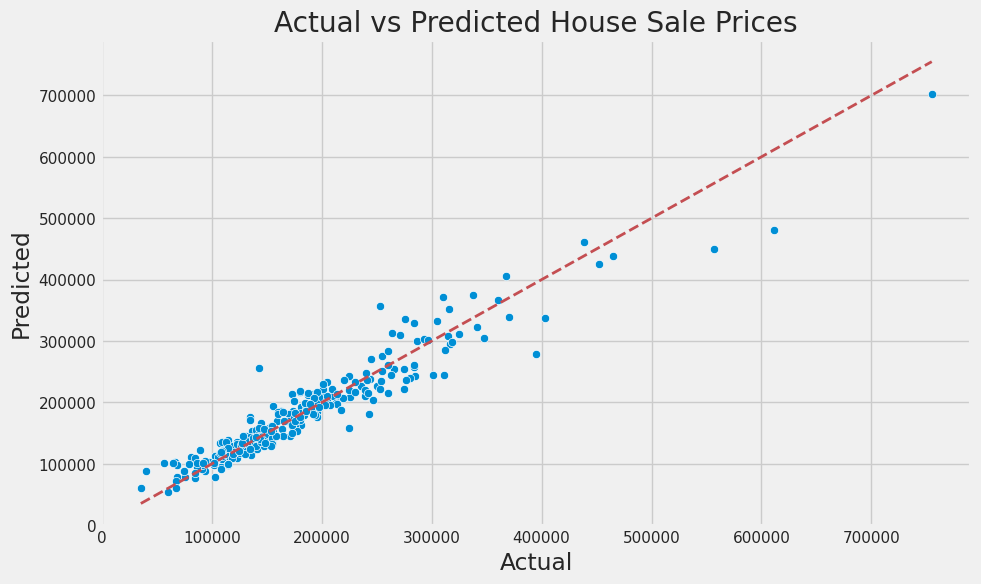

In [341]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_result['actual'], y=final_result['predicted'])
plt.plot([final_result['actual'].min(), final_result['actual'].max()], [final_result['actual'].min(), final_result['actual'].max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Sale Prices')
plt.show()

As we can see, almost all predictions is near the straight line, which is a good sign the model predicted well. 

## Summary

Initially, XGBoost model performance is overfit, then improved significantly after hyperparameter tuning. Both RMSE train and test are decreased after tuning. The difference between R2 score and RMSE train and test also become smaller after hyperparameter tuning, with the best performance from hyperparameter tuning with Optuna. 

After comparing R2 and RMSE values, we will use model with Optuna tuning as the final best model, since it give the lowest RMSE value, the highest R2, while also give the smallest difference between train and test. The best parameters that will be used for house price prediction are based on Optuna tuning: 

In [342]:
print('Best Hyperparameters:')
best_params

Best Hyperparameters:


{'learning_rate': 0.1366375582929231,
 'max_depth': 3,
 'n_estimators': 148,
 'subsample': 0.8009570208757011,
 'reg_lambda': 1.6122848175647886}

## Use Data Test for House Prediction

In [343]:
# read data test

data_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ids = data_test.pop('Id')

In [344]:
# reassign variables for data test prediction

categorical_test = [col for col in df_train.columns if df[col].dtype not in ['float64','int64']]
discrete_test = [col for col in df_train.columns if df[col].nunique() < 20 and col not in categorical_test]
numerical_test = [col for col in df_train.columns if col not in categorical_test + discrete_test + ['SalePrice']]

In [345]:
# impute data test based on train dataset information

data_test[numerical_test] = impute_numerical.transform(data_test[numerical_test])
data_test[discrete_test] = impute_discrete.transform(data_test[discrete_test])
data_test[categorical_test] = impute_categorical.transform(data_test[categorical_test])

In [346]:
# use the same column as train

data_test = data_test[final_features]

In [347]:
# preprocessing data test based on train dataset information

data_test_prediction = preprocessor.transform(data_test)
data_test_prediction = pd.DataFrame(data_test_prediction,columns=preprocessor.get_feature_names_out())

In [348]:
# predict data test using the best model 

pred = xgb_optuna.predict(data_test_prediction) 

In [349]:
# input prediction result to dataframe for submission

df_submit = pd.DataFrame(pred, index=ids, columns=['SalePrice']).reset_index()
df_submit.head()

Id      SalePrice
0  1461  127021.789062
1  1462  147535.812500
2  1463  164268.671875
3  1464  196968.671875
4  1465  186788.671875

In [350]:
# save prediction to sample_submission.csv

df_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
df_submission['SalePrice'] = df_submit['SalePrice']
df_submission.to_csv('/kaggle/working/submission.csv', index=False)

Thank you for exploring my notebook! I hope you found it informative and that it enriched your knowledge. If you have any questions, suggestions, or feedback, please do not hesitate to reach out. I genuinely value your input! 📘✨

If you found this notebook helpful, I would greatly appreciate an upvote. Your support encourages me to continue creating more high-quality content! 👍😊